In [2]:
# assign directory
import git
from pathlib import Path
import os
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))

data_dir = data_dir = os.path.join(ROOT_DIR, 'raw-data','agriVision','toy-agriVision-RGB-cleaned')
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)

In [3]:
def npz_opener(path):
    return np.load(path)["arr_0"]

In [4]:
def ksCombinations(samps, samp_names, layer):
    df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
    for i in range(len(samps)):
        for j in range(i+1, len(samps)):
            ksres = stats.ks_2samp(samps[i], samps[j])
            df.loc[len(df)] = [layer, samp_names[i], samp_names[j], ksres.statistic, ksres.pvalue]
    return df
            



# Red Wavelet

In [6]:
red_wv = convert_to_wavelet_basis(data_dir, "red", debug=True, image_opener = npz_opener)
red_wv.head()

10 layers being used


100%|██████████| 1443/1443 [00:30<00:00, 47.46it/s]


channel  layer orientation  \
0     red      1          L1   
1     red      2           D   
2     red      2           H   
3     red      2           V   
4     red      3           D   

                                                data  
0  [192.45657321972274, 207.70238065938895, 583.0...  
1  [75.7208242735702, 63.661082638862, -18.251299...  
2  [-143.51710301222602, -120.40405983891101, 37....  
3  [-276.89371187813543, -410.3541815333998, 482....  
4  [81.1050245962379, 40.442530754371916, 4.88009...

In [7]:
red_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, 11):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    red_df = pd.concat([red_df, ks_df], axis = 0)
red_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_8098/1513324452.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  red_df = pd.concat([red_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
0     2     D      H  0.086625   3.927955e-05
2     2     H      V  0.144837   1.296481e-13
1     2     D      V  0.196119   1.118158e-24
0     3     D      H  0.084026   3.828060e-18
2     3     H      V  0.089224   2.090505e-20
1     3     D      V  0.161296   6.375397e-66
2     4     H      V  0.056350   2.656497e-32
0     4     D      H  0.079565   5.159210e-64
1     4     D      V  0.130371  1.558486e-171
2     5     H      V  0.043161   3.484179e-75
0     5     D      H  0.060562  1.145460e-147
1     5     D      V  0.102077   0.000000e+00
2     6     H      V  0.037344  3.108418e-224
0     6     D      H  0.040365  6.358748e-262
1     6     D      V  0.076449   0.000000e+00
2     7     H      V  0.021256  2.148914e-290
0     7     D      H  0.049803   0.000000e+00
1     7     D      V  0.070389   0.000000e+00
2     8     H      V  0.041113   0.000000e+00
0     8     D      H  0.092542   0.000000e+00
1     8     D      V  0.131649   0.000000e+00
2     9     H      V  0.021433   0.000000e+00
0     9     D      H  0.145400   0.000000e+00
1     9     D      V  0.159567   0.000000e+00
2    10     H      V  0.009774   0.000000e+00
0    10     D      H  0.208488   0.000000e+00
1    10     D      V  0.211403   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


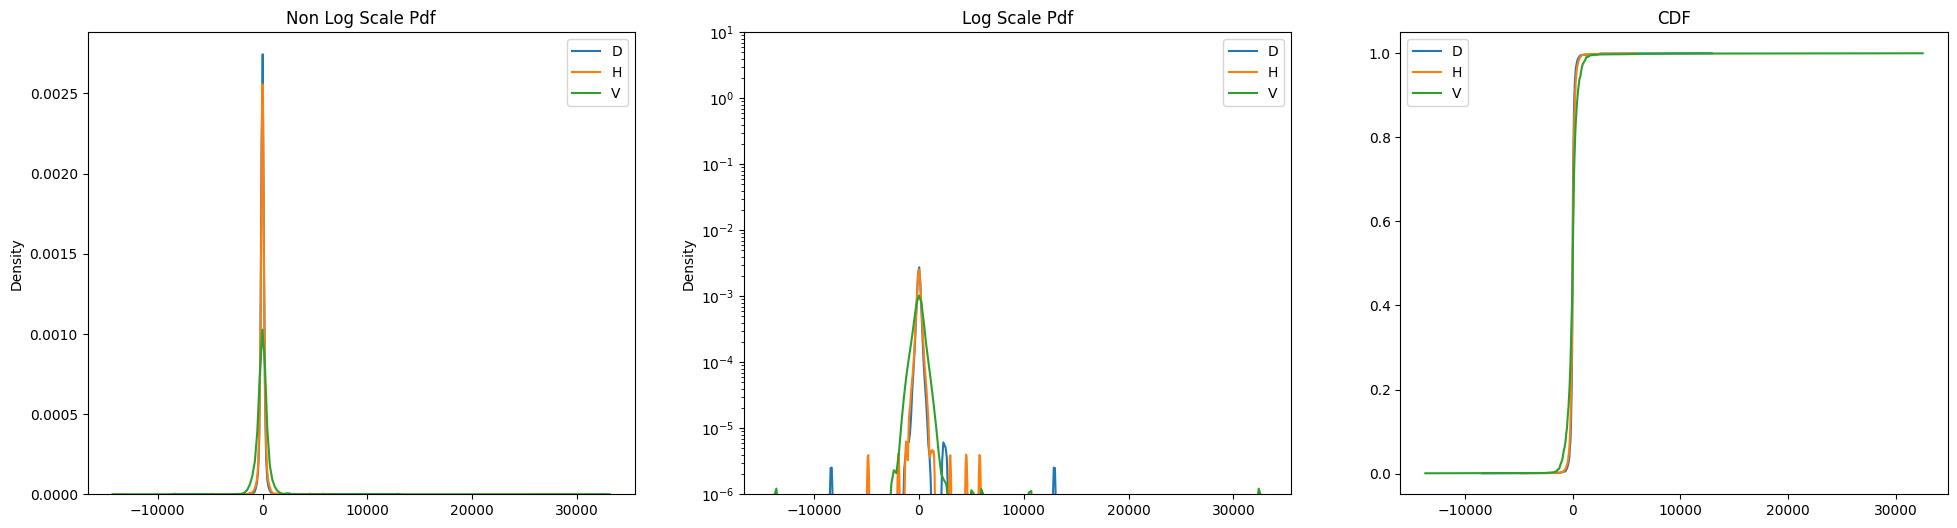

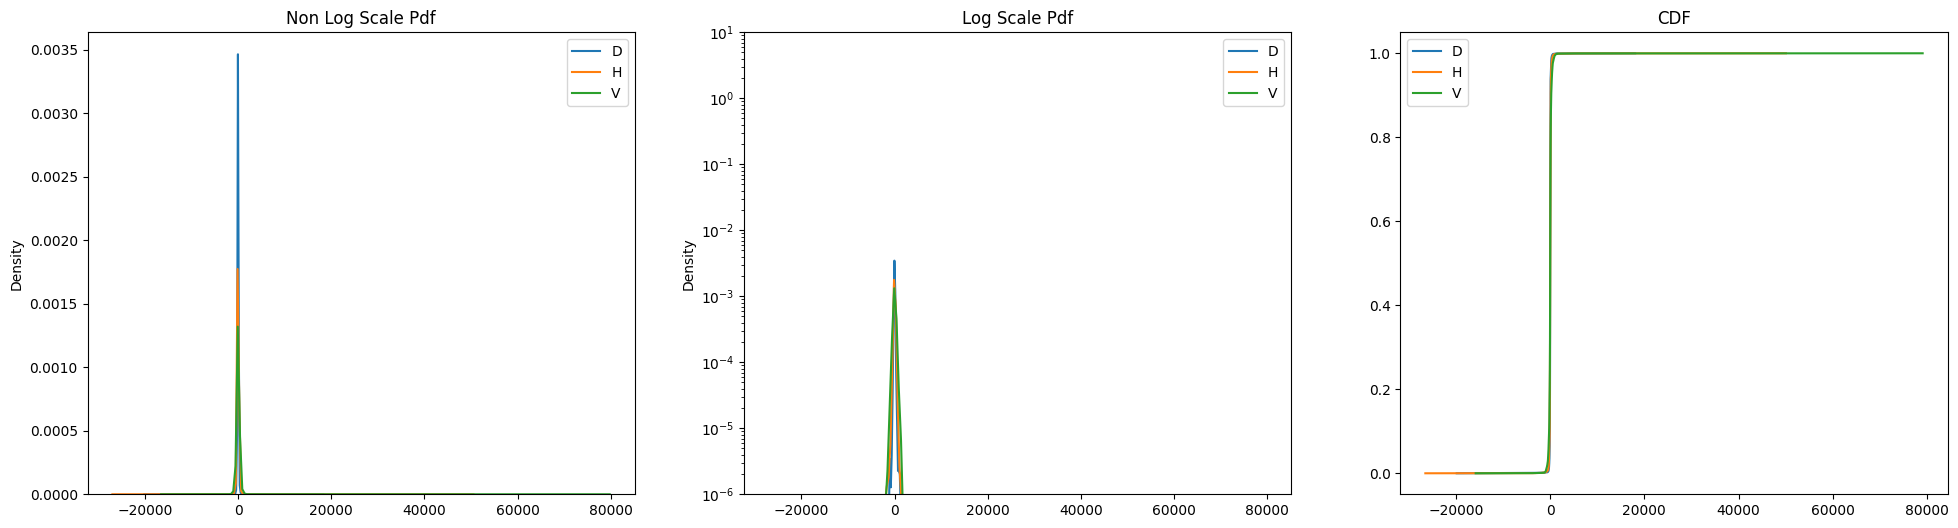

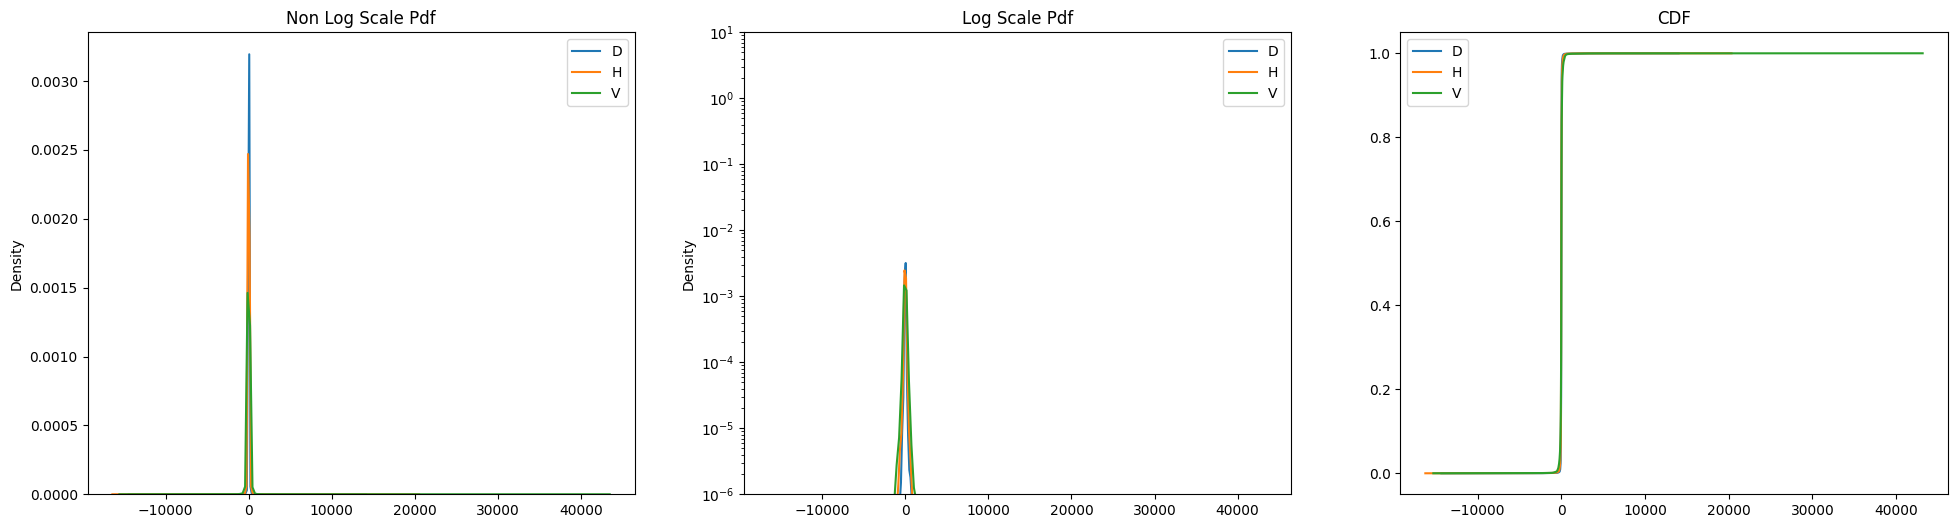

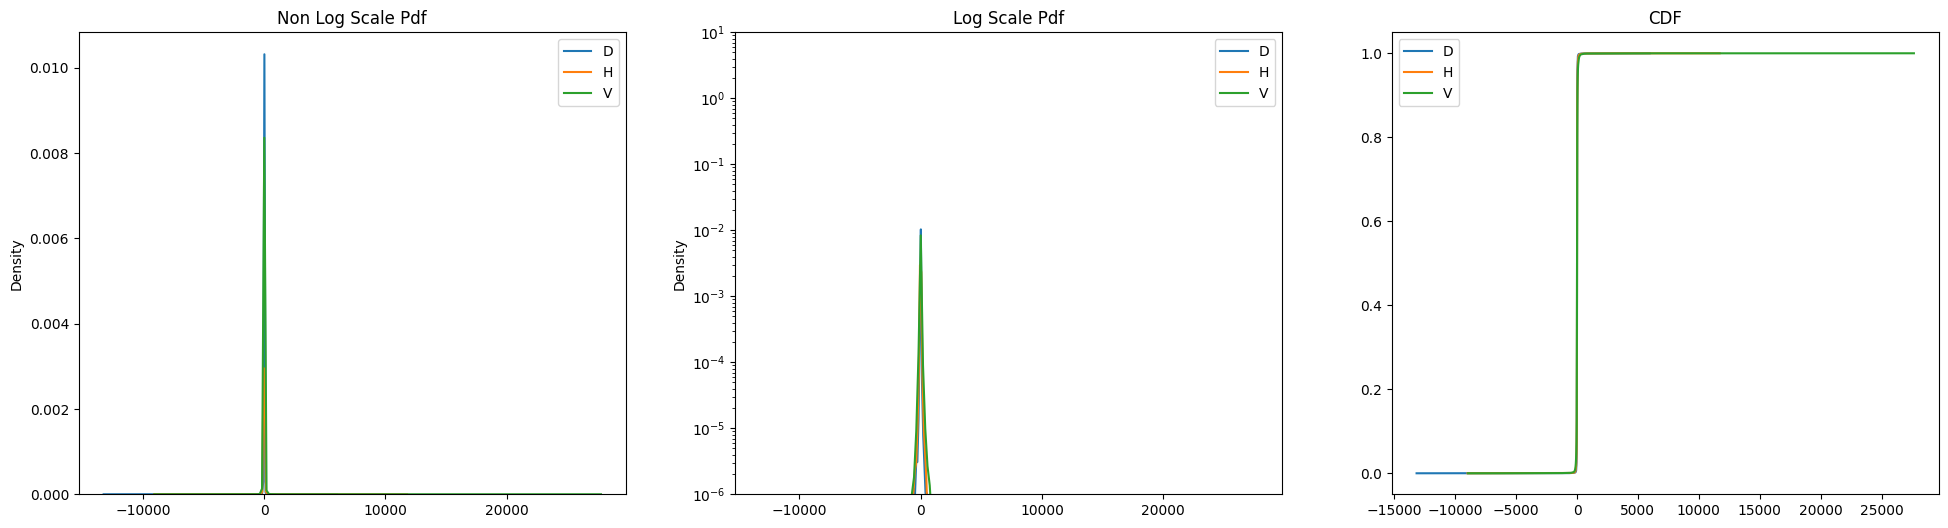

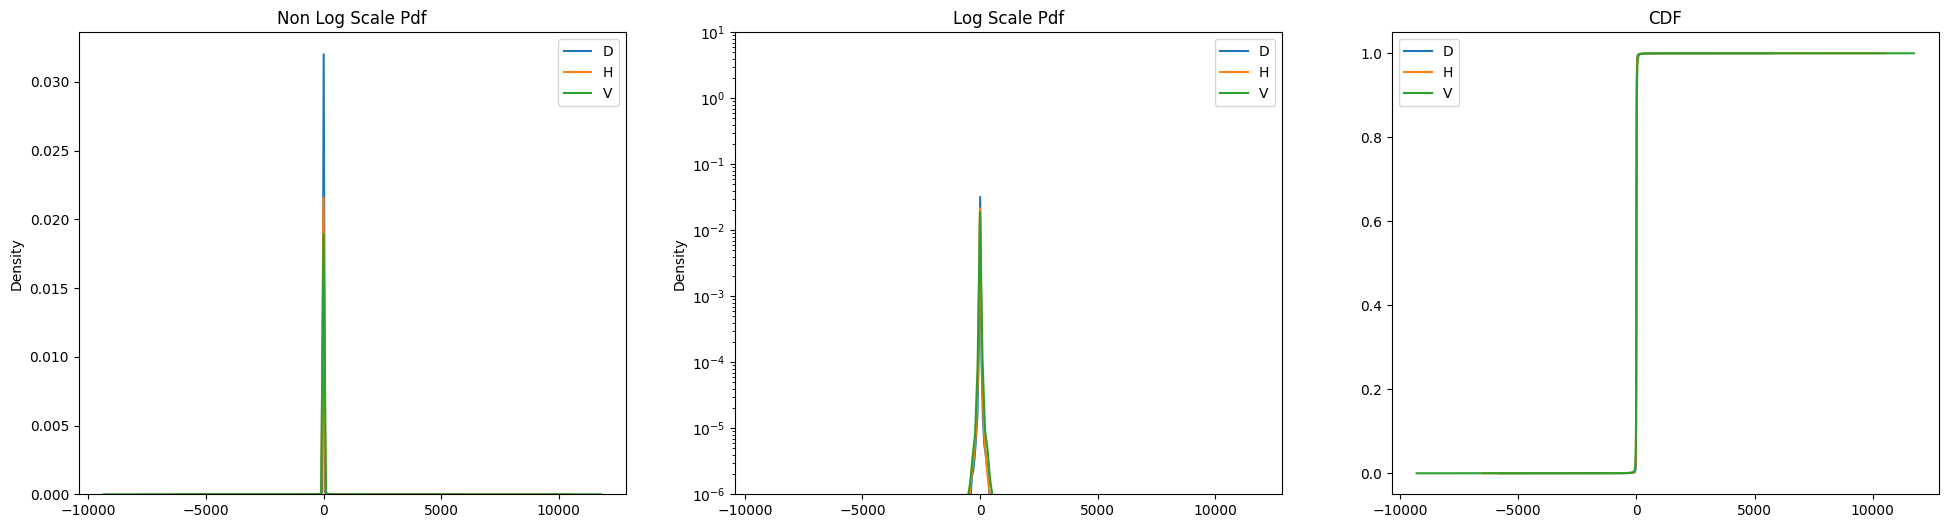

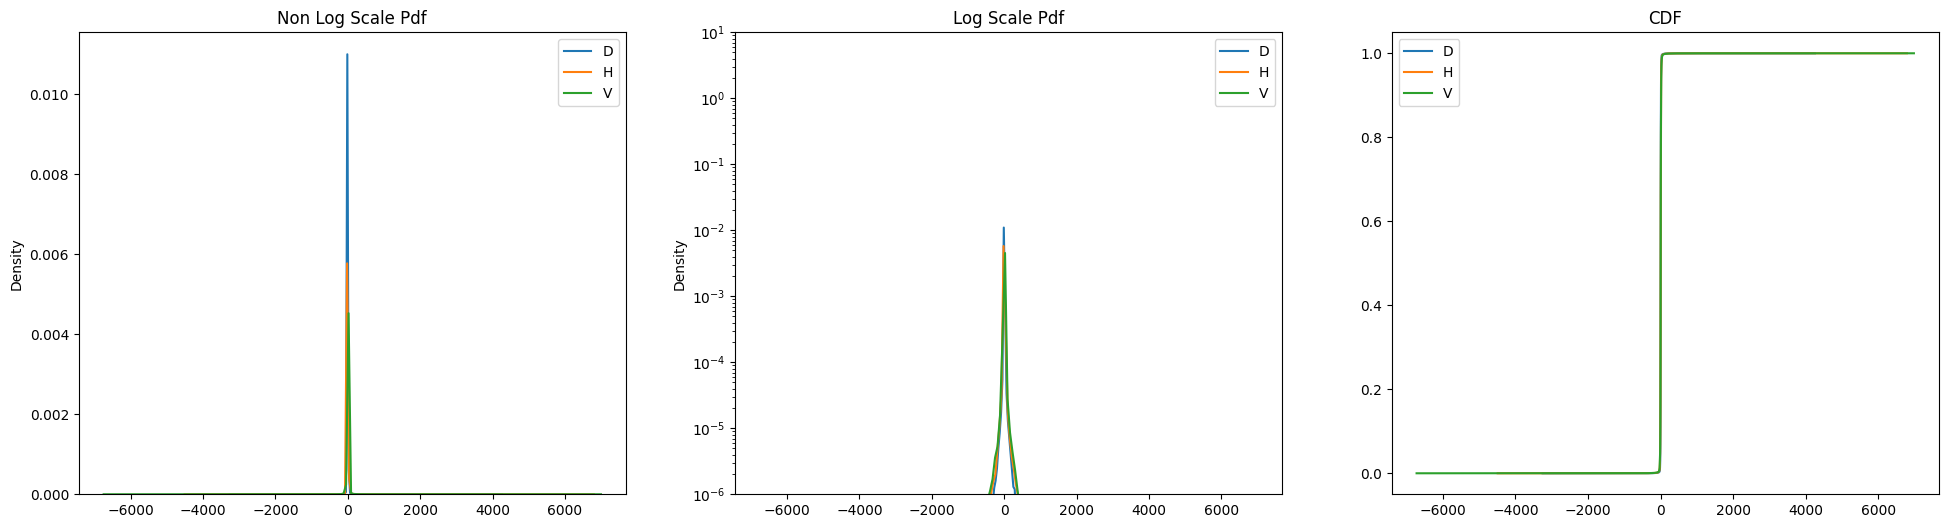

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


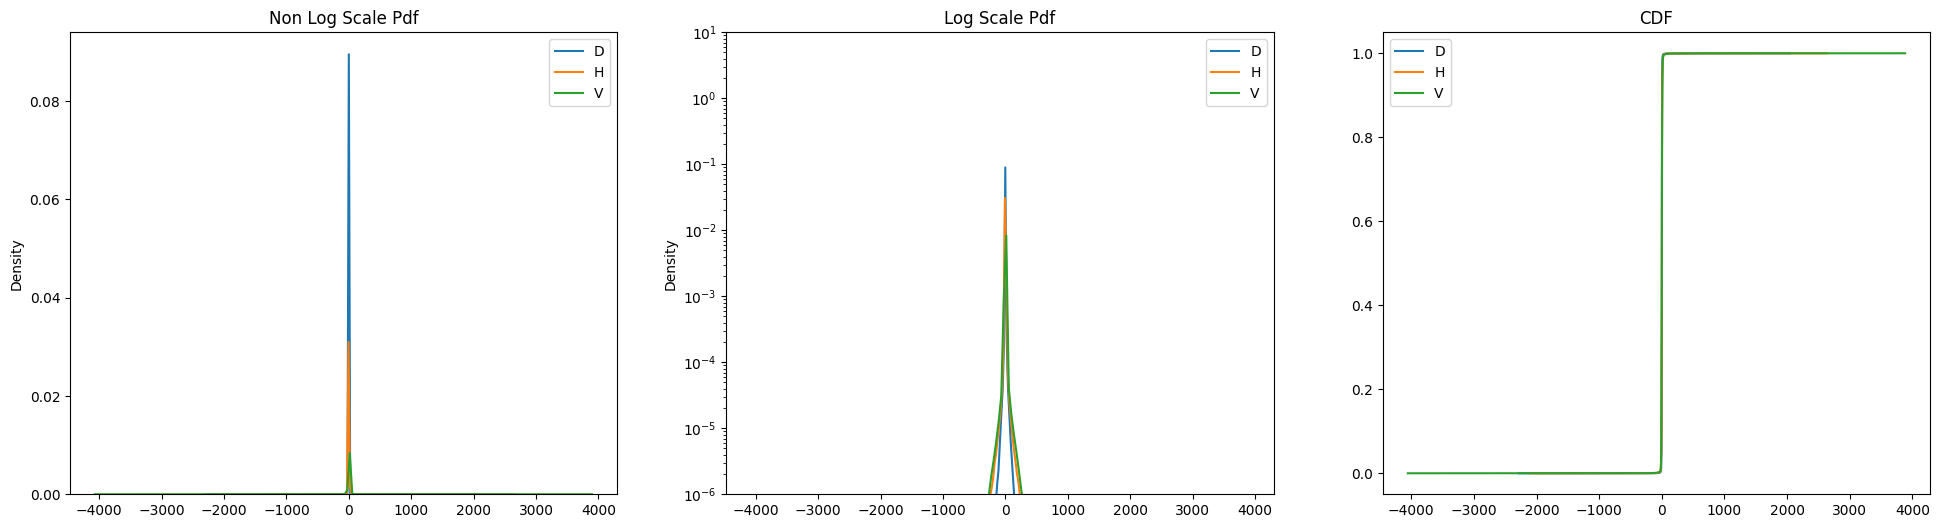

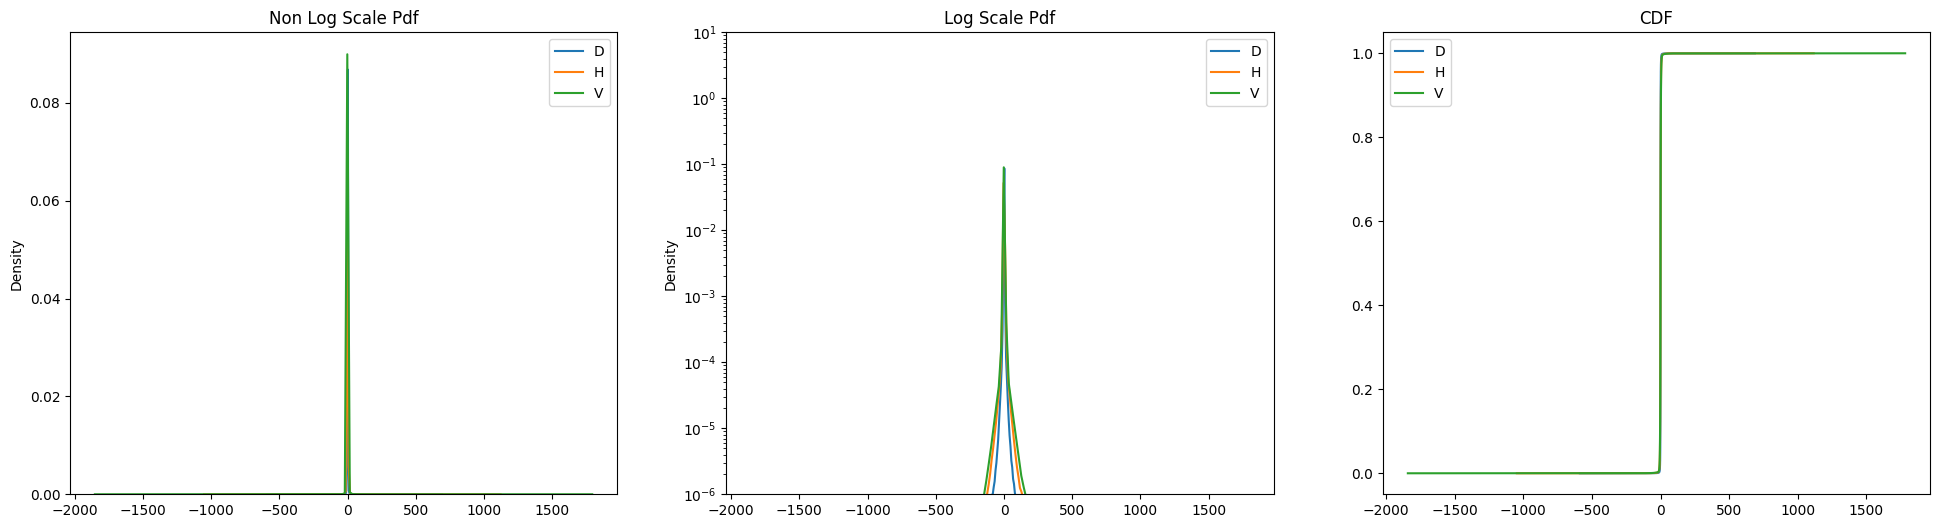

In [8]:
for i in range(2, 10):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


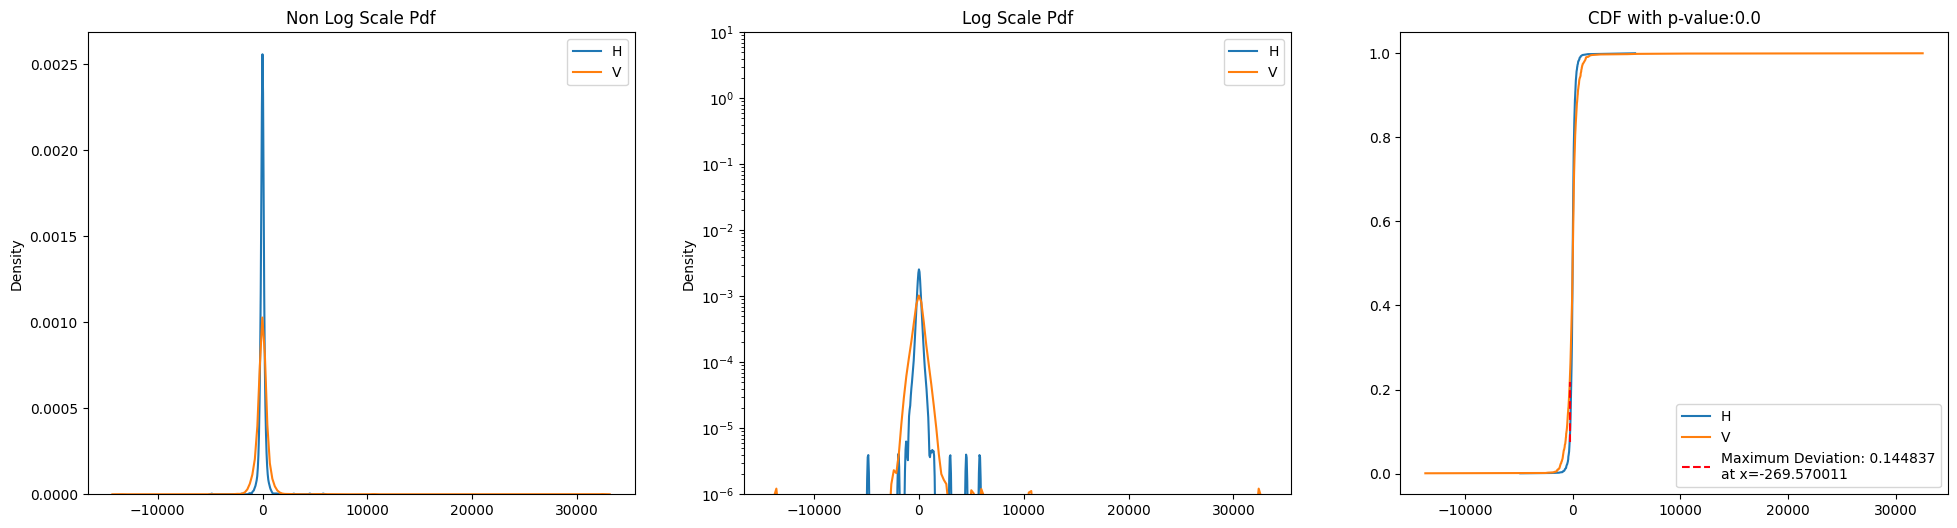

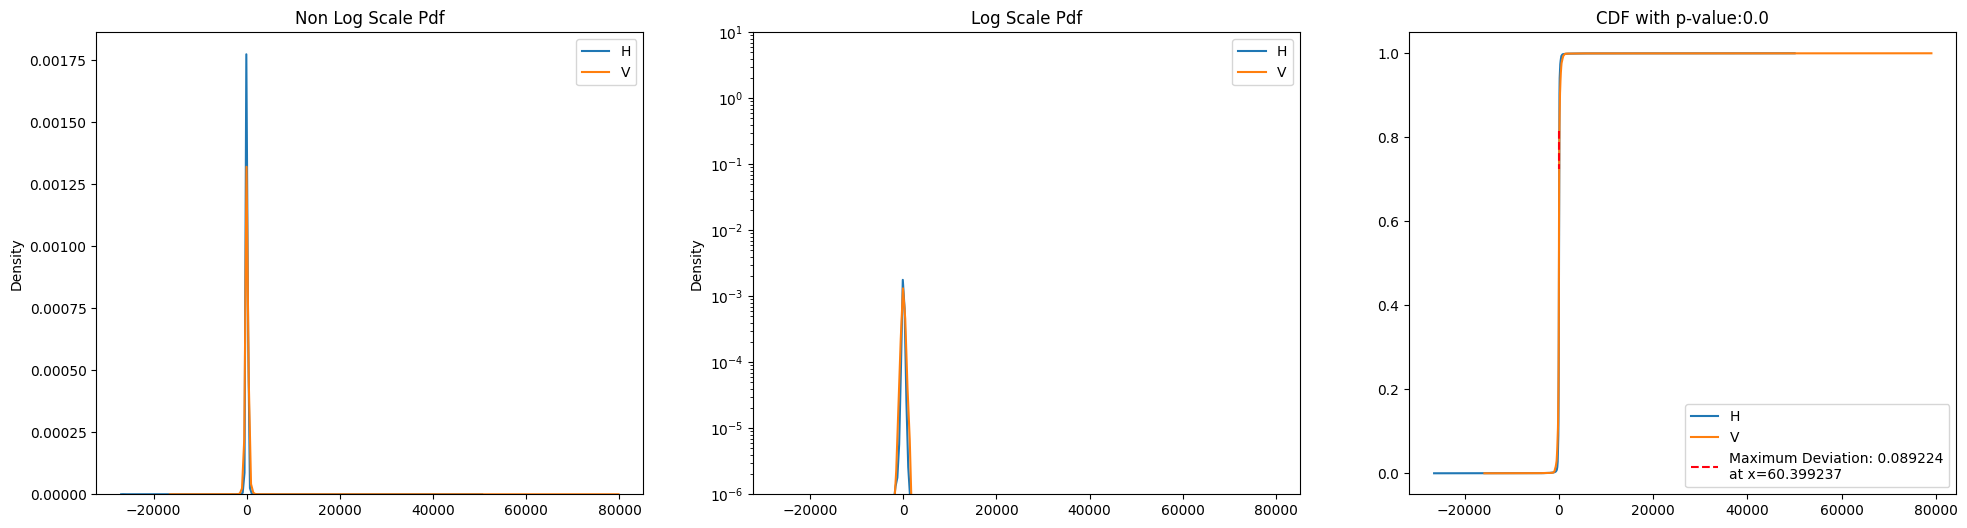

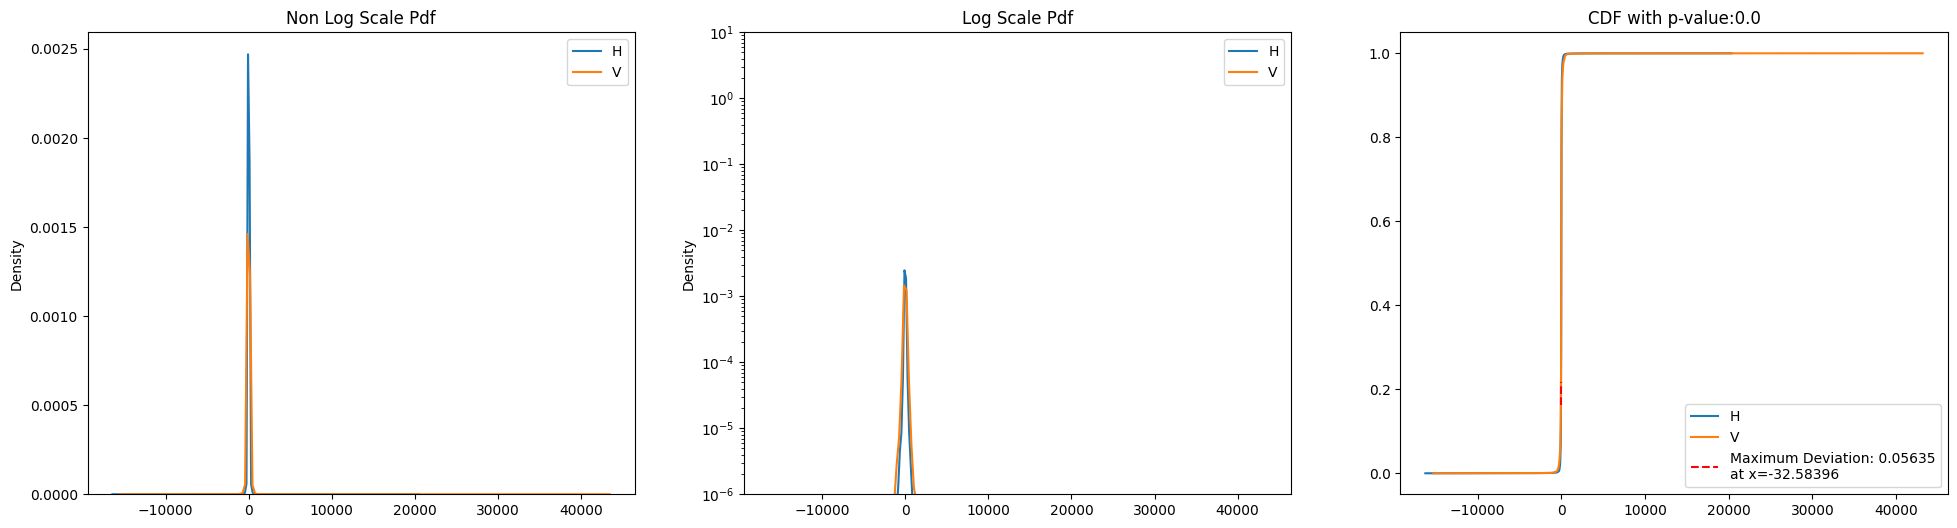

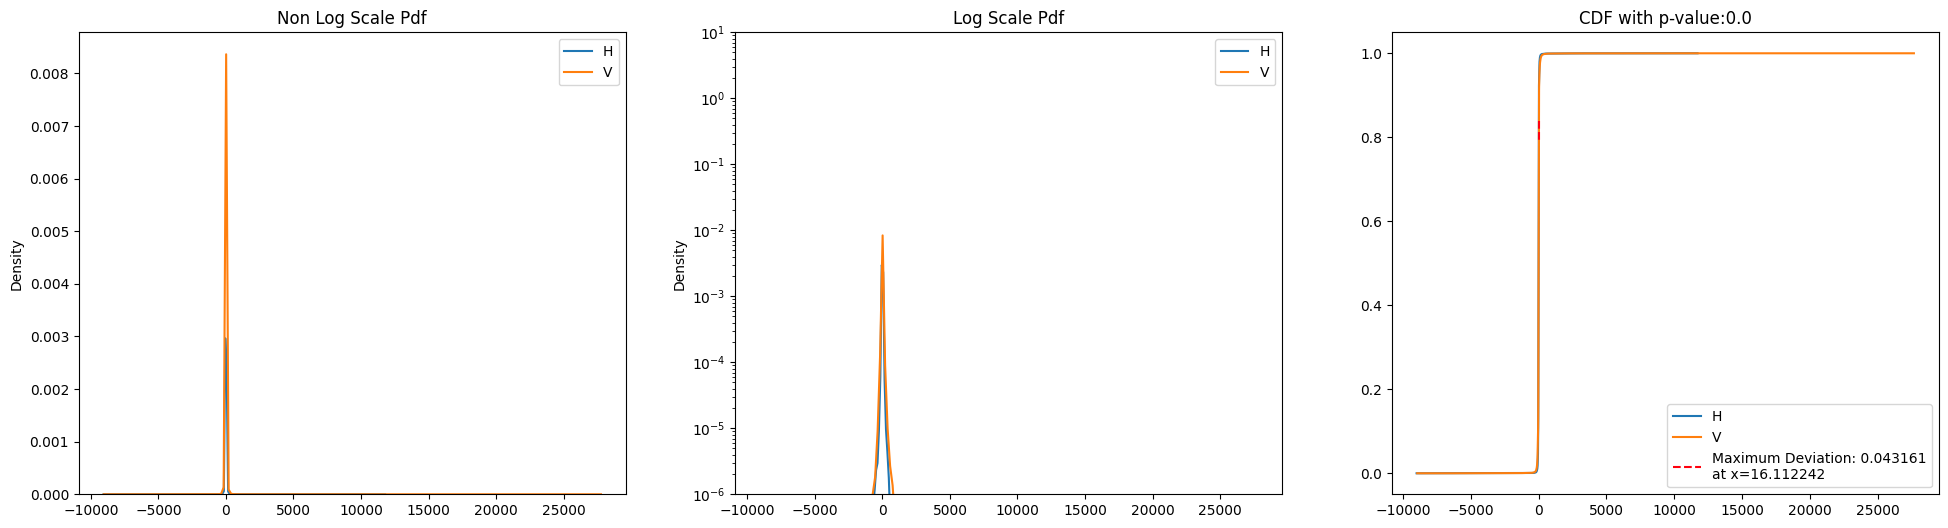

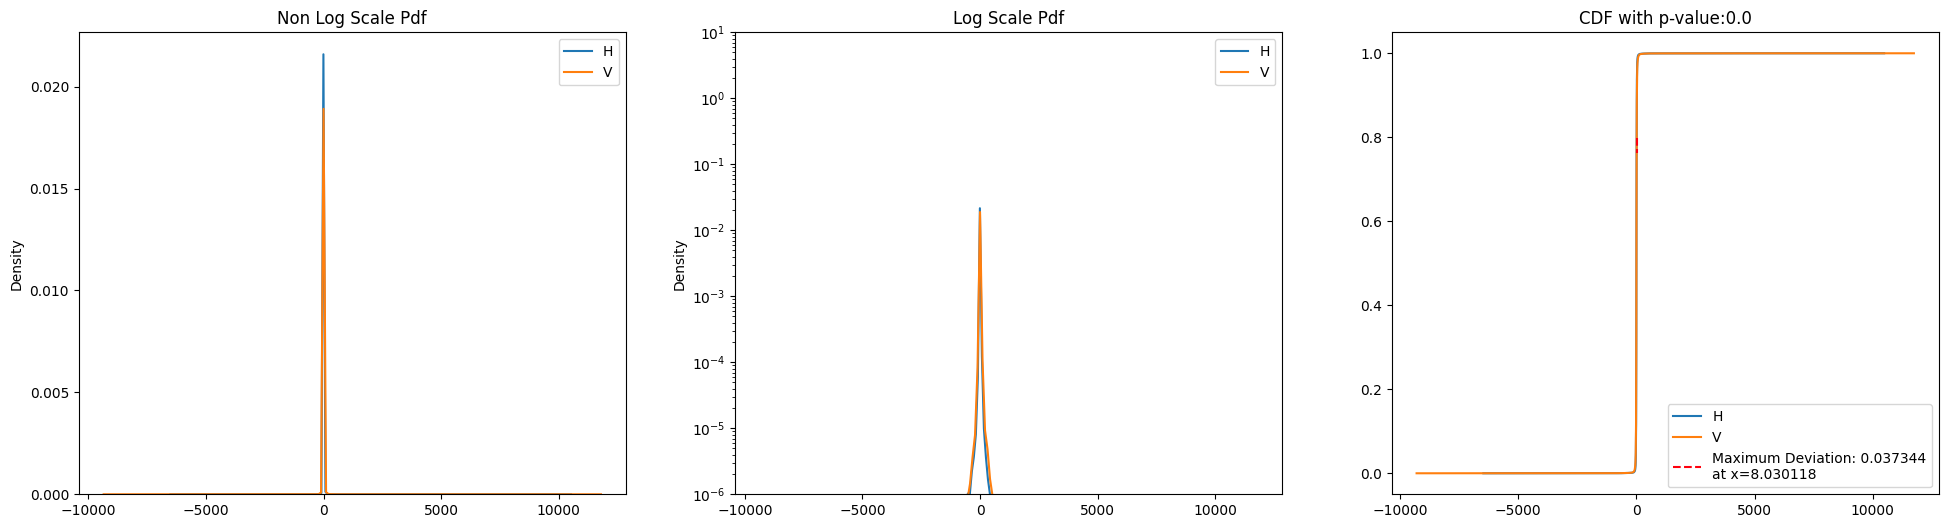

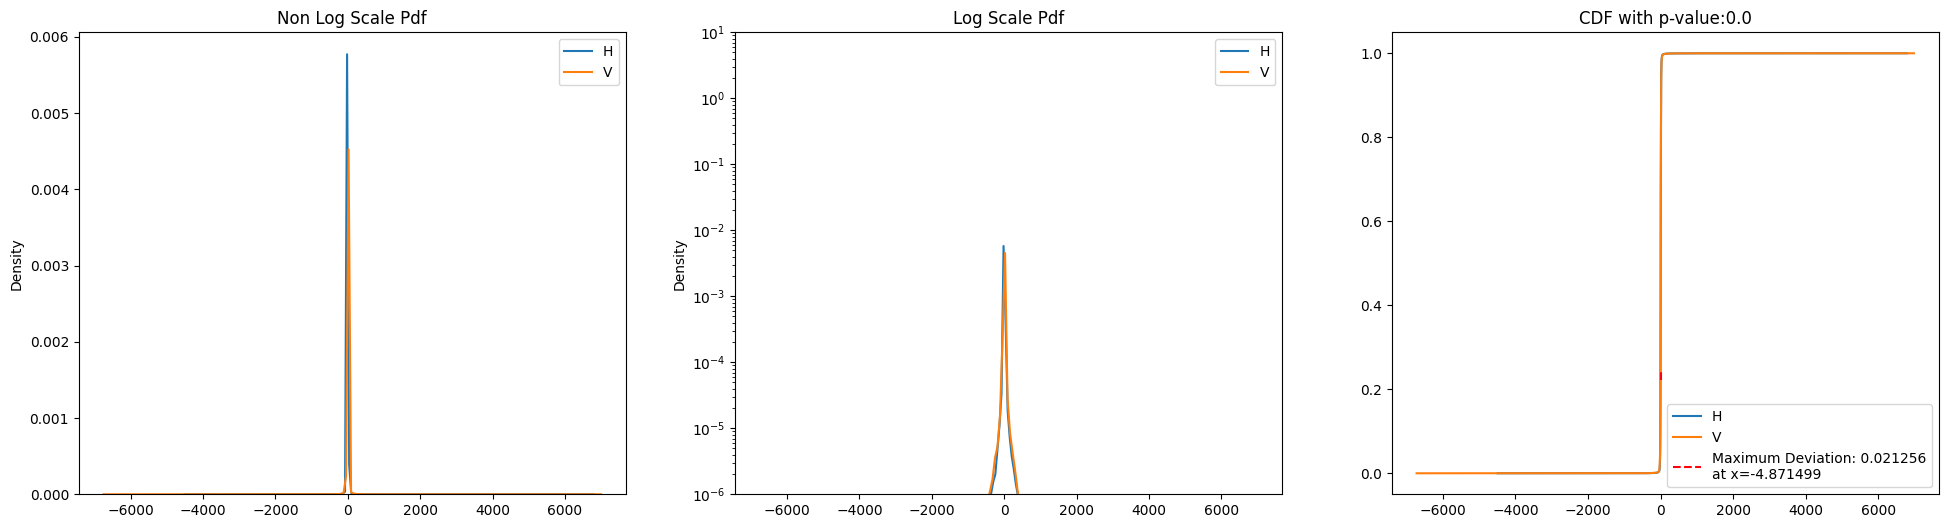

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


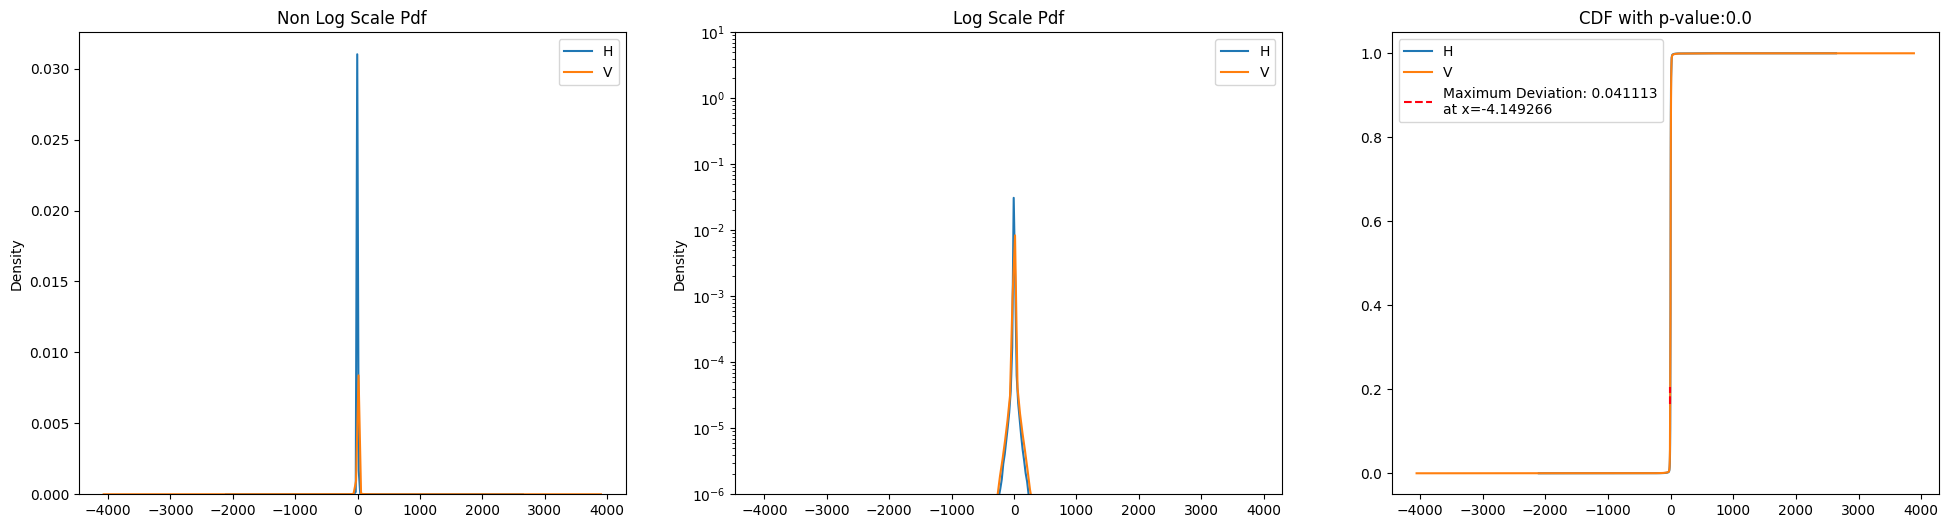

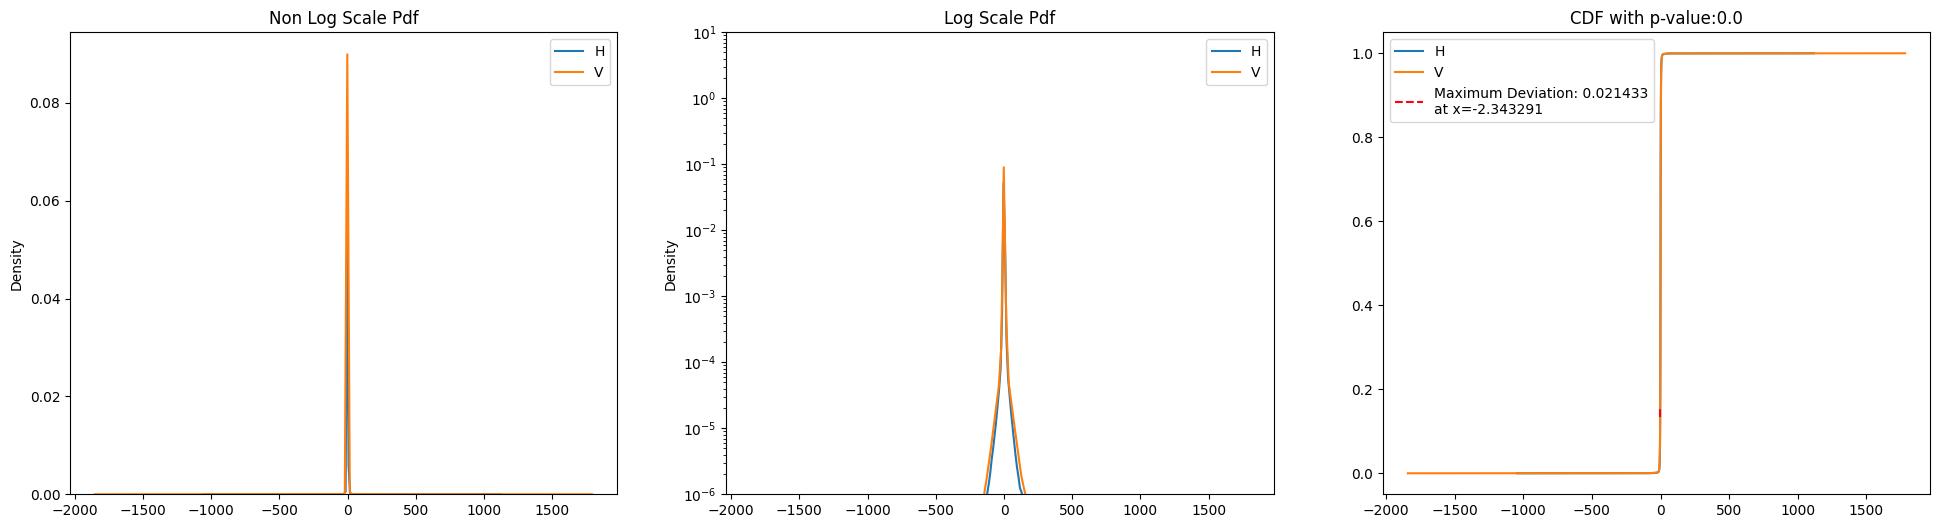

In [9]:
for i in range(2, 10):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Green

In [10]:
green_wv = convert_to_wavelet_basis(data_dir, "green", debug=True, image_opener = npz_opener)
green_wv.head()

10 layers being used


100%|██████████| 1443/1443 [00:36<00:00, 40.02it/s]


channel  layer orientation  \
0   green      1          L1   
1   green      2           D   
2   green      2           H   
3   green      2           V   
4   green      3           D   

                                                data  
0  [258.4715440015474, -184.35696718693333, -494....  
1  [113.18440598864169, -40.908787801240635, -21....  
2  [-63.26664294131782, -635.4860539544968, -29.5...  
3  [-119.06996161452174, 709.8171047354278, -219....  
4  [58.125508539869415, 21.00111309154136, -1.594...

In [11]:
green_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, 11):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    green_df = pd.concat([green_df, ks_df], axis = 0)
green_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_8098/1157885314.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  green_df = pd.concat([green_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
0     2     D      H  0.090090   1.620185e-05
2     2     H      V  0.128898   7.301439e-11
1     2     D      V  0.203049   1.958710e-26
0     3     D      H  0.075364   1.125040e-14
2     3     H      V  0.098926   5.384564e-25
1     3     D      V  0.157831   3.981574e-63
0     4     D      H  0.068477   1.641446e-47
2     4     H      V  0.087578   1.735664e-77
1     4     D      V  0.152937  3.156623e-236
0     5     D      H  0.059252  2.320325e-141
2     5     H      V  0.076750  5.155457e-237
1     5     D      V  0.134810   0.000000e+00
0     6     D      H  0.047246   0.000000e+00
2     6     H      V  0.072649   0.000000e+00
1     6     D      V  0.119605   0.000000e+00
2     7     H      V  0.048827   0.000000e+00
0     7     D      H  0.055689   0.000000e+00
1     7     D      V  0.103407   0.000000e+00
2     8     H      V  0.074521   0.000000e+00
0     8     D      H  0.079813   0.000000e+00
1     8     D      V  0.148451   0.000000e+00
2     9     H      V  0.042334   0.000000e+00
0     9     D      H  0.133606   0.000000e+00
1     9     D      V  0.169182   0.000000e+00
2    10     H      V  0.018327   0.000000e+00
0    10     D      H  0.197837   0.000000e+00
1    10     D      V  0.209580   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


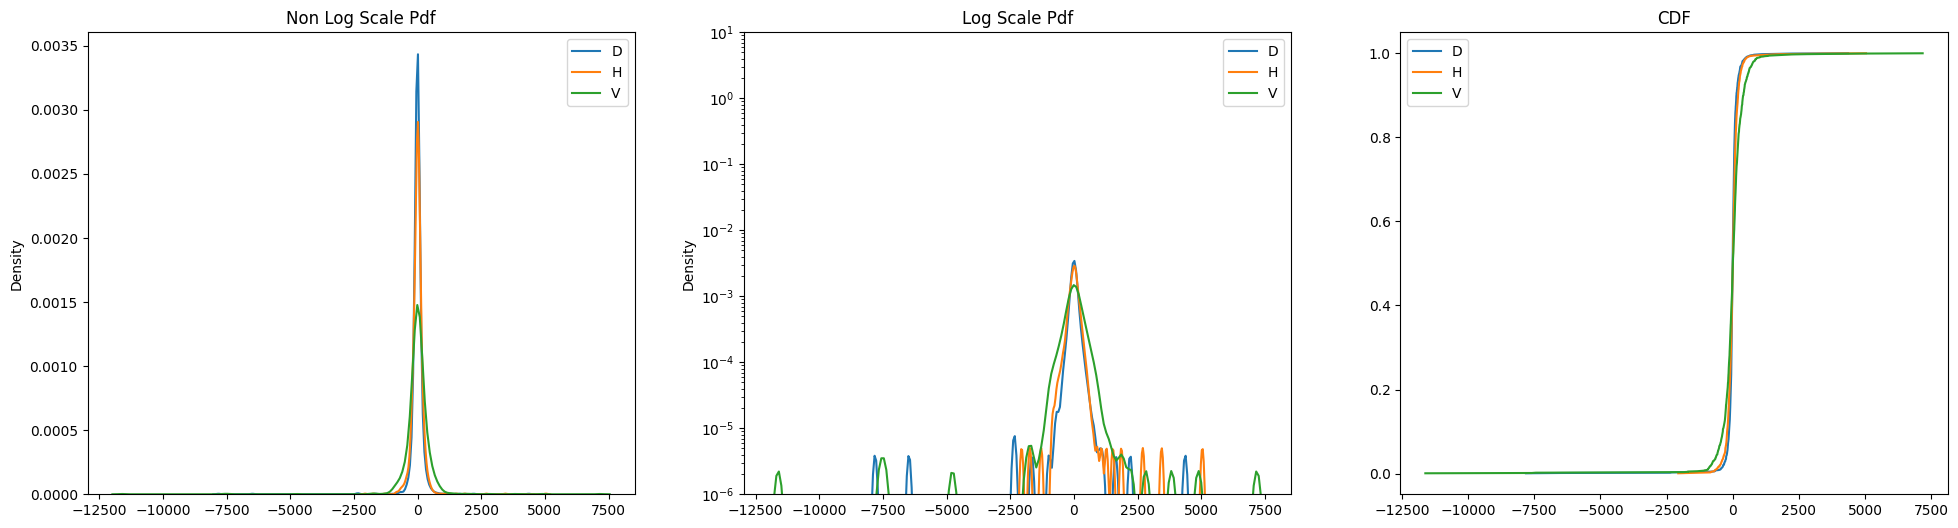

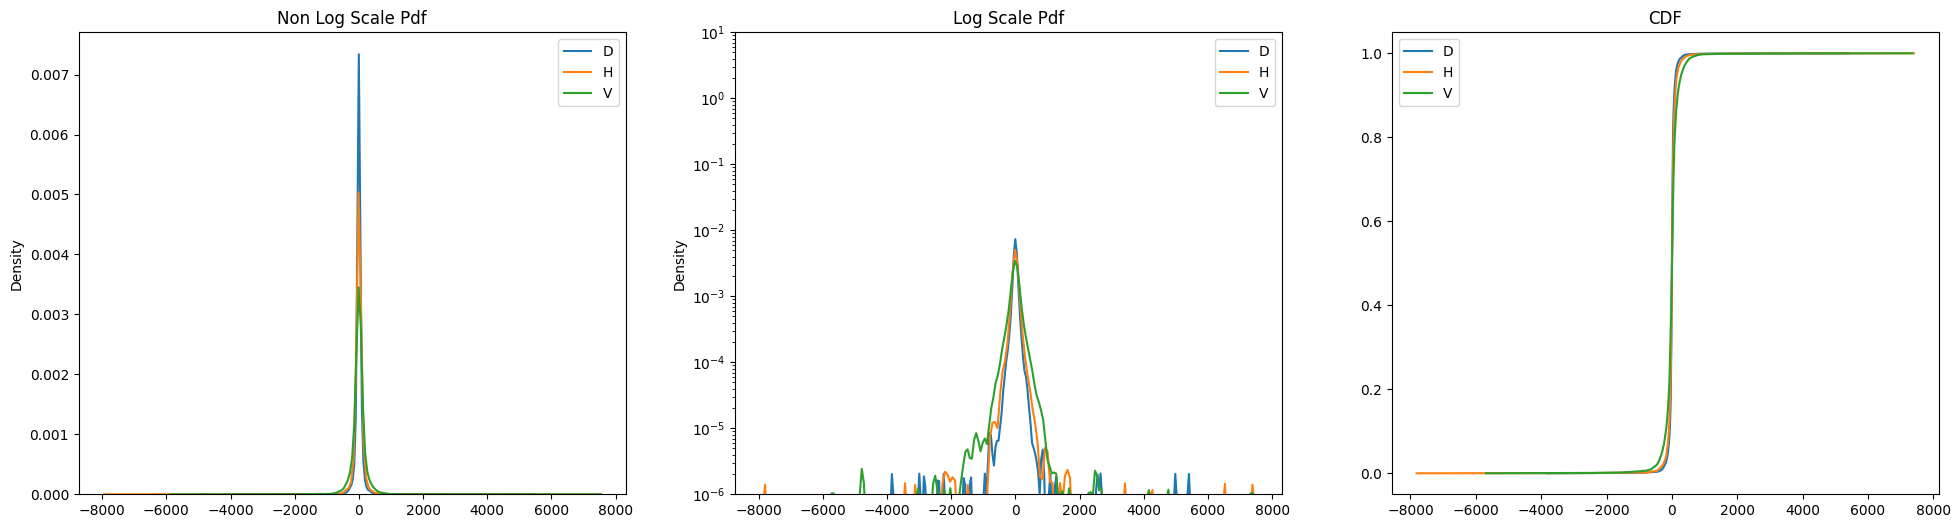

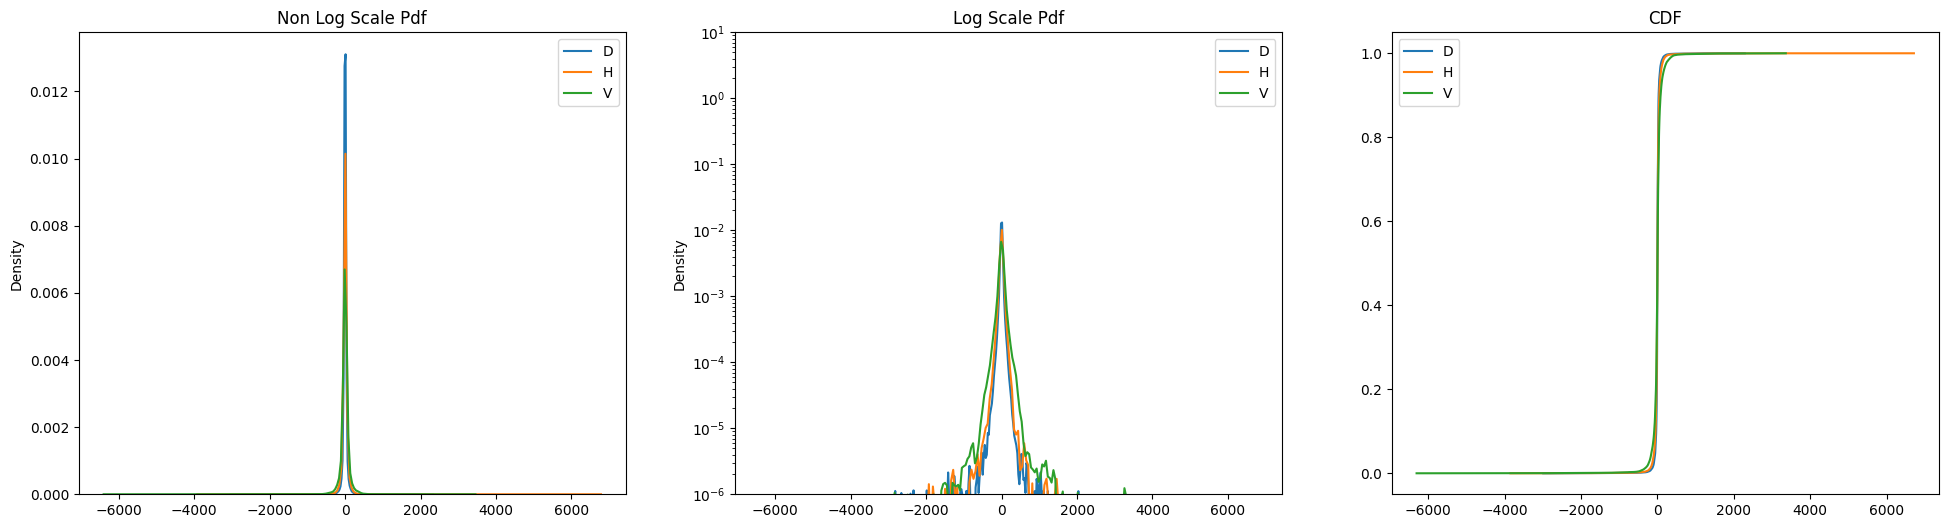

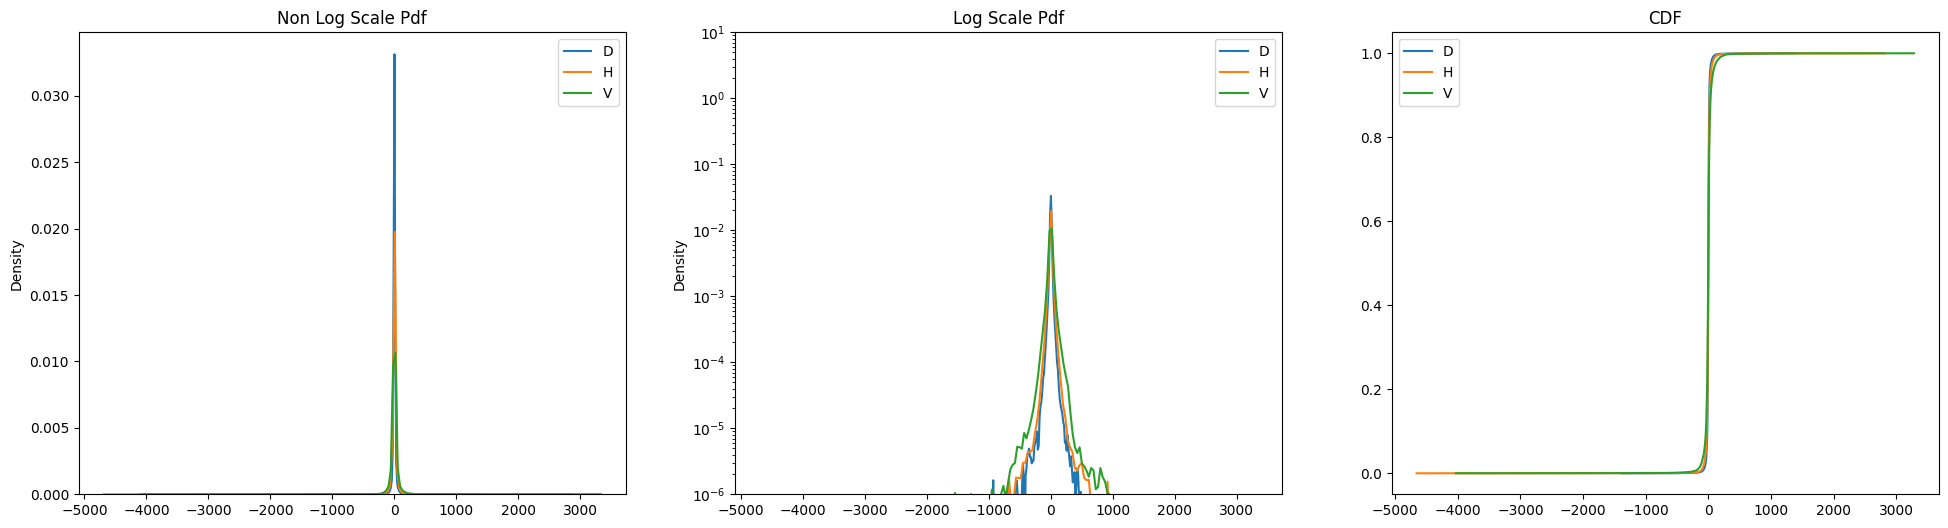

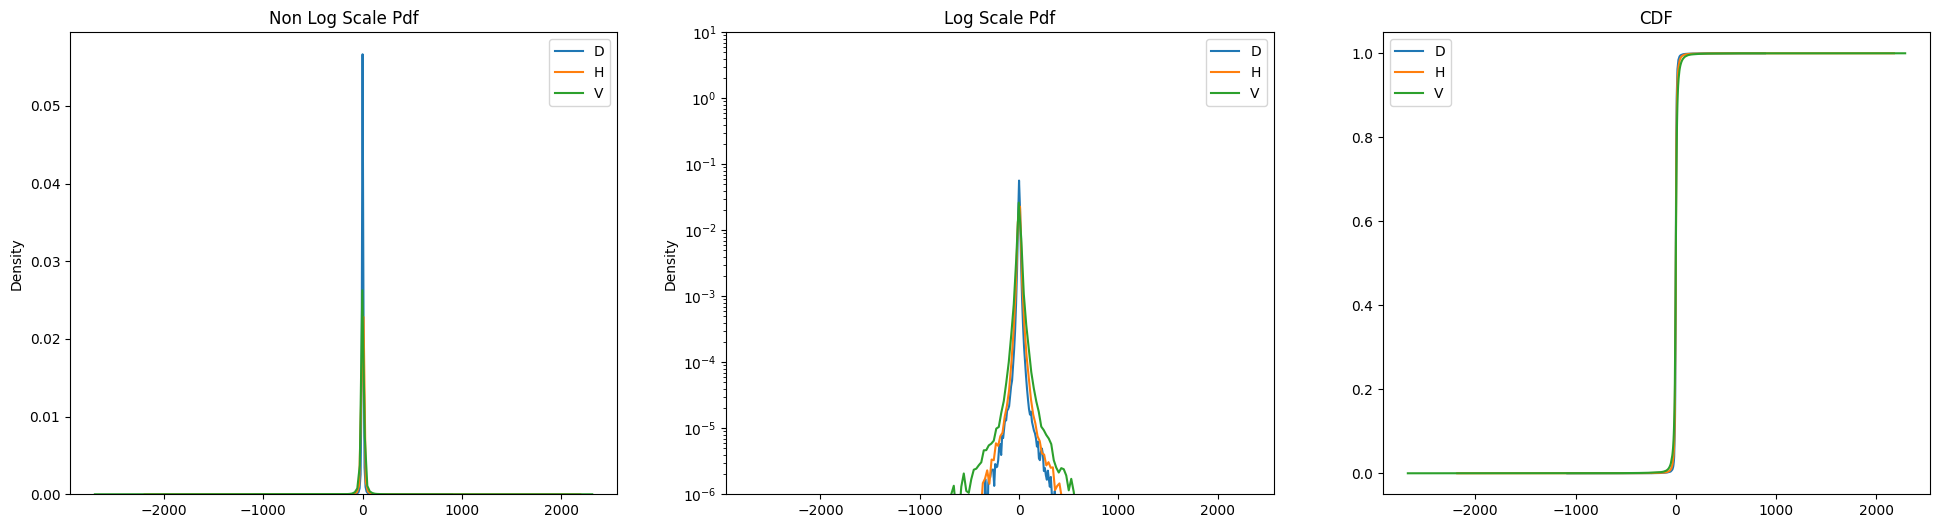

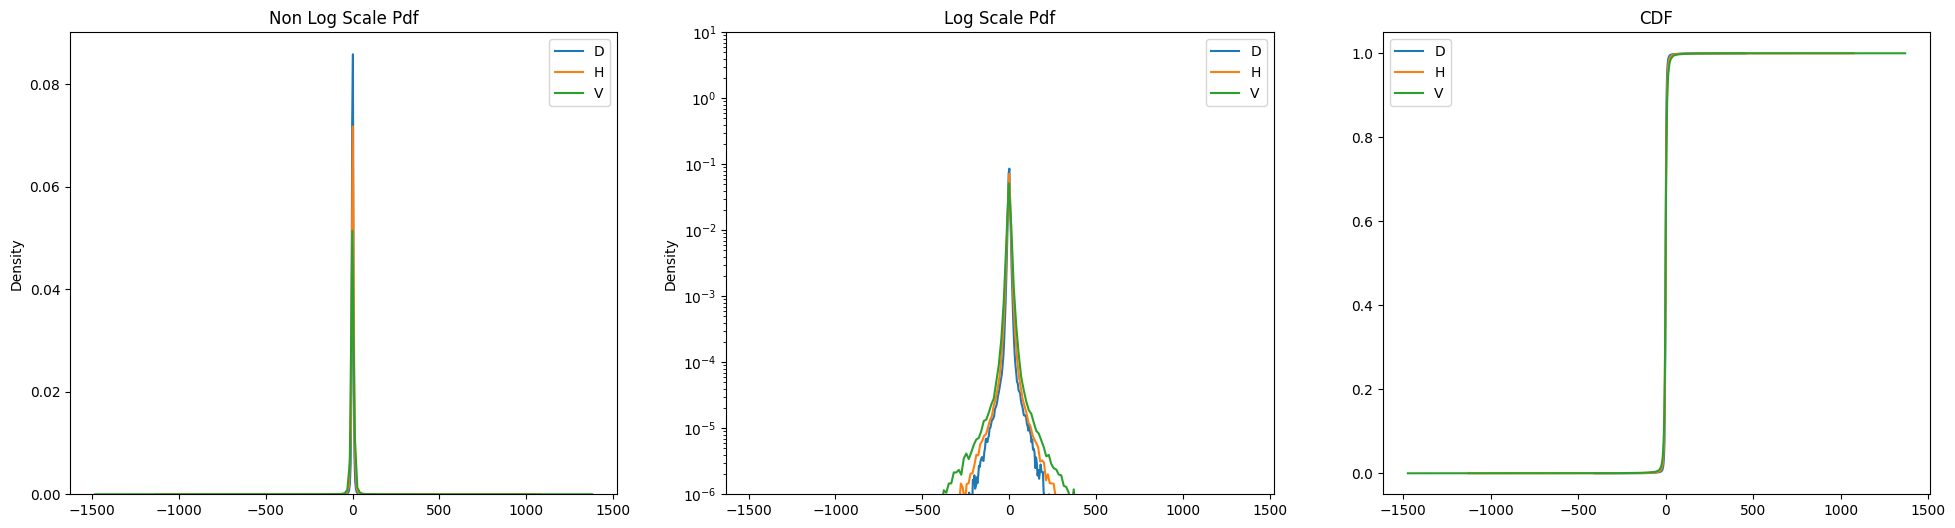

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


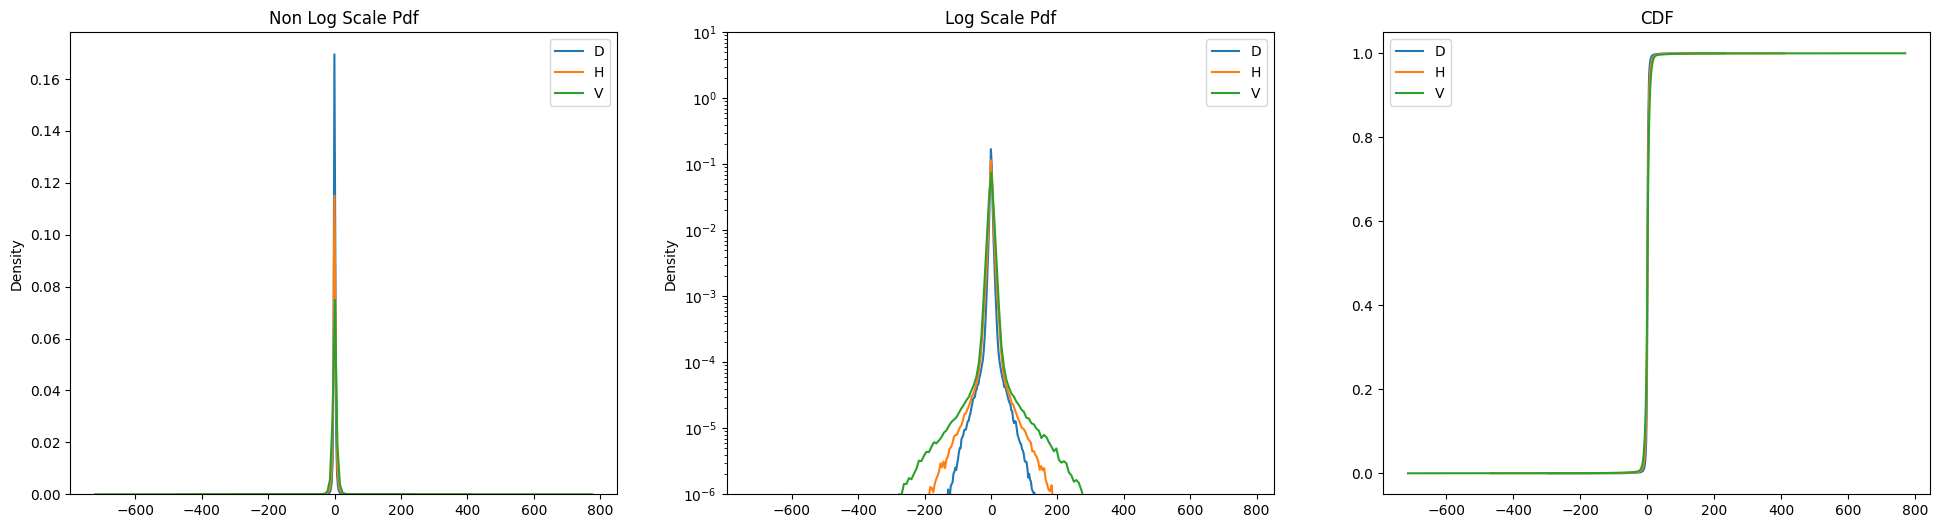

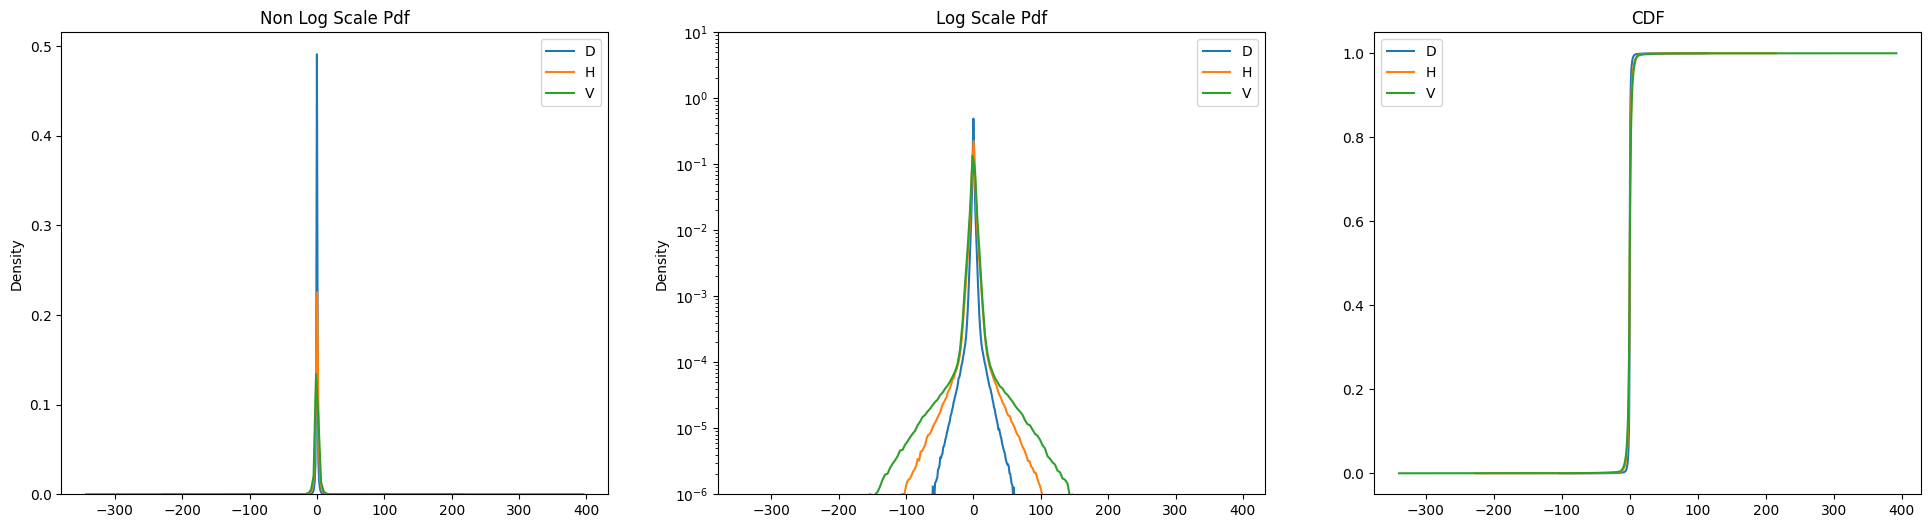

In [12]:
for i in range(2, 10):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


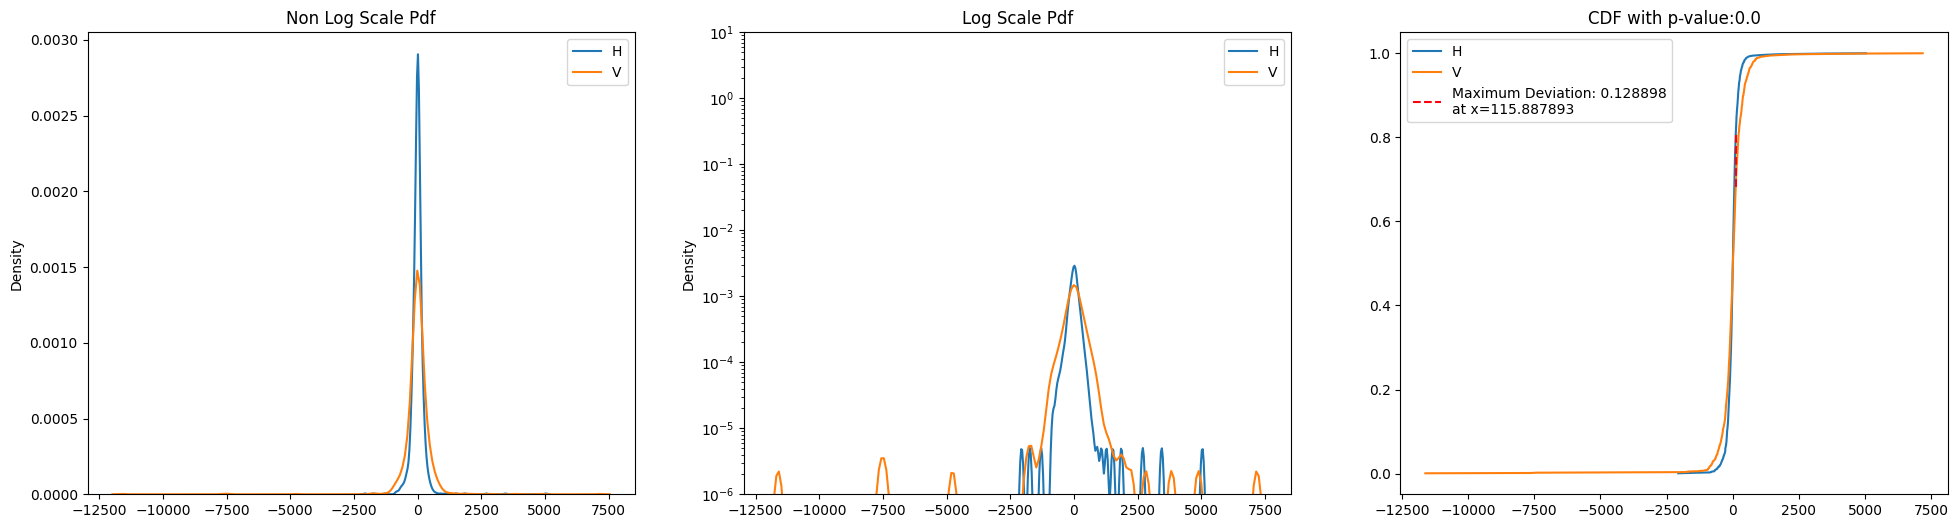

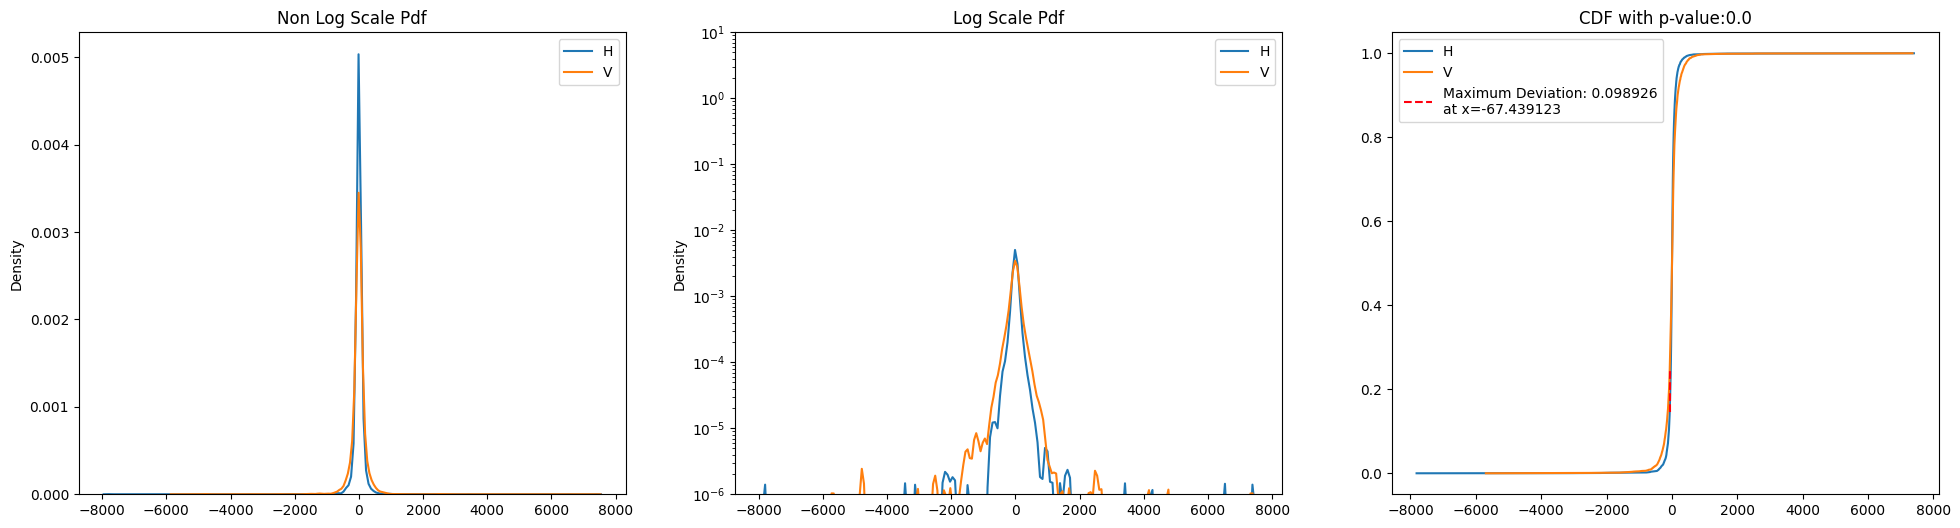

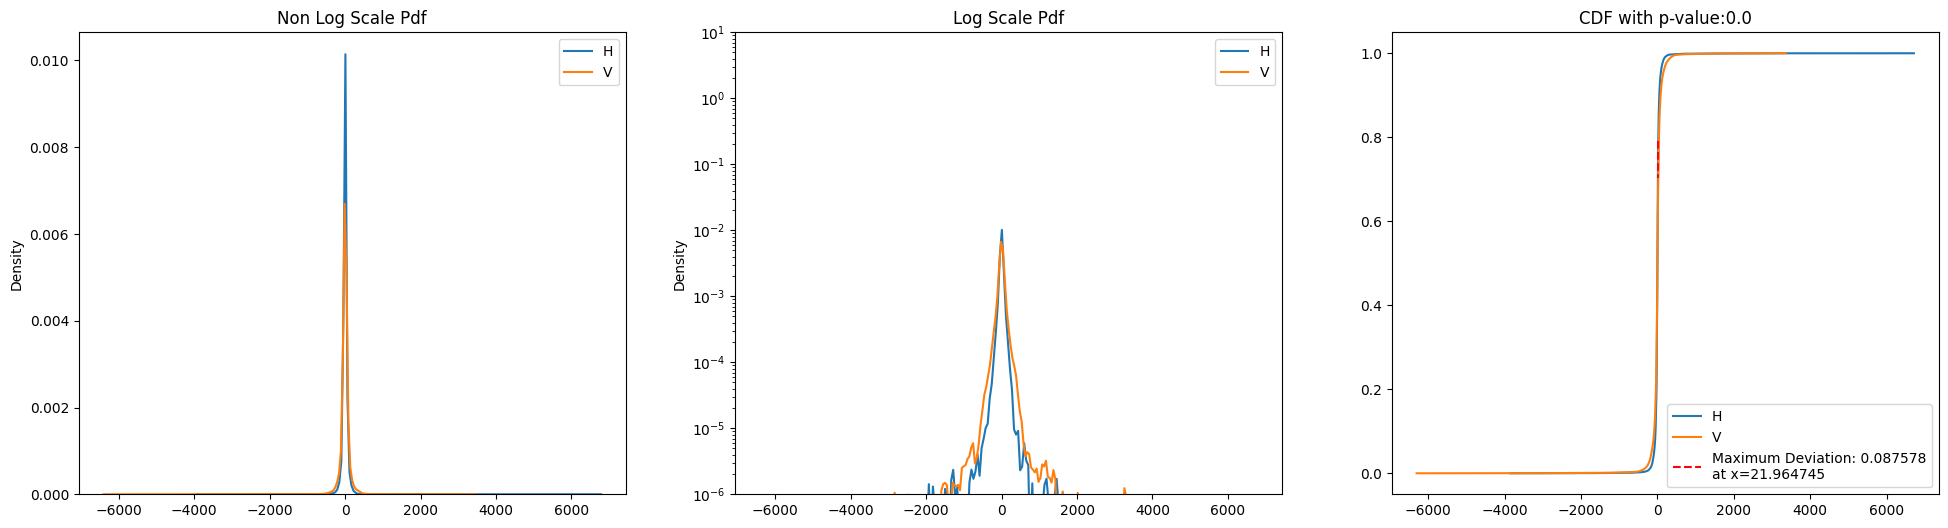

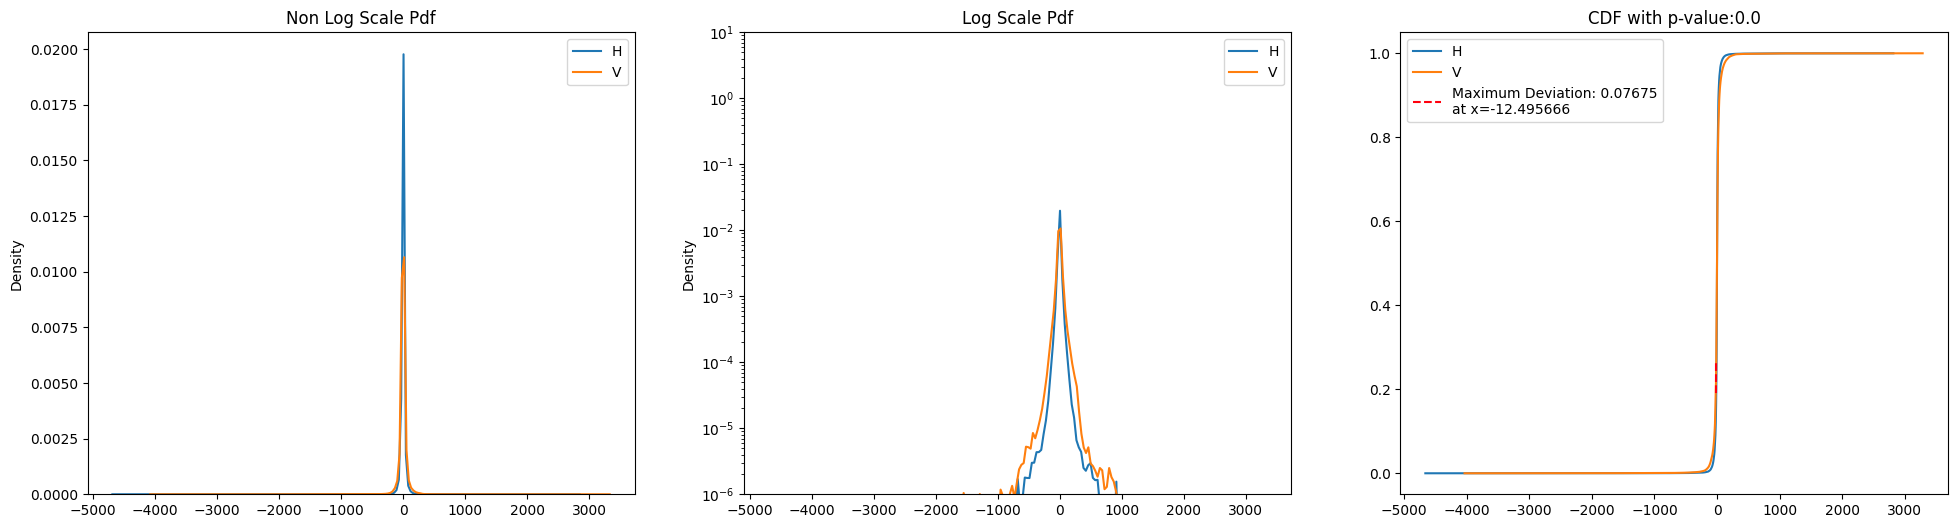

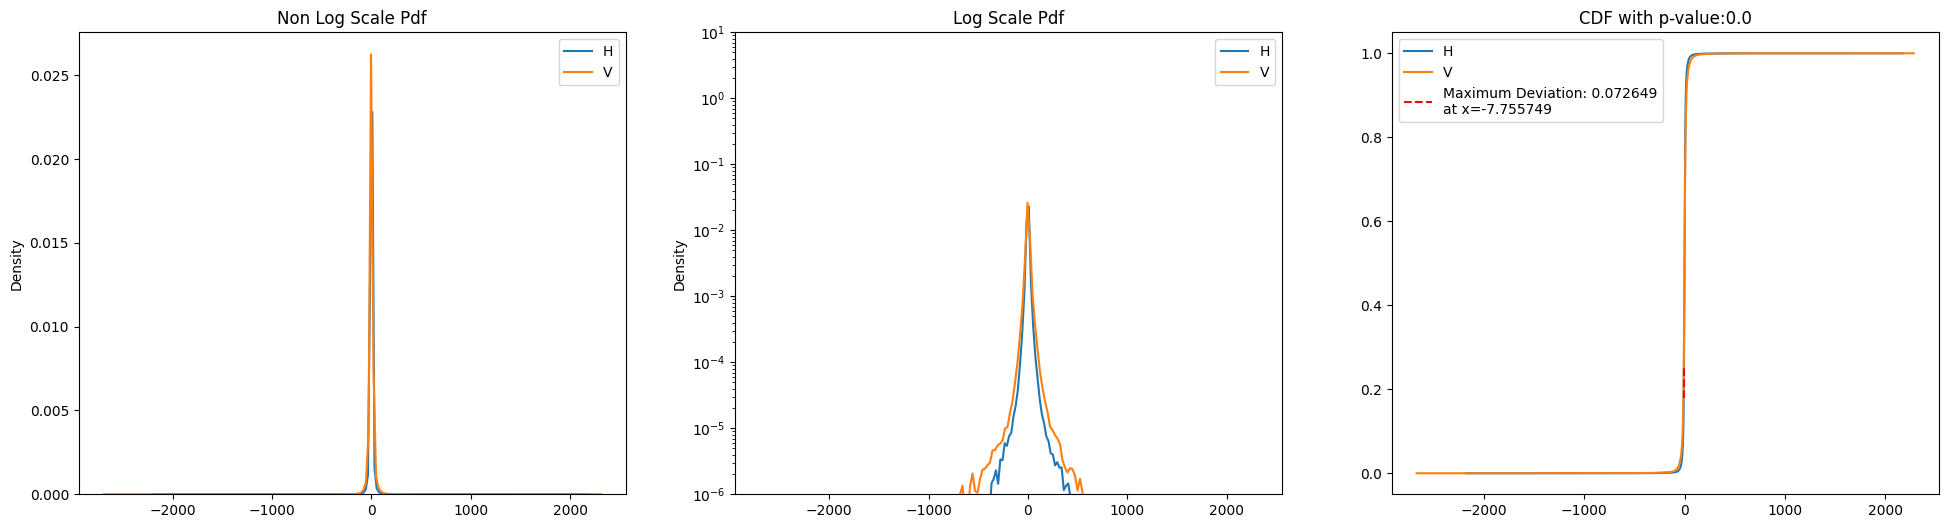

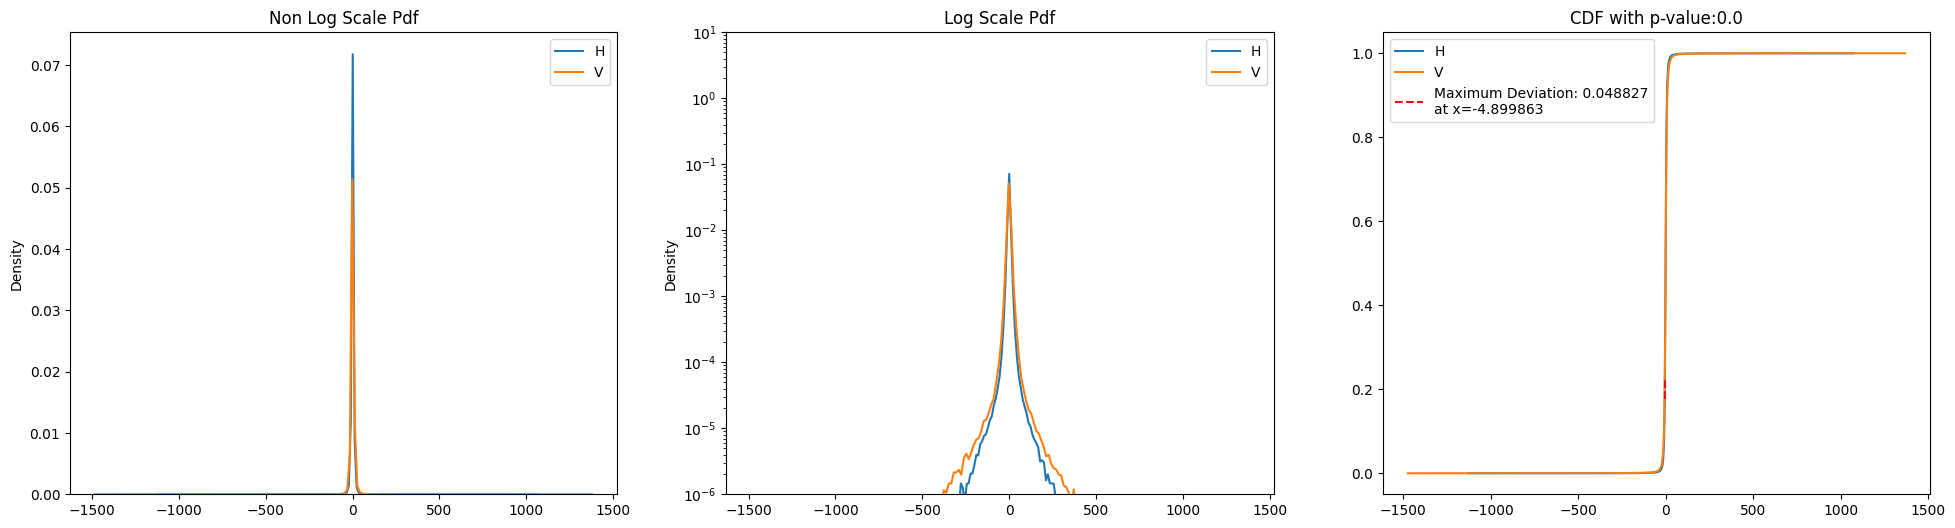

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


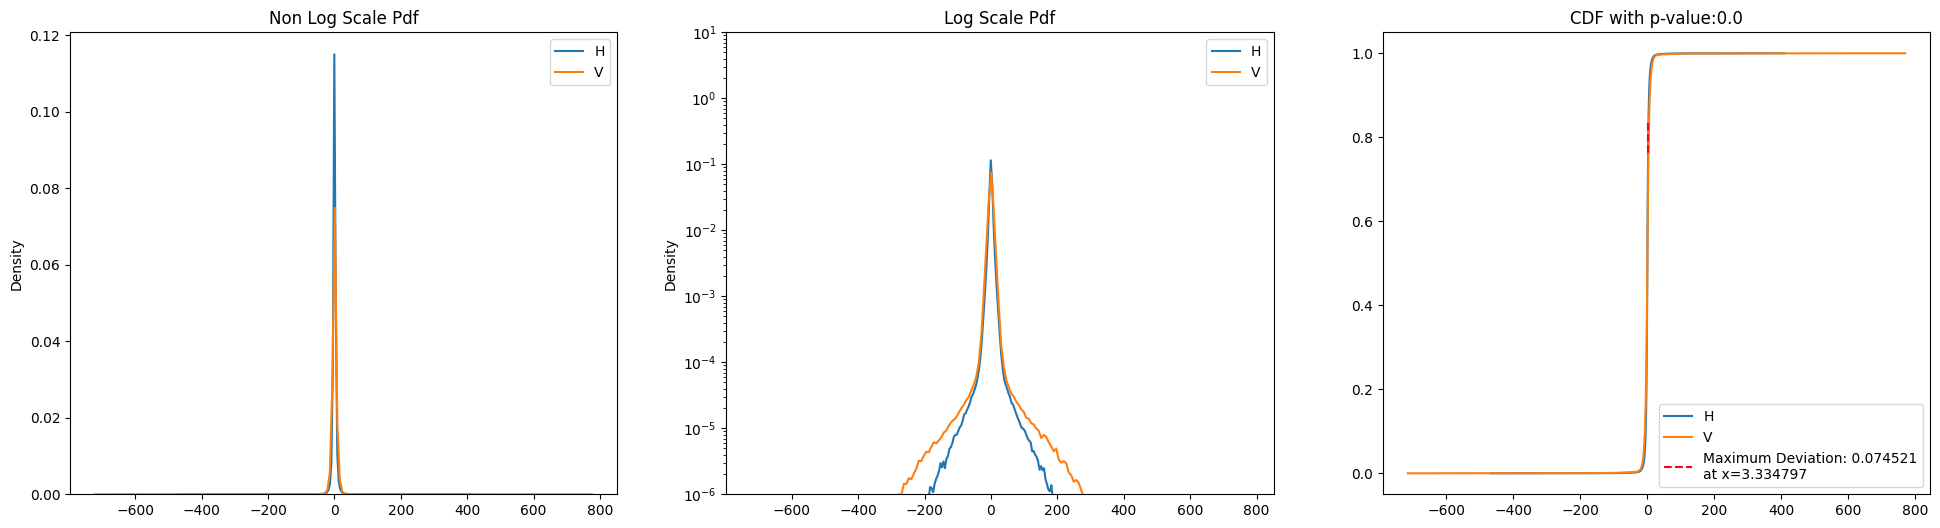

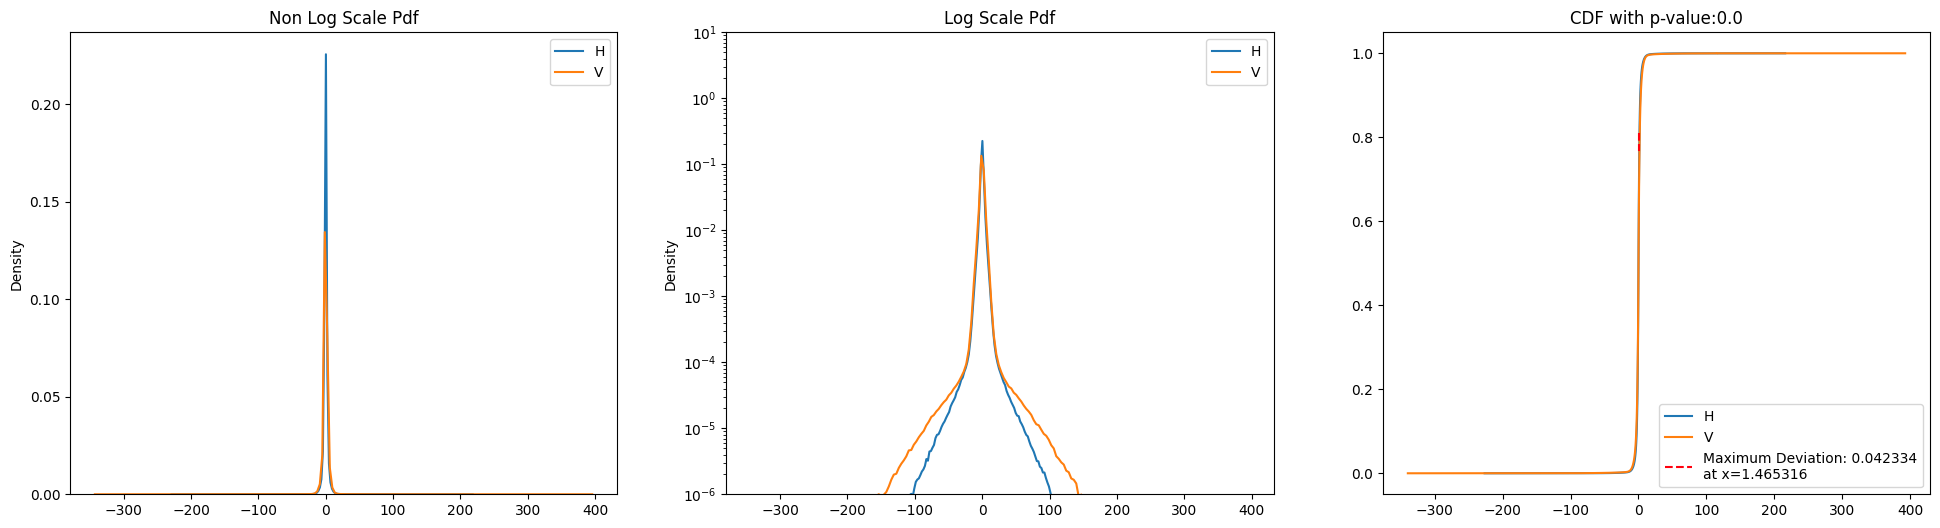

In [13]:
for i in range(2, 10):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Blue

In [14]:
blue_wv = convert_to_wavelet_basis(data_dir, "blue", debug=True, image_opener = npz_opener)
blue_wv.head()

10 layers being used


100%|██████████| 1443/1443 [00:34<00:00, 41.40it/s]


channel  layer orientation  \
0    blue      1          L1   
1    blue      2           D   
2    blue      2           H   
3    blue      2           V   
4    blue      3           D   

                                                data  
0  [207.1041164523968, -221.151258302175, -60.733...  
1  [119.19117360415537, -8.577300144043988, -30.5...  
2  [-138.52333505458313, -603.5608098042532, 3.47...  
3  [-207.52285332126542, 664.0785065246625, 24.75...  
4  [65.78475318487736, 16.832860465348652, -3.442...

In [15]:
blue_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, 11):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    blue_df = pd.concat([blue_df, ks_df], axis = 0)
blue_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_8098/2515409215.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  blue_df = pd.concat([blue_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
0     2     D      H  0.086625   3.927955e-05
2     2     H      V  0.145530   9.678508e-14
1     2     D      V  0.215523   9.374175e-30
0     3     D      H  0.082814   1.234013e-17
2     3     H      V  0.093555   2.139792e-22
1     3     D      V  0.152114   1.196171e-58
0     4     D      H  0.067698   1.914927e-46
2     4     H      V  0.090220   3.250238e-82
1     4     D      V  0.146700  2.690998e-217
0     5     D      H  0.054715  1.365109e-120
2     5     H      V  0.072549  8.584380e-212
1     5     D      V  0.126483   0.000000e+00
0     6     D      H  0.043968  1.037134e-310
2     6     H      V  0.068680   0.000000e+00
1     6     D      V  0.112447   0.000000e+00
2     7     H      V  0.044801   0.000000e+00
0     7     D      H  0.053620   0.000000e+00
1     7     D      V  0.098189   0.000000e+00
2     8     H      V  0.071104   0.000000e+00
0     8     D      H  0.080129   0.000000e+00
1     8     D      V  0.147678   0.000000e+00
2     9     H      V  0.038623   0.000000e+00
0     9     D      H  0.133540   0.000000e+00
1     9     D      V  0.166130   0.000000e+00
2    10     H      V  0.020670   0.000000e+00
0    10     D      H  0.197257   0.000000e+00
1    10     D      V  0.213157   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


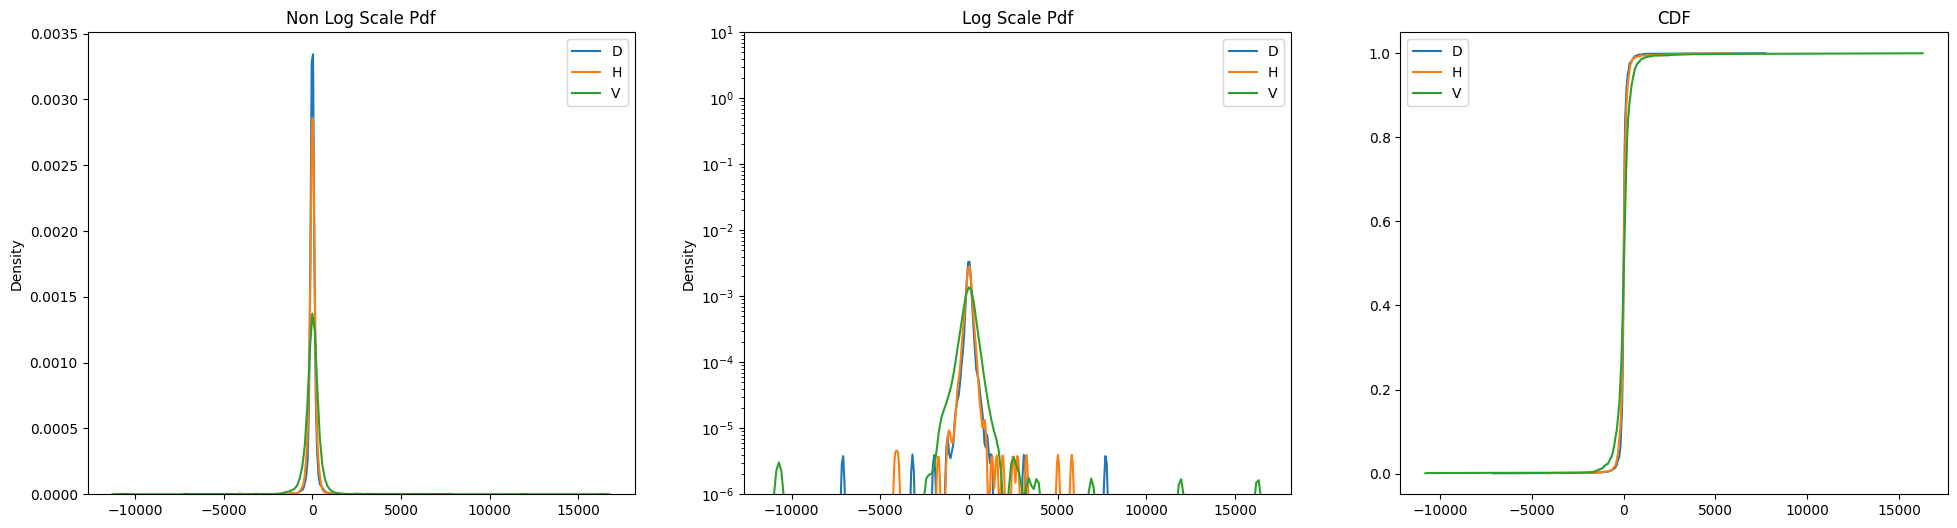

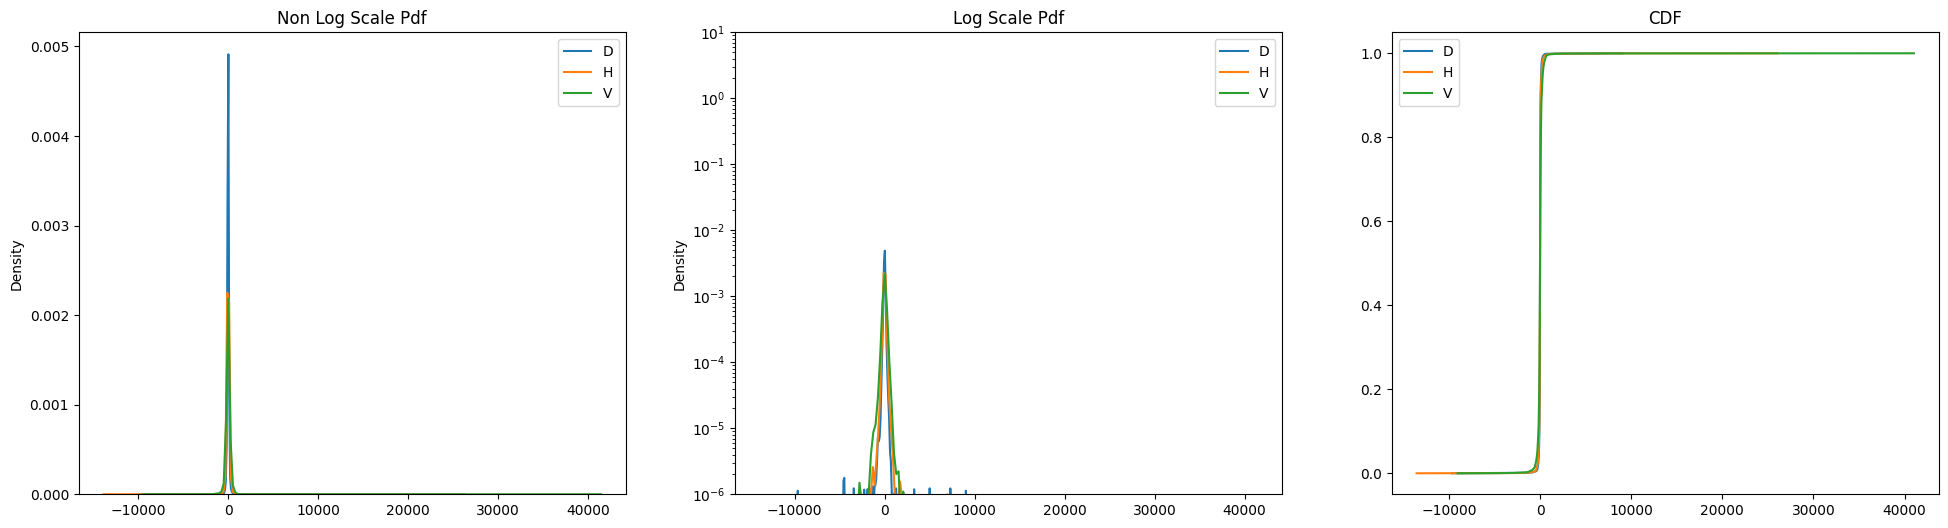

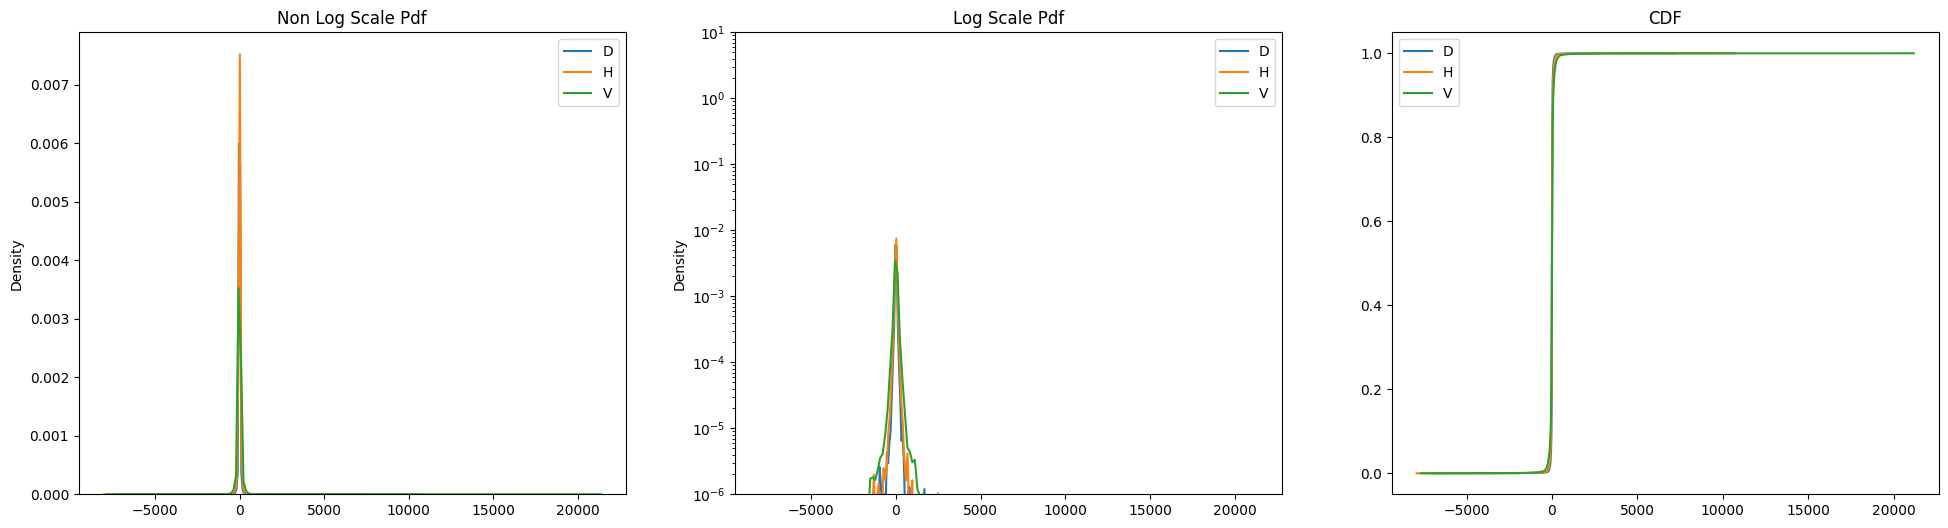

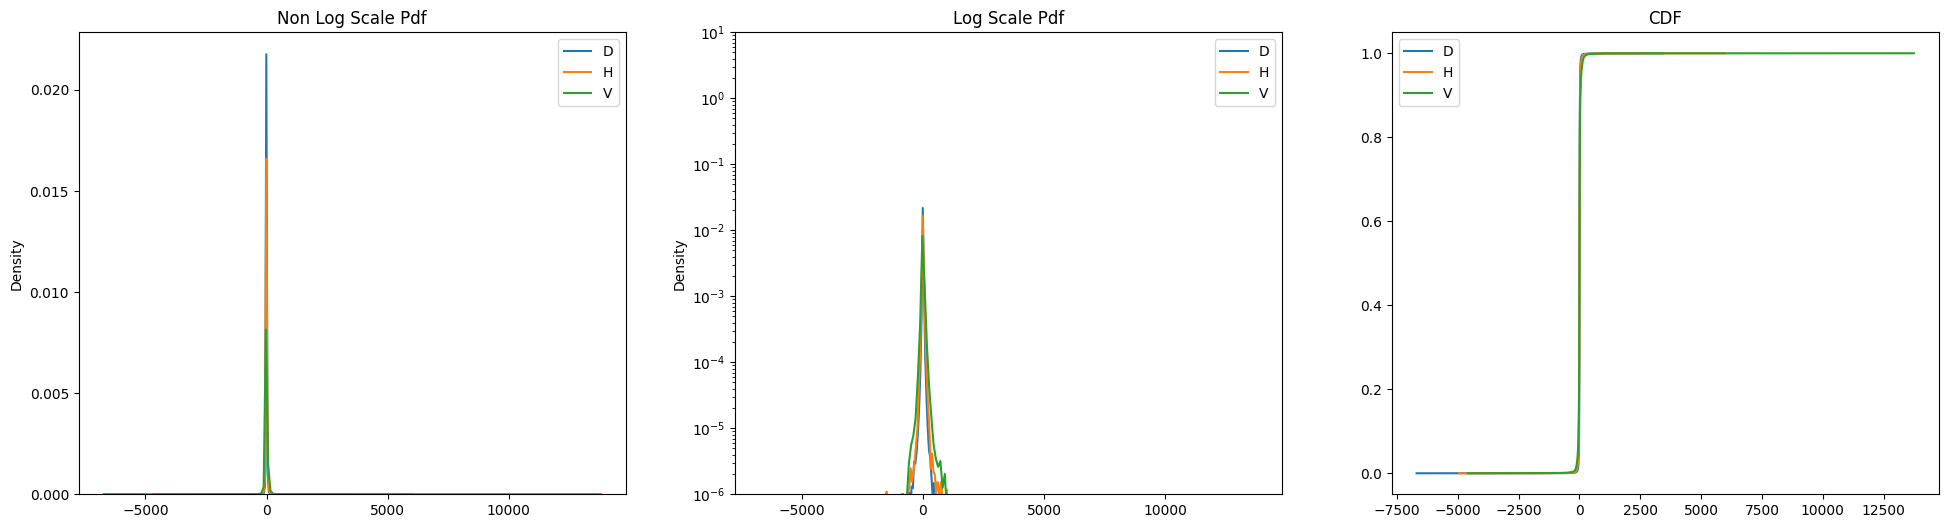

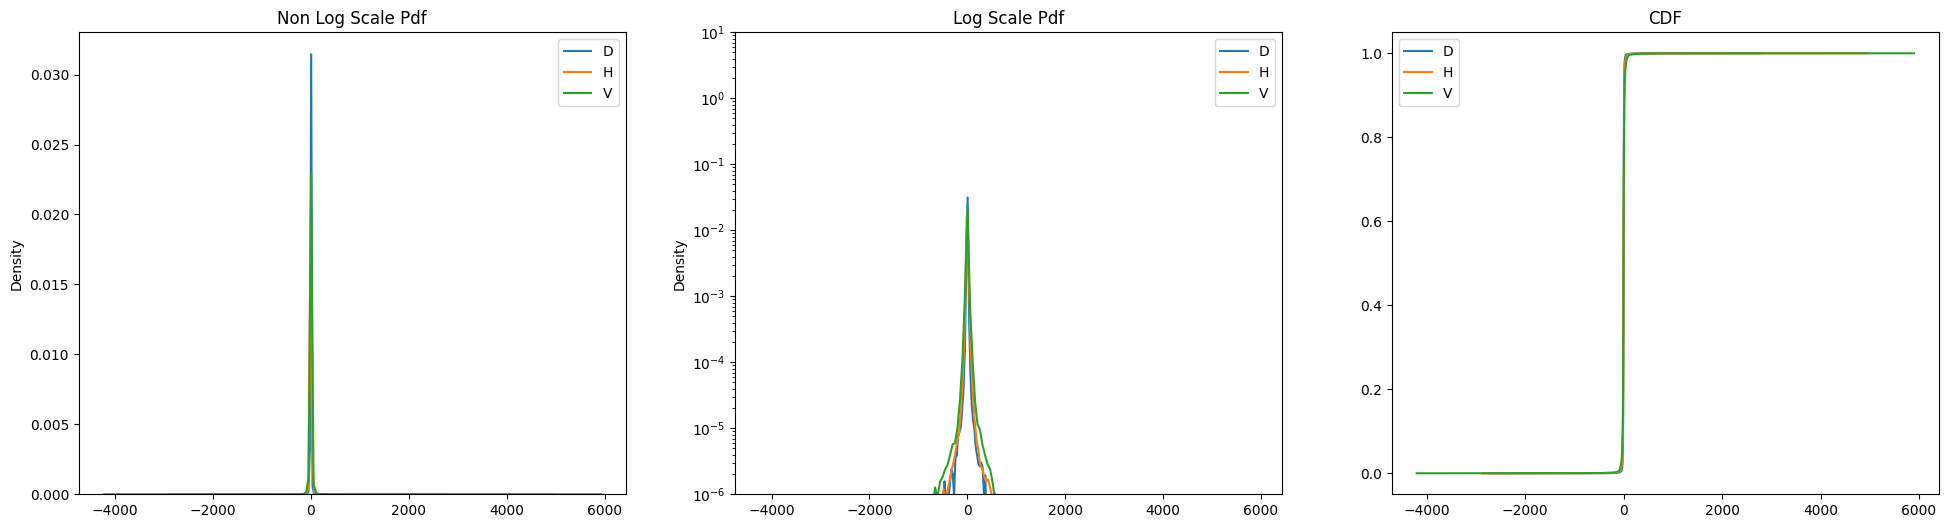

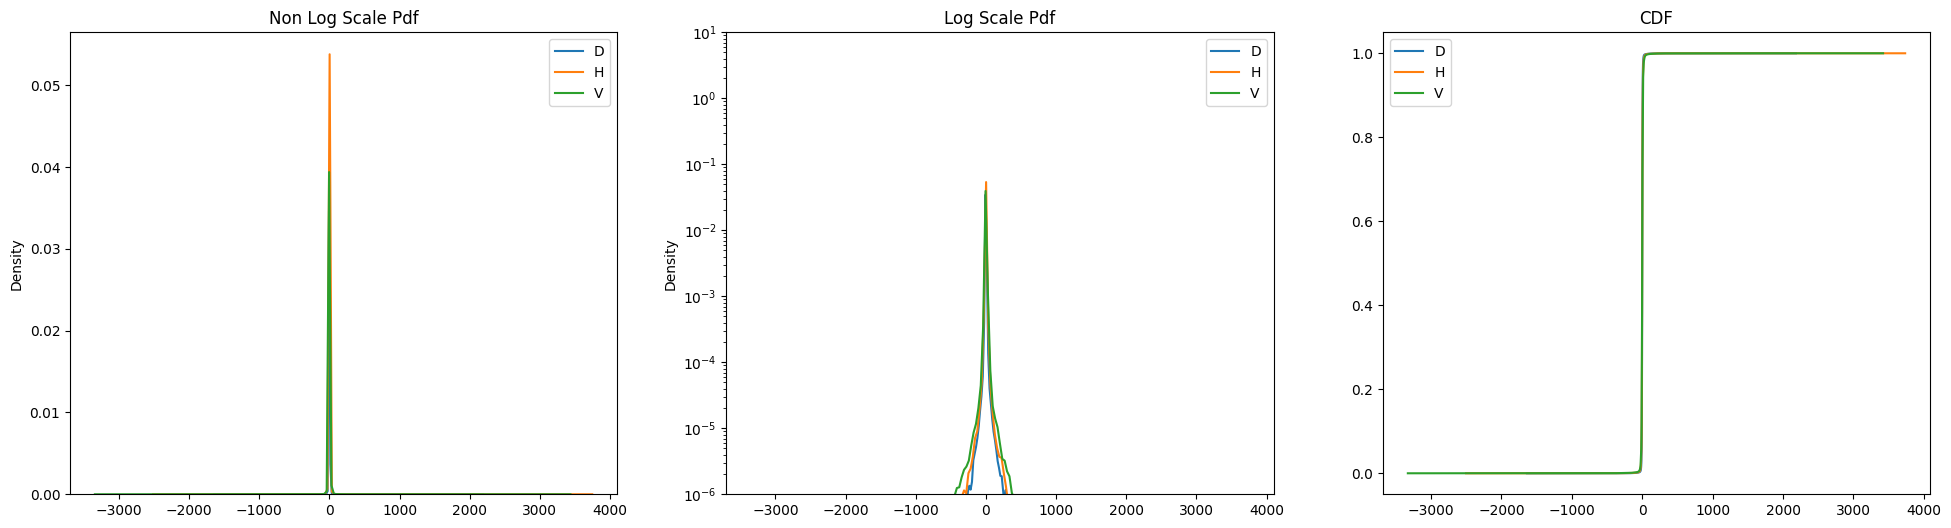

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


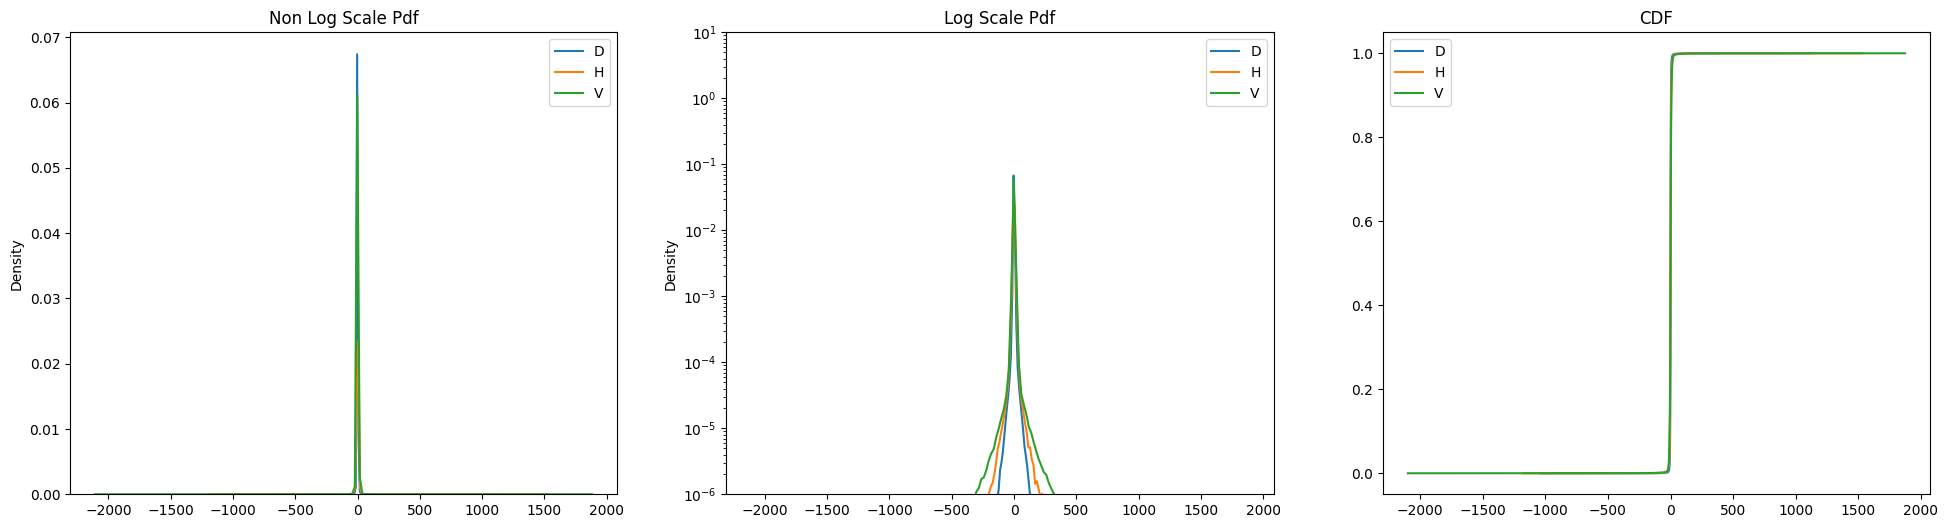

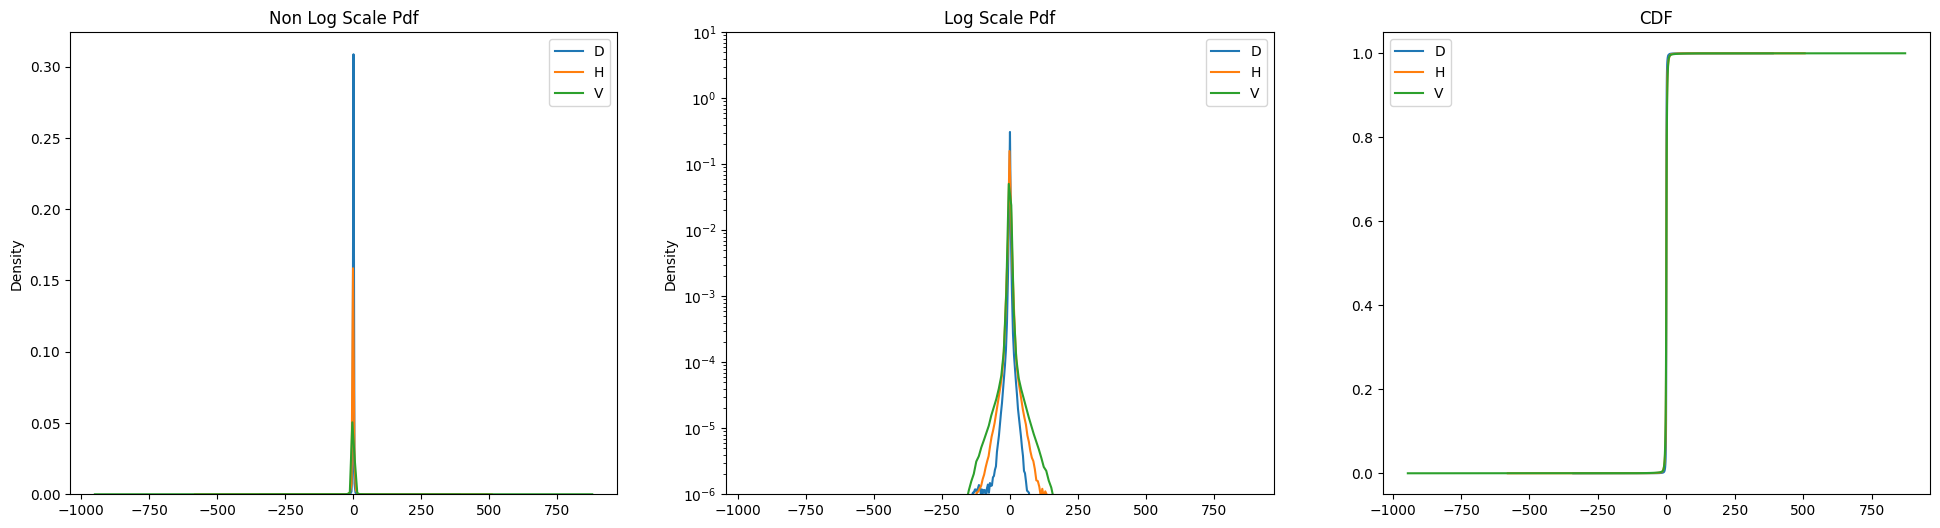

In [16]:
for i in range(2, 10):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


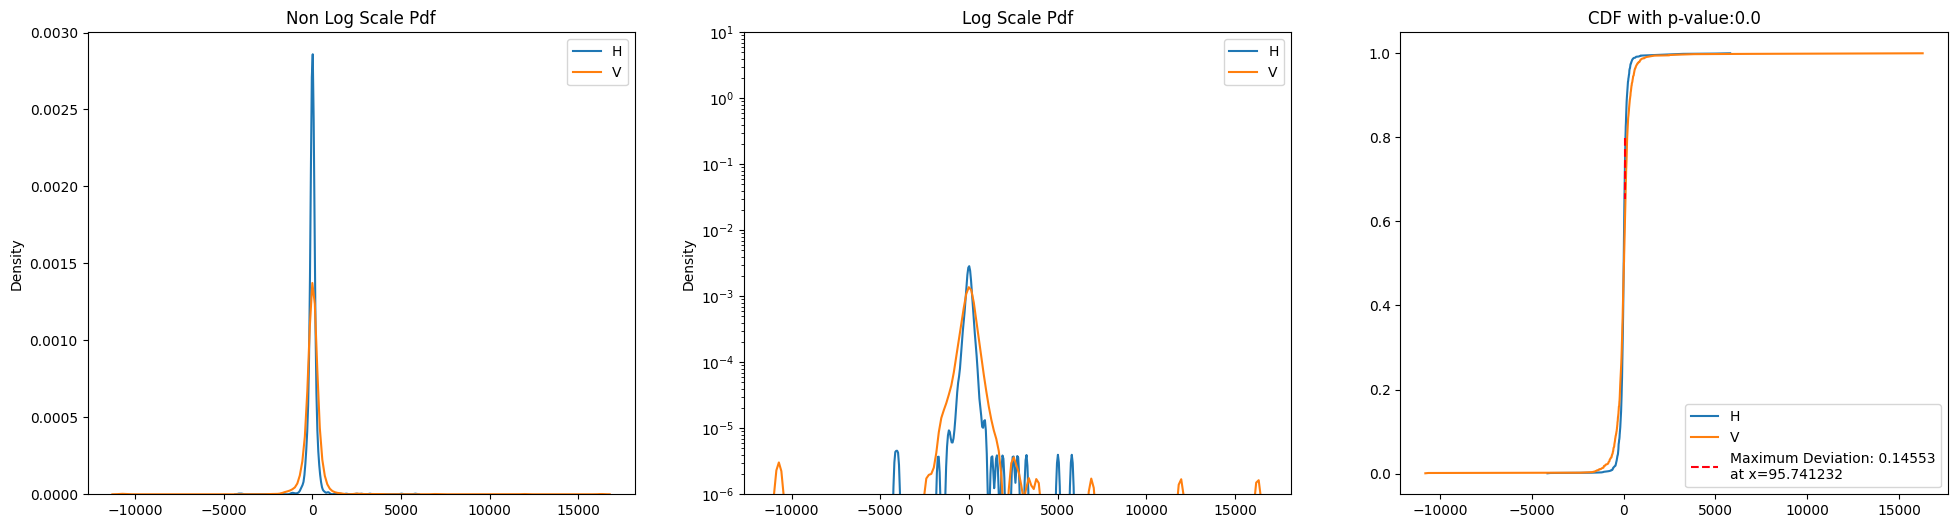

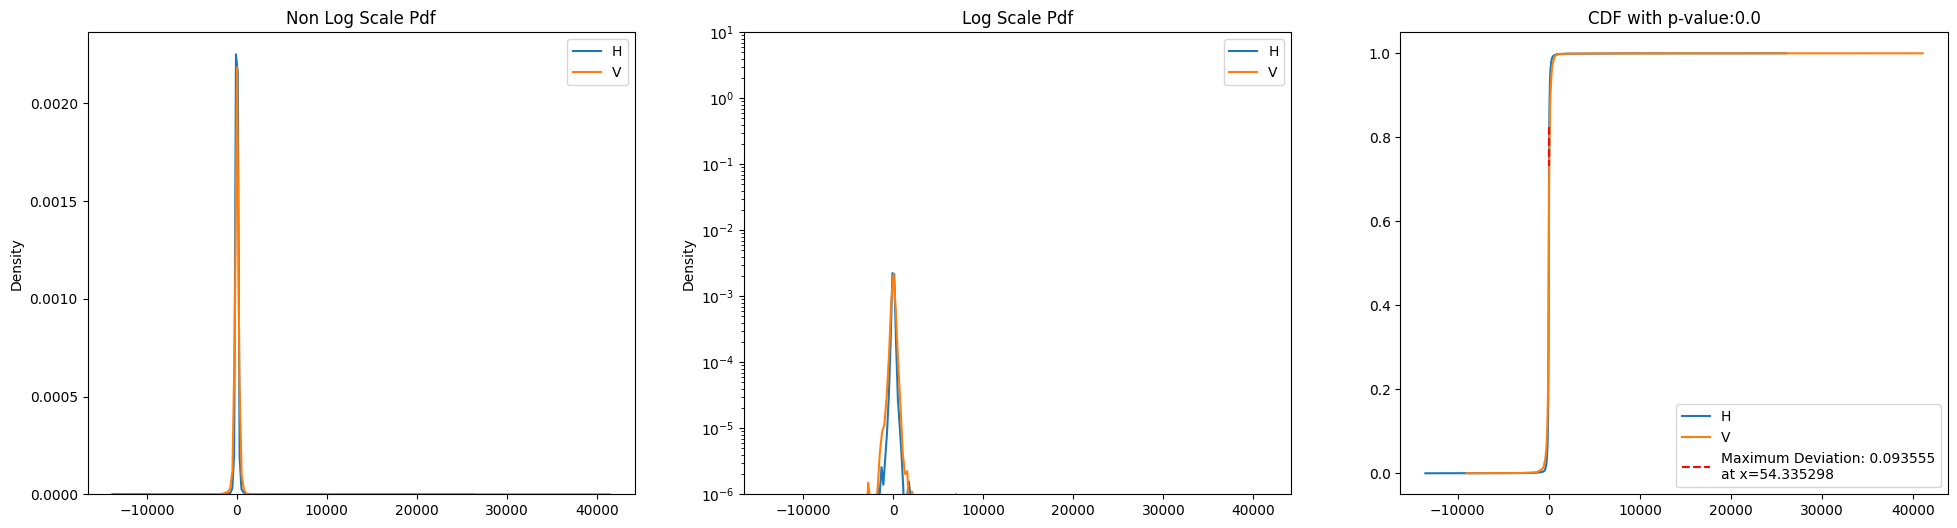

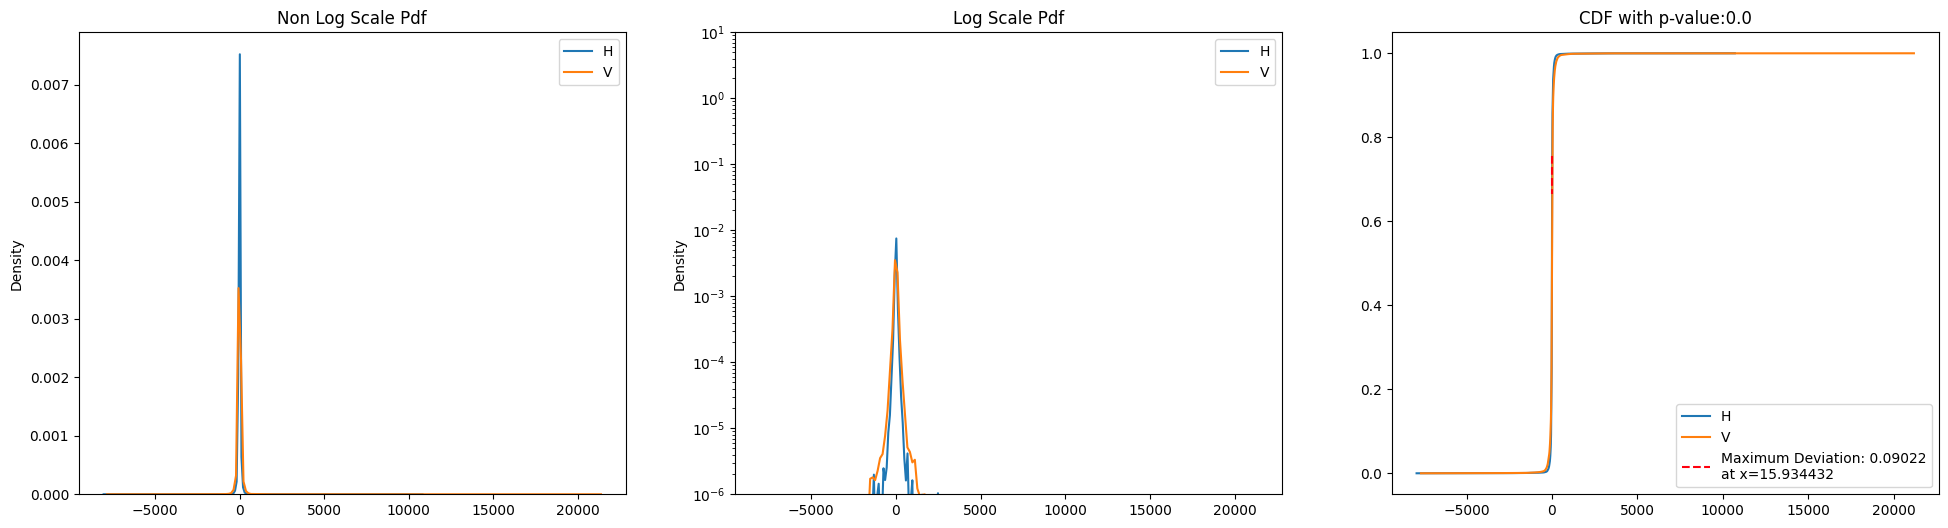

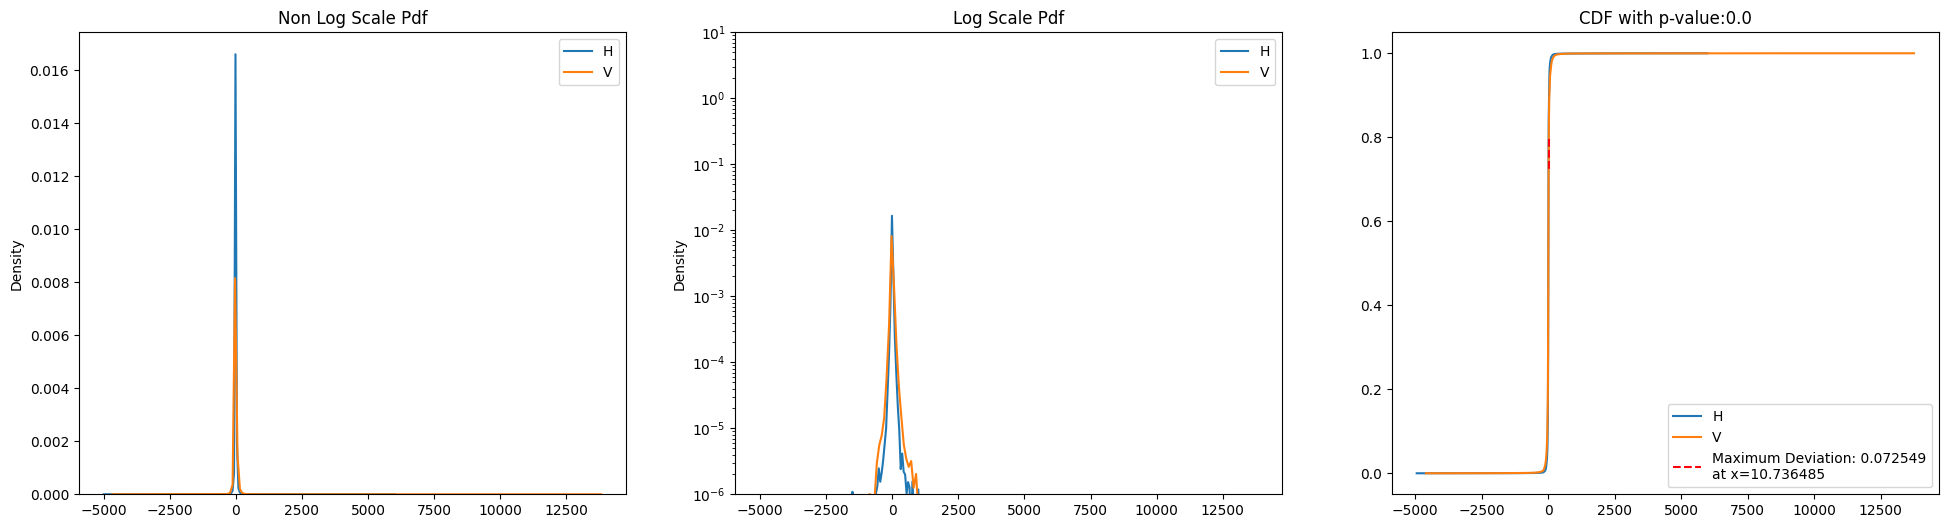

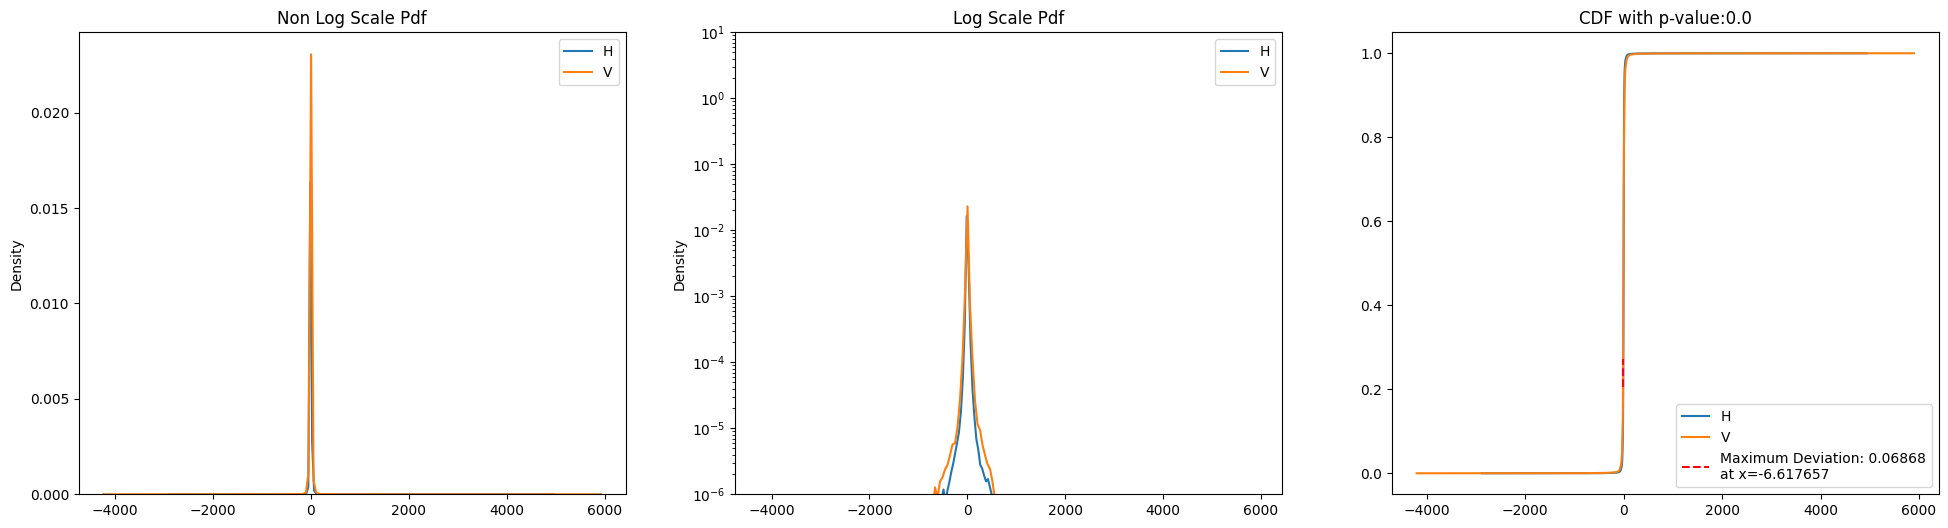

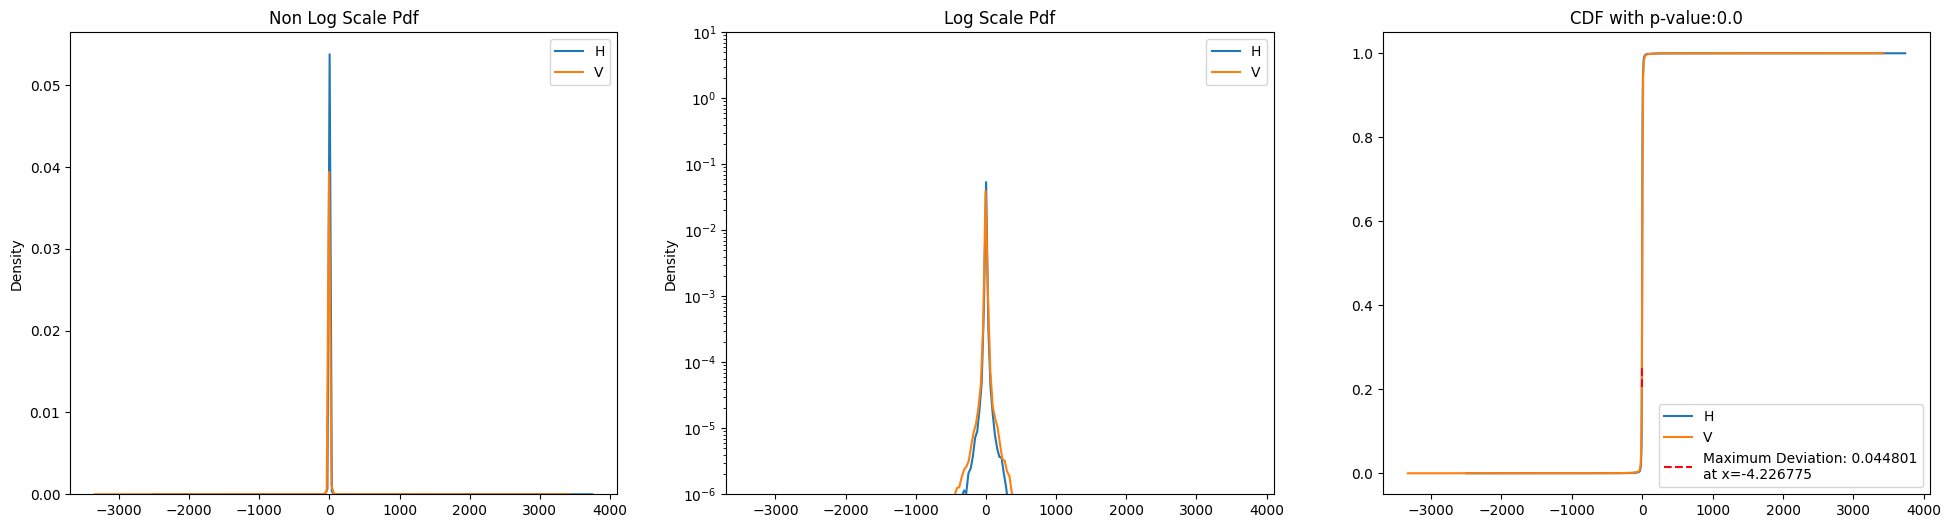

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


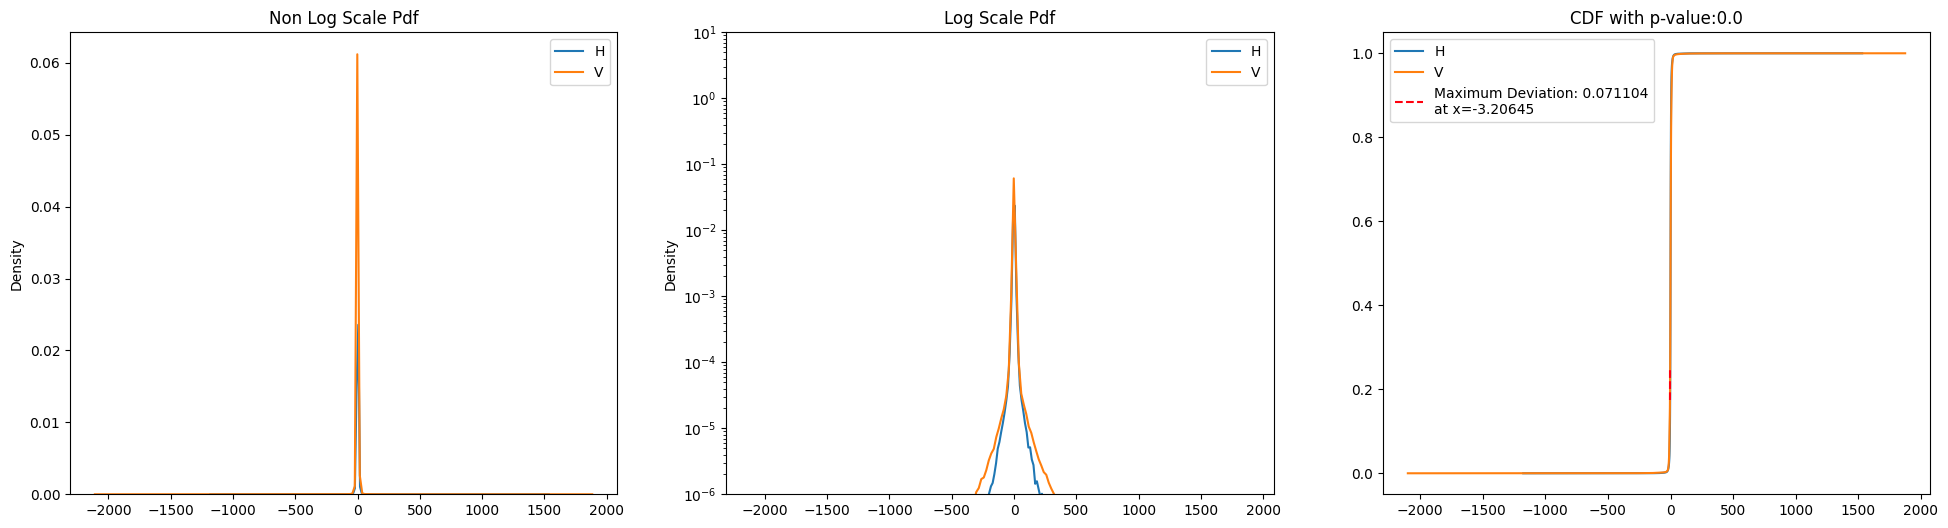

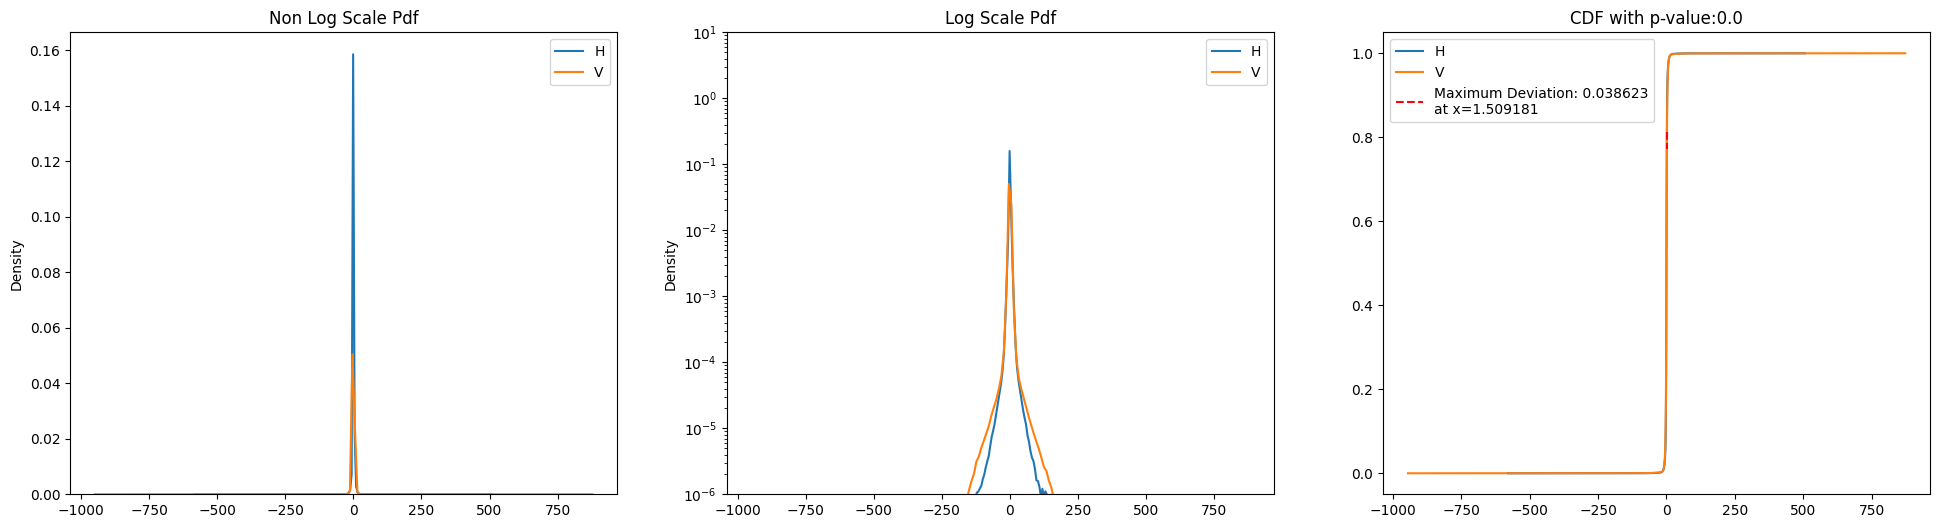

In [17]:
for i in range(2, 10):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Gray

In [18]:
gray_wv = convert_to_wavelet_basis(data_dir, "gray", debug=True, image_opener = npz_opener)
gray_wv.head()

10 layers being used


100%|██████████| 1443/1443 [00:46<00:00, 31.12it/s]


channel  layer orientation  \
0    gray      1          L1   
1    gray      2           D   
2    gray      2           H   
3    gray      2           V   
4    gray      3           D   

                                                data  
0  [232.85793533985662, -71.34654160608645, -123....  
1  [102.65999448157649, -5.96297305499337, -21.51...  
2  [-95.82644169313039, -477.825019474825, -5.820...  
3  [-176.3152032267232, 369.7127253631745, 17.997...  
4  [65.86142722779486, 26.334871920266266, 0.1301...

In [19]:
gray_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, 11):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    gray_df = pd.concat([gray_df, ks_df], axis = 0)
gray_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_8098/3441235349.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gray_df = pd.concat([gray_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
0     2     D      H  0.096327   3.013396e-06
2     2     H      V  0.147609   3.992514e-14
1     2     D      V  0.212058   8.215334e-29
0     3     D      H  0.075017   1.520628e-14
2     3     H      V  0.094075   1.216780e-22
1     3     D      V  0.158870   5.859693e-64
0     4     D      H  0.068477   1.641446e-47
2     4     H      V  0.088747   1.460141e-79
1     4     D      V  0.152503  6.915870e-235
0     5     D      H  0.059338  8.971334e-142
2     5     H      V  0.071910  4.405561e-208
1     5     D      V  0.130901   0.000000e+00
0     6     D      H  0.046813   0.000000e+00
2     6     H      V  0.069847   0.000000e+00
1     6     D      V  0.116197   0.000000e+00
2     7     H      V  0.044940   0.000000e+00
0     7     D      H  0.055017   0.000000e+00
1     7     D      V  0.099005   0.000000e+00
2     8     H      V  0.069949   0.000000e+00
0     8     D      H  0.082776   0.000000e+00
1     8     D      V  0.147153   0.000000e+00
2     9     H      V  0.035752   0.000000e+00
0     9     D      H  0.132959   0.000000e+00
1     9     D      V  0.162316   0.000000e+00
2    10     H      V  0.012076   0.000000e+00
0    10     D      H  0.198136   0.000000e+00
1    10     D      V  0.206319   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


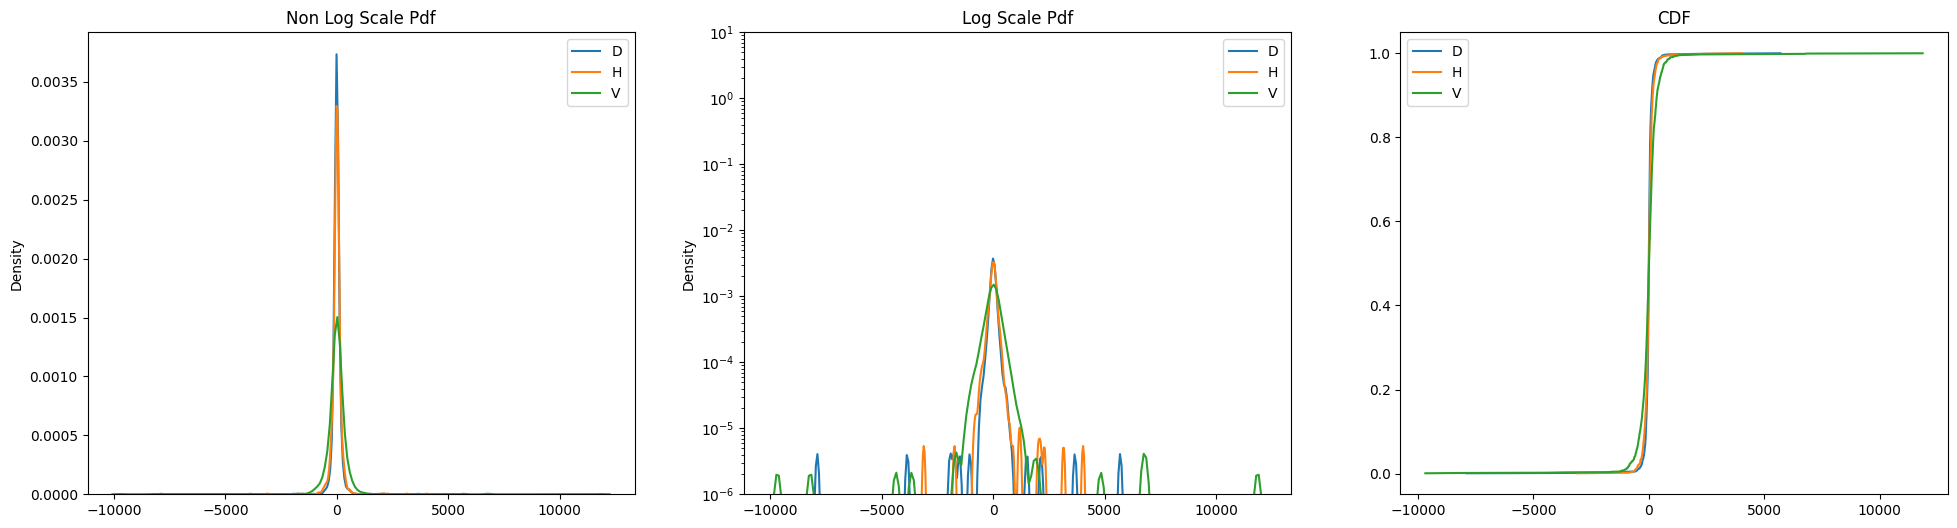

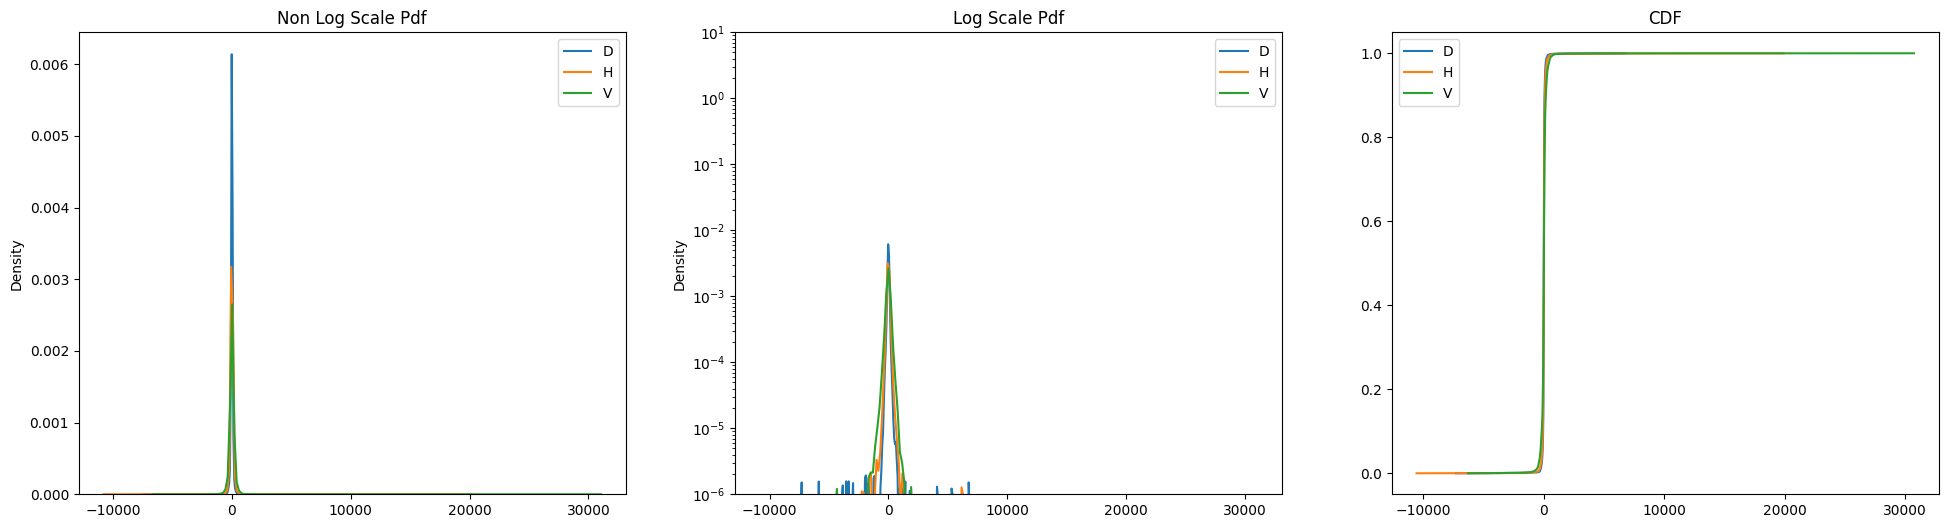

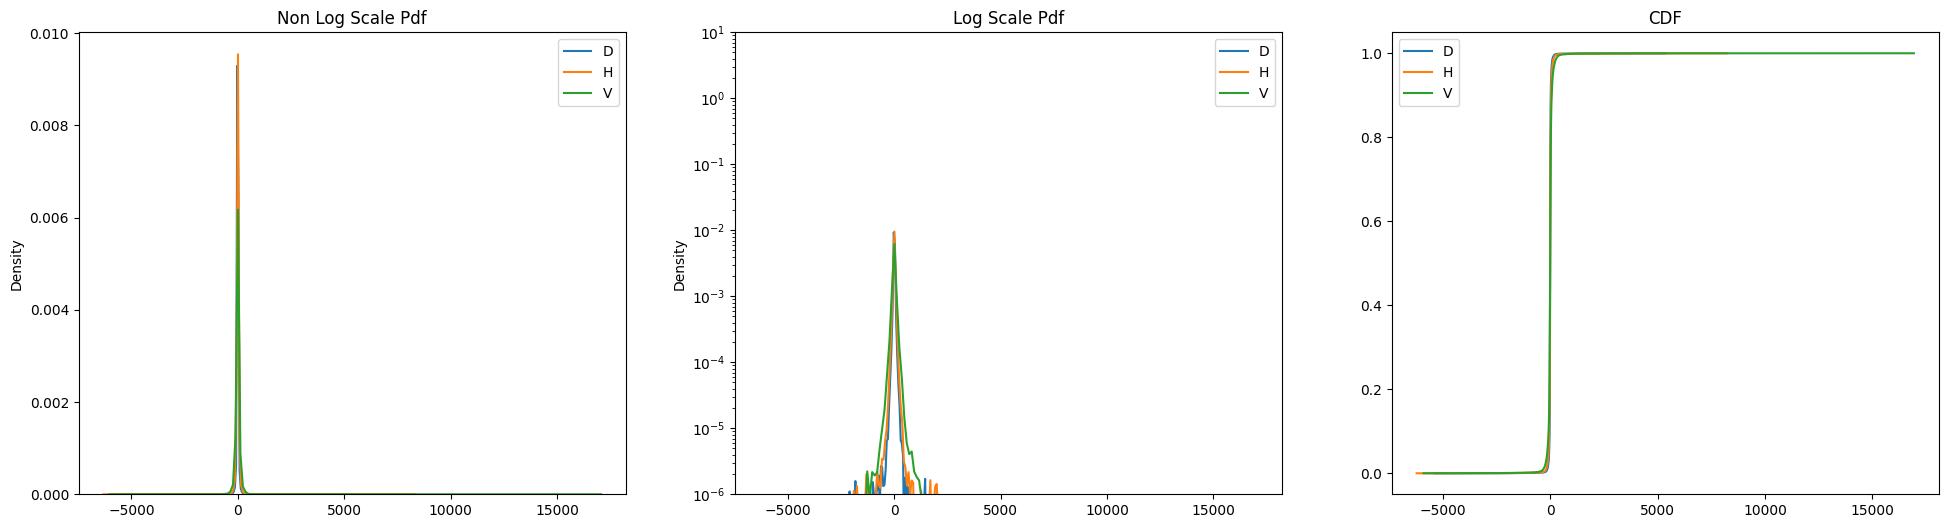

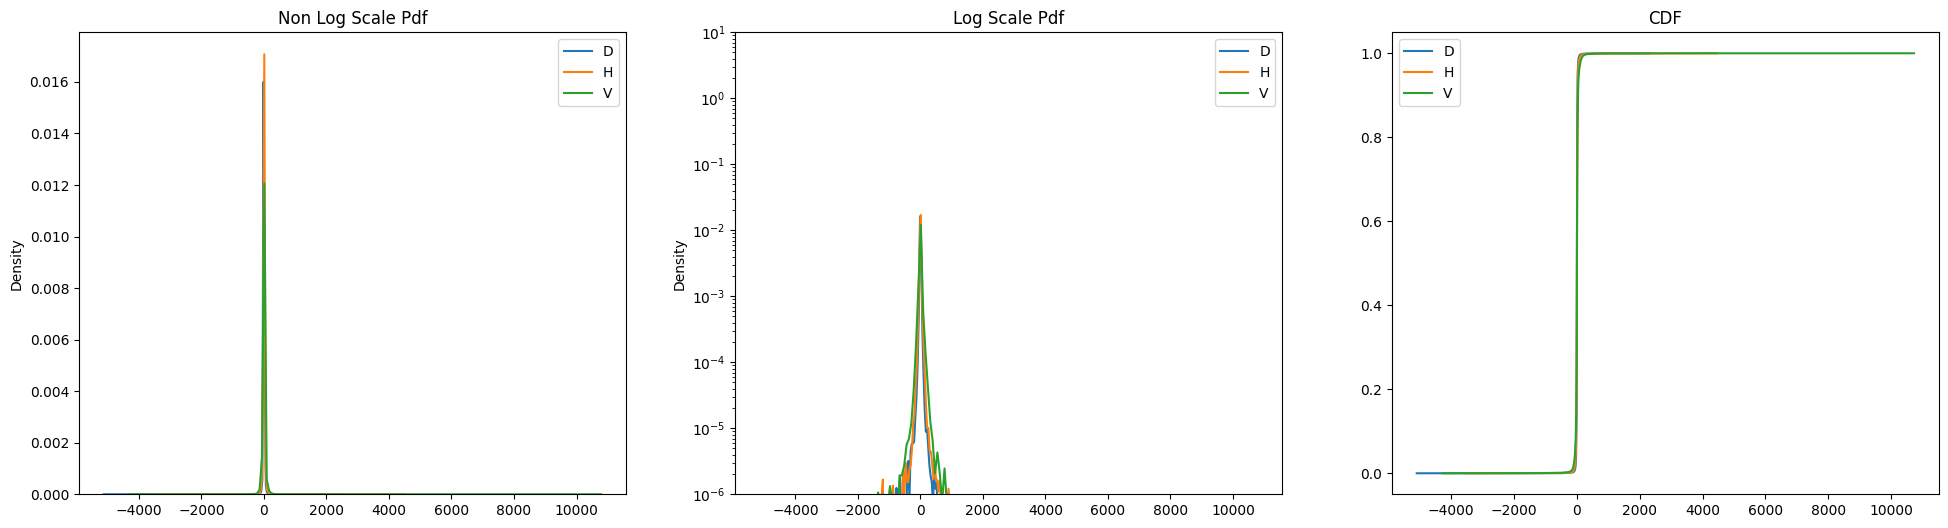

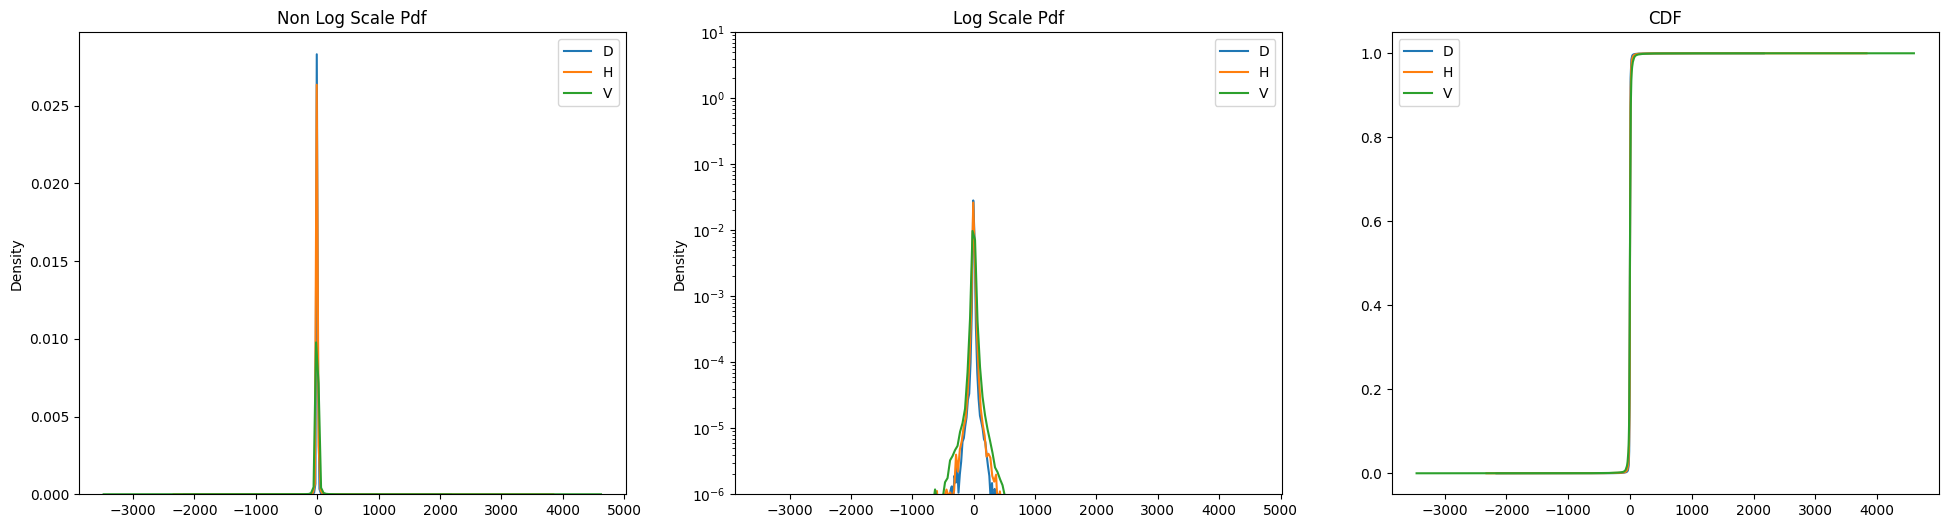

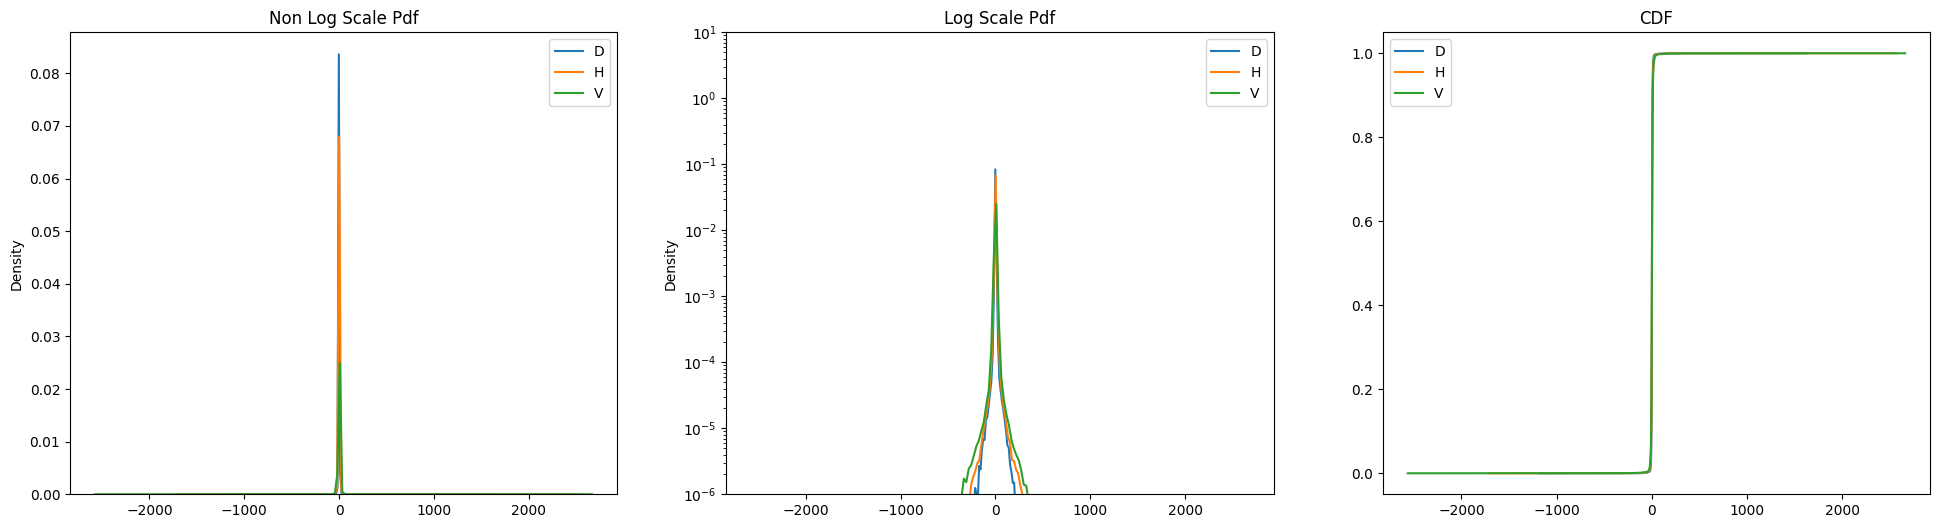

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


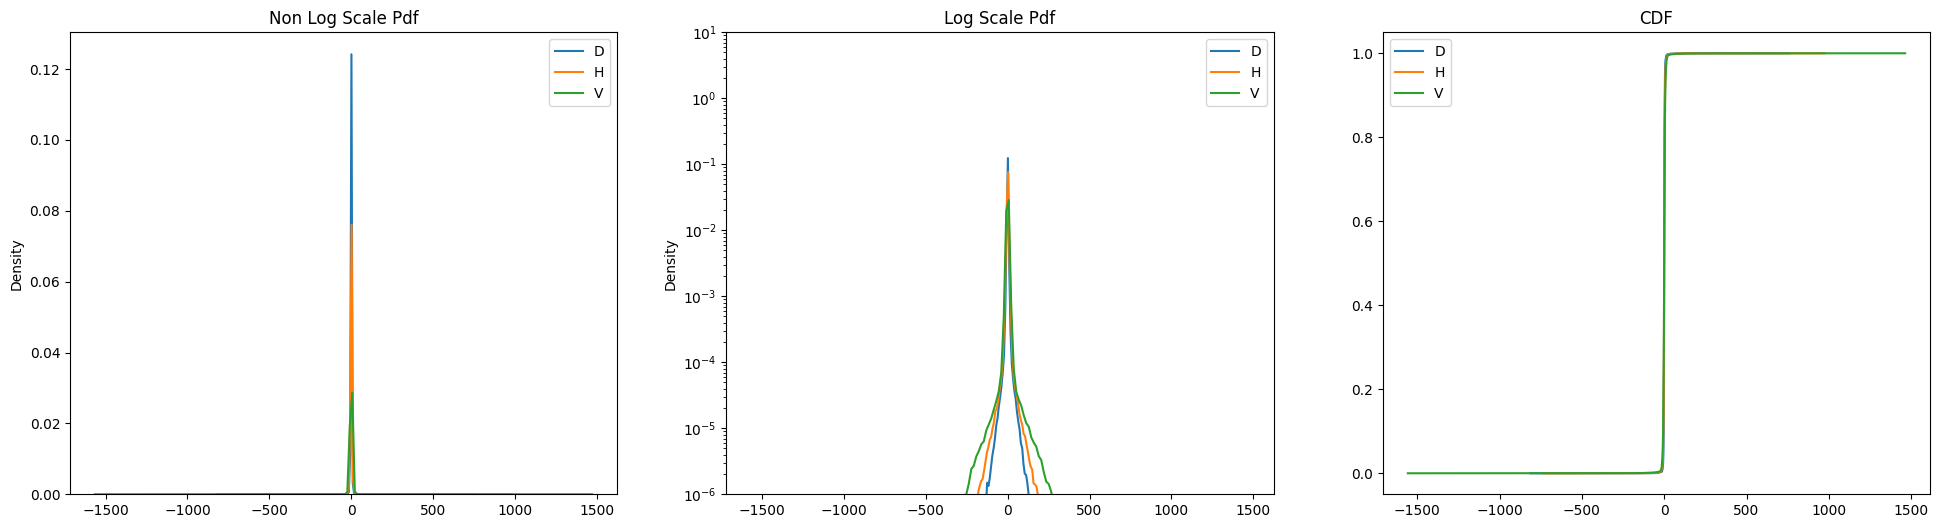

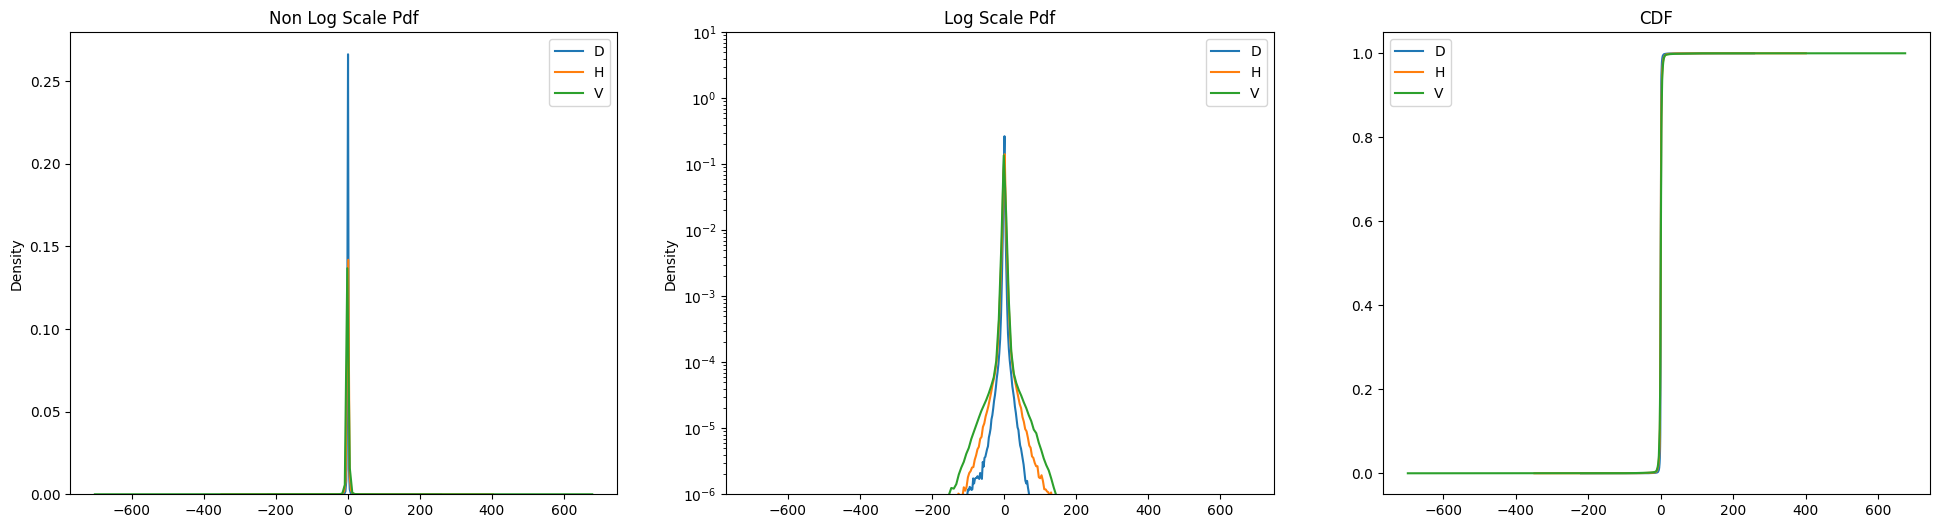

In [20]:
for i in range(2, 10):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


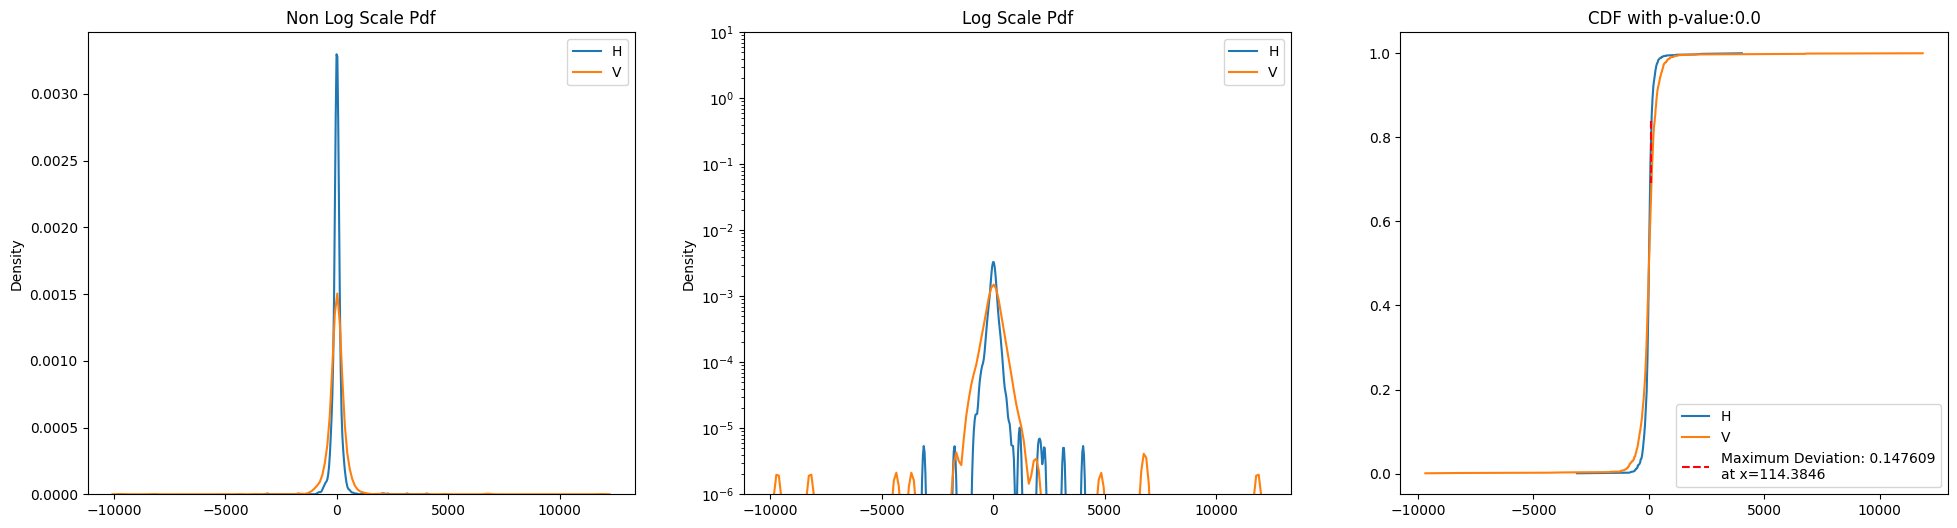

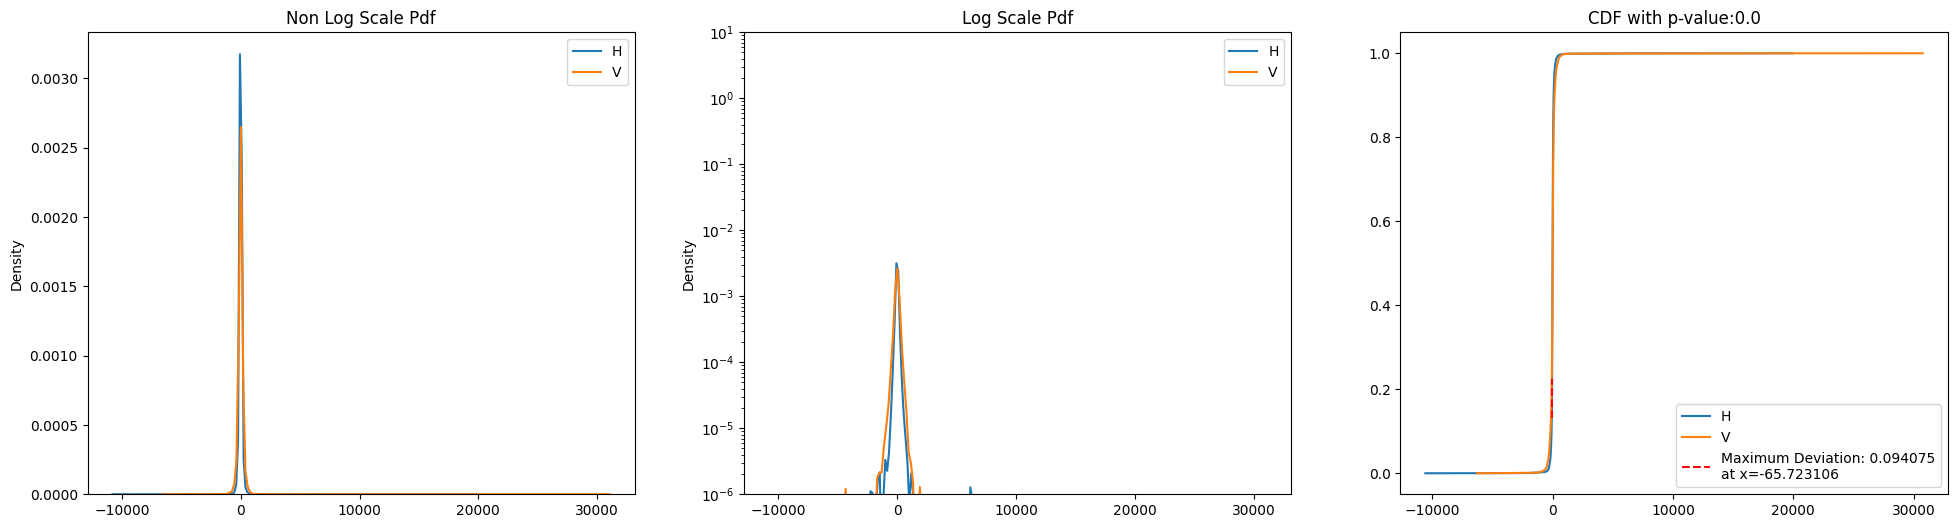

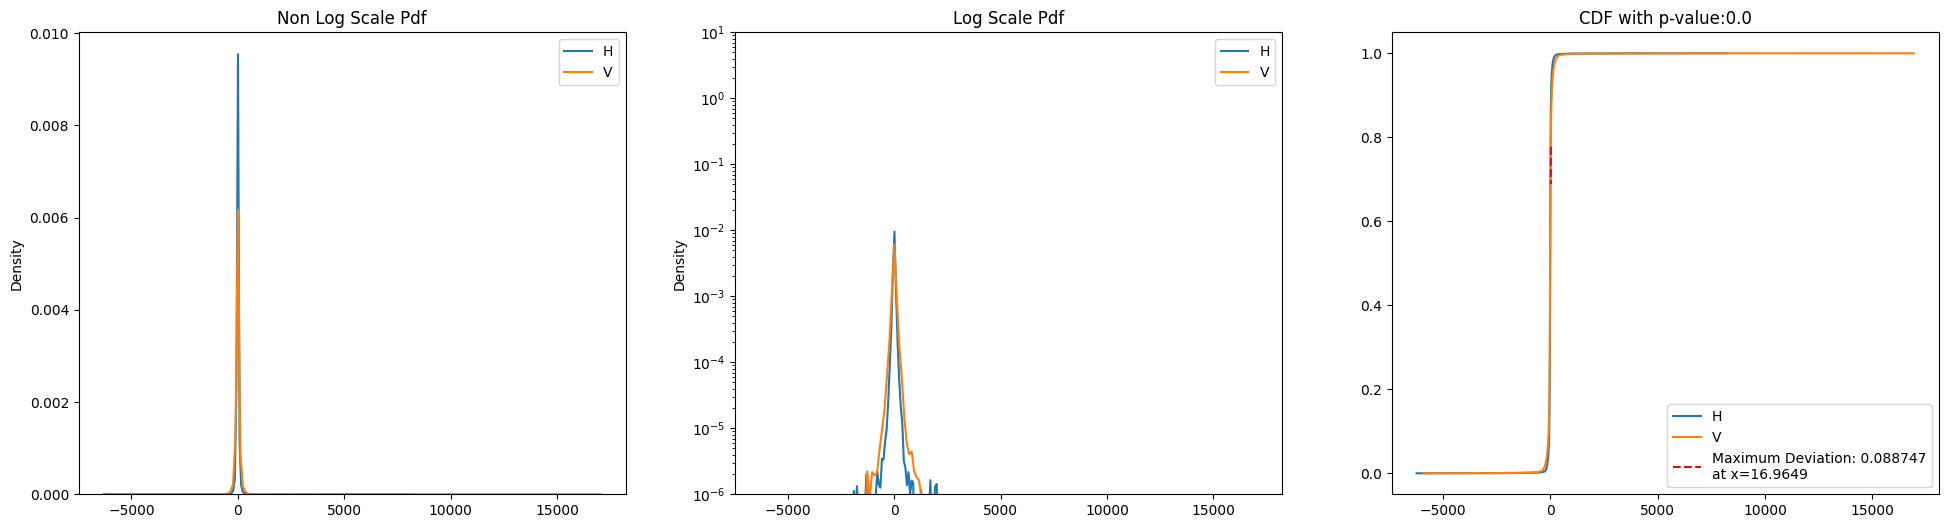

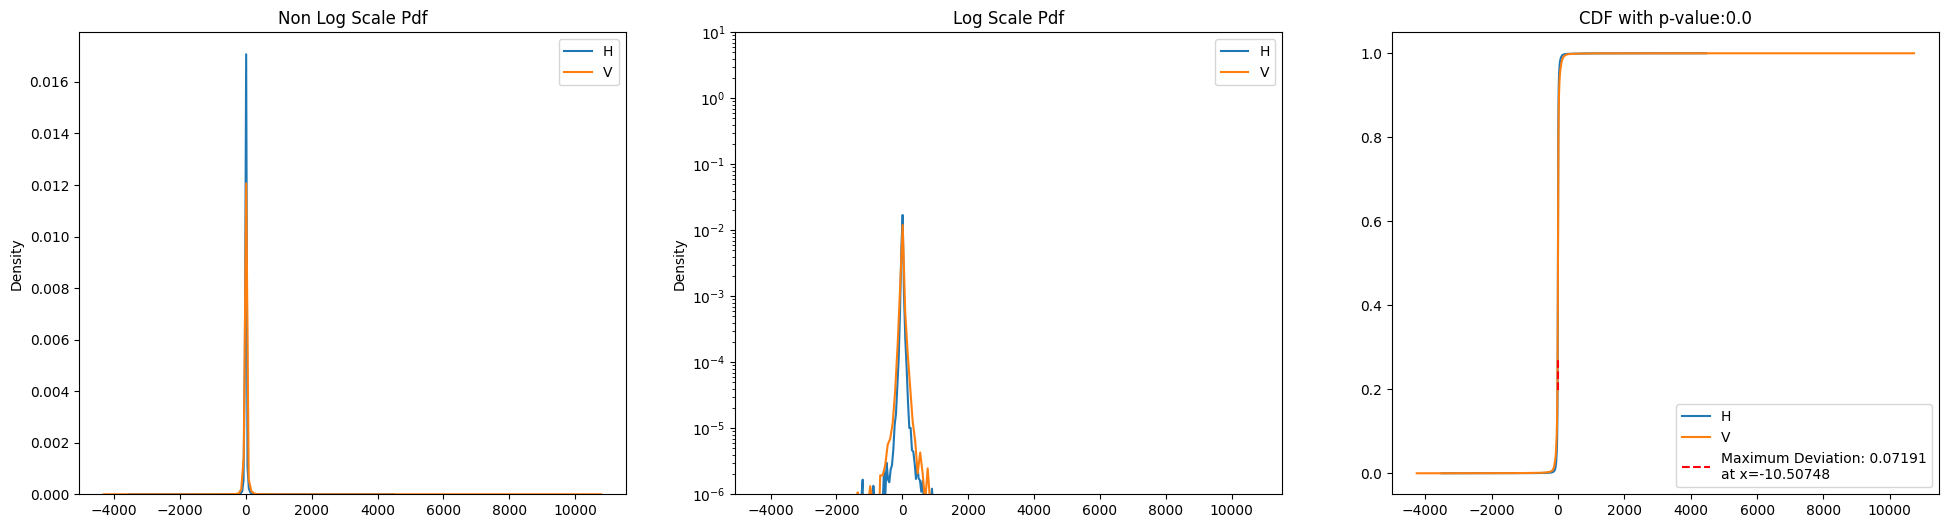

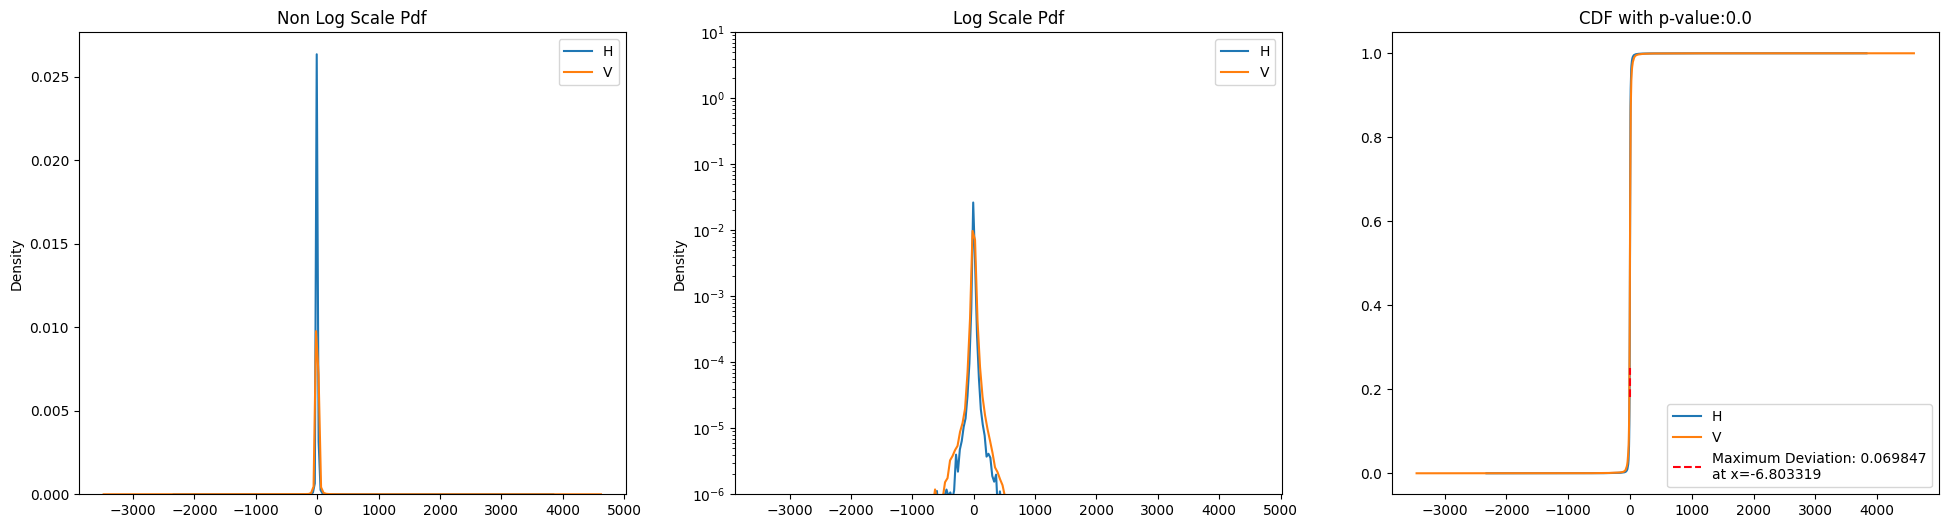

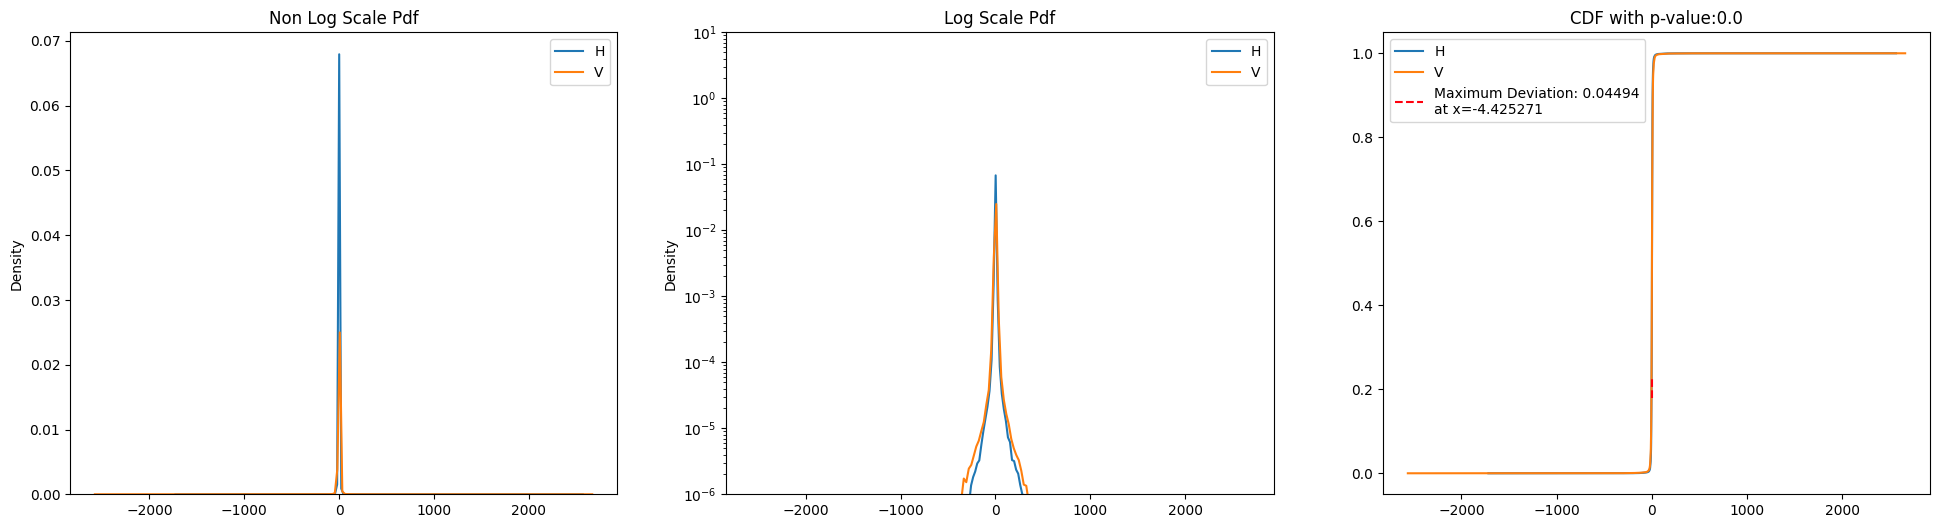

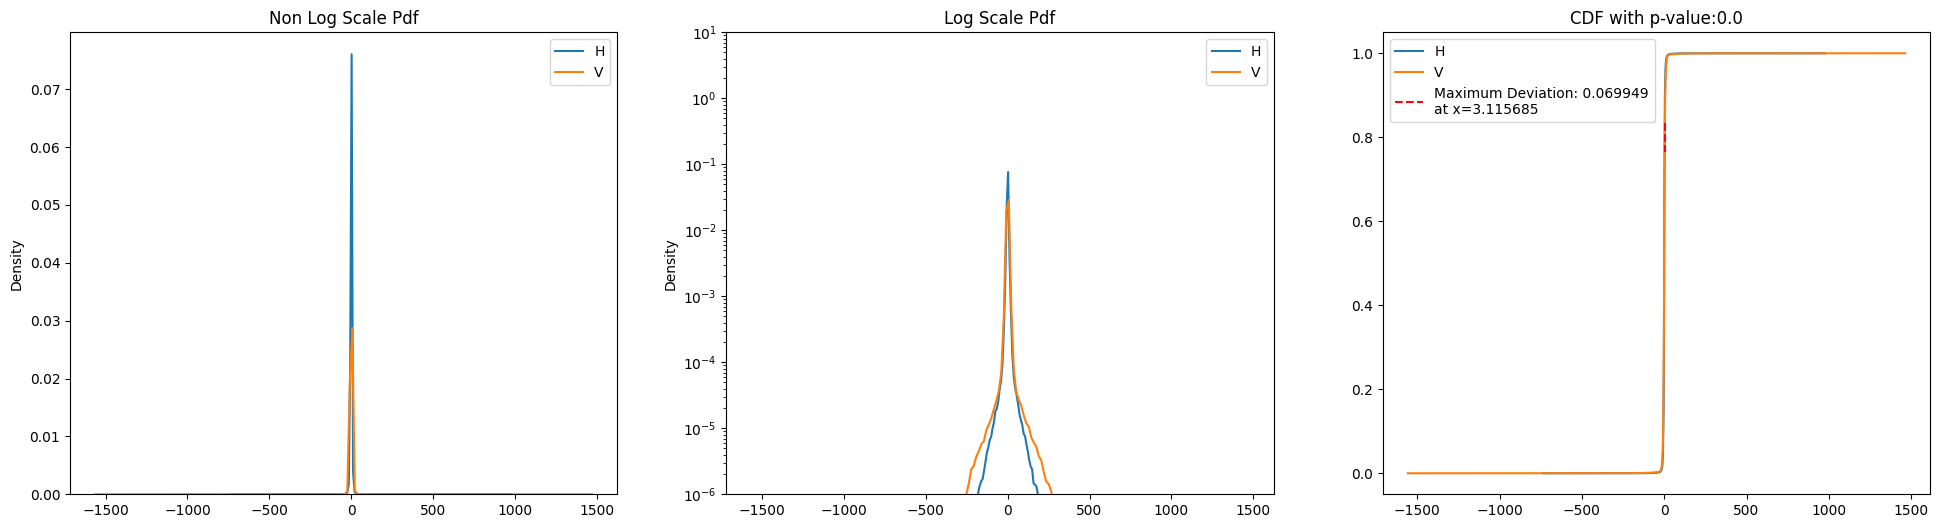

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


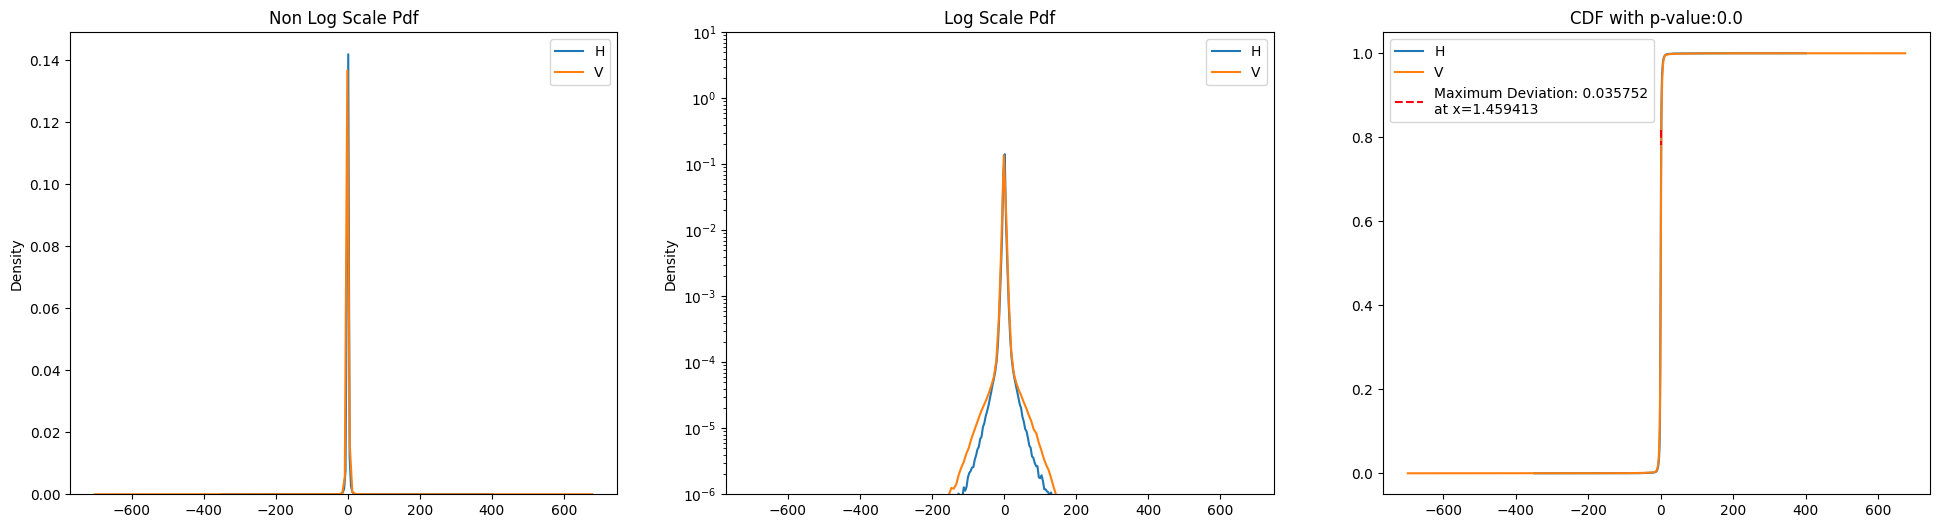

In [21]:
for i in range(2, 10):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Infrared

In [29]:
infra_dir = os.path.join(ROOT_DIR, 'raw-data','agriVision','toy-agriVision-nearIR')
infra_wv = convert_to_wavelet_basis(infra_dir, "infrared", debug=True)
infra_wv.head()

10 layers being used


100%|██████████| 1008/1008 [00:14<00:00, 68.50it/s]


channel  layer orientation  \
0  infrared      1          L1   
1  infrared      2           D   
2  infrared      2           H   
3  infrared      2           V   
4  infrared      3           D   

                                                data  
0  [70997.85742187509, 56861.478515625065, 38914....  
1  [2317.5527343750073, 1036.4824218750014, 548.6...  
2  [1858.0410156250055, -5644.7480468750055, 311....  
3  [-5170.419921875, 608.771484375, 471.906250000...  
4  [215.57812500000227, -157.26562499999906, 1151...

In [30]:
infra_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, 11):
    layer_df = infra_wv[infra_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    infra_df = pd.concat([infra_df, ks_df], axis = 0)
infra_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_8098/1142268191.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  infra_df = pd.concat([infra_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
2     2     H      V  0.065476   2.653663e-02
1     2     D      V  0.120040   9.569786e-07
0     2     D      H  0.155754   4.395771e-11
2     3     H      V  0.044147   7.719684e-04
1     3     D      V  0.126240   2.107692e-28
0     3     D      H  0.151290   1.180698e-40
2     4     H      V  0.037698   2.152452e-10
1     4     D      V  0.122768  2.204636e-106
0     4     D      H  0.158172  1.085746e-176
2     5     H      V  0.032304   1.115986e-29
1     5     D      V  0.098741  3.279447e-274
0     5     D      H  0.129480   0.000000e+00
2     6     H      V  0.026553   1.838475e-79
1     6     D      V  0.072188   0.000000e+00
0     6     D      H  0.096327   0.000000e+00
2     7     H      V  0.025920  1.218754e-301
1     7     D      V  0.056797   0.000000e+00
0     7     D      H  0.081728   0.000000e+00
2     8     H      V  0.015966   0.000000e+00
1     8     D      V  0.062209   0.000000e+00
0     8     D      H  0.075945   0.000000e+00
2     9     H      V  0.022051   0.000000e+00
1     9     D      V  0.101930   0.000000e+00
0     9     D      H  0.121994   0.000000e+00
2    10     H      V  0.035152   0.000000e+00
1    10     D      V  0.184987   0.000000e+00
0    10     D      H  0.200169   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


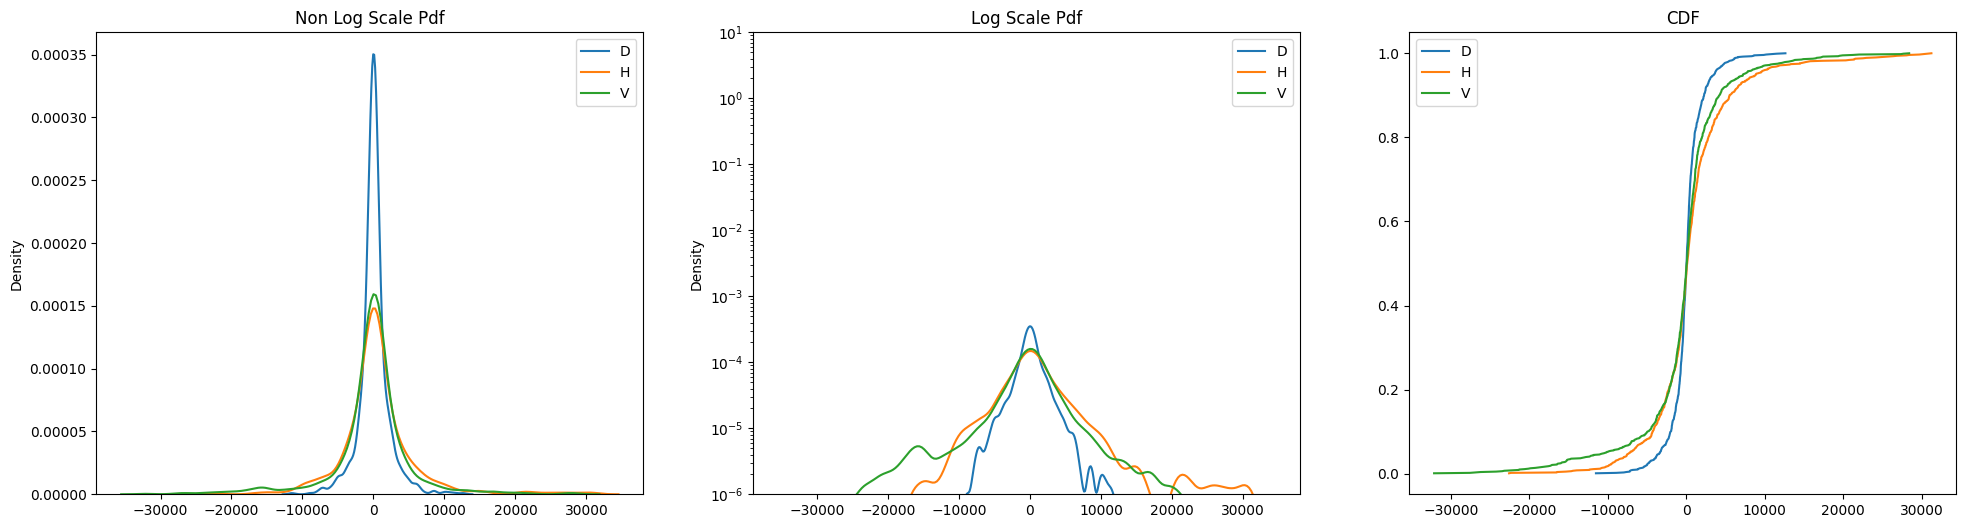

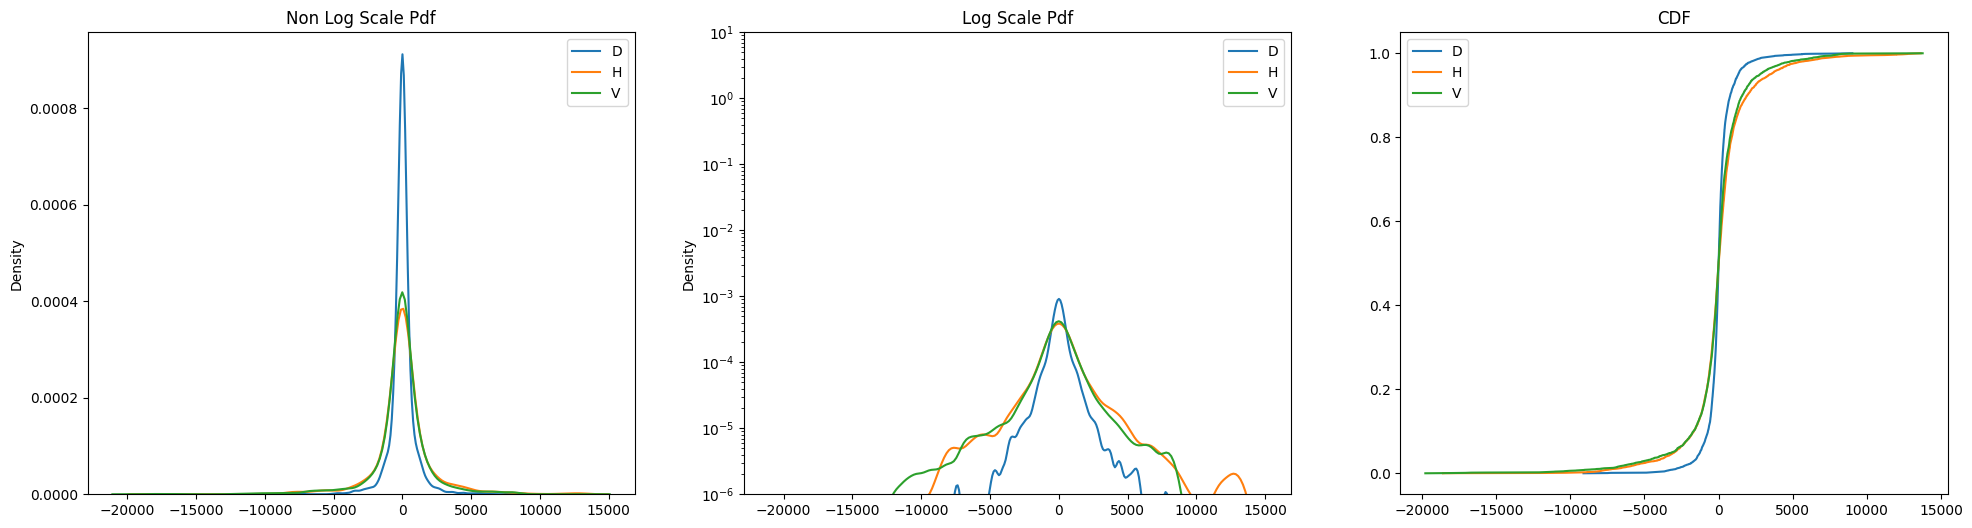

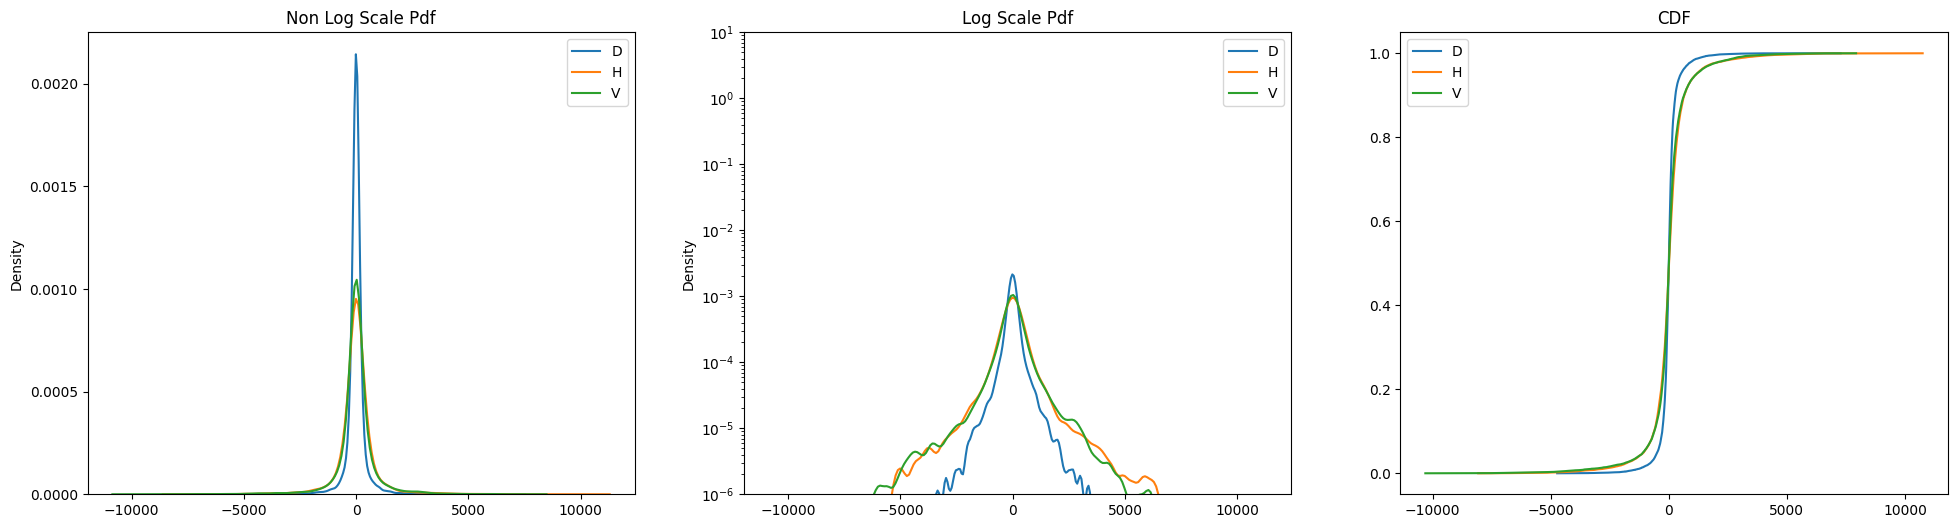

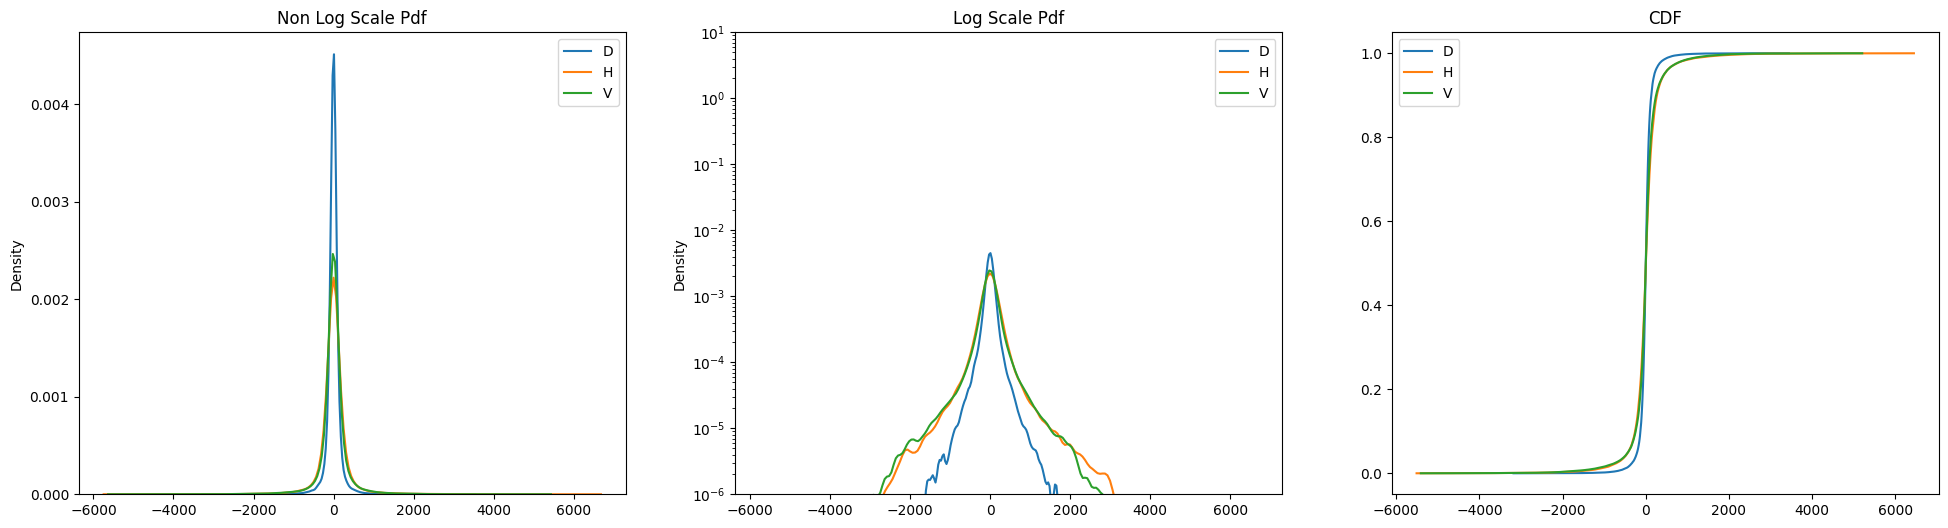

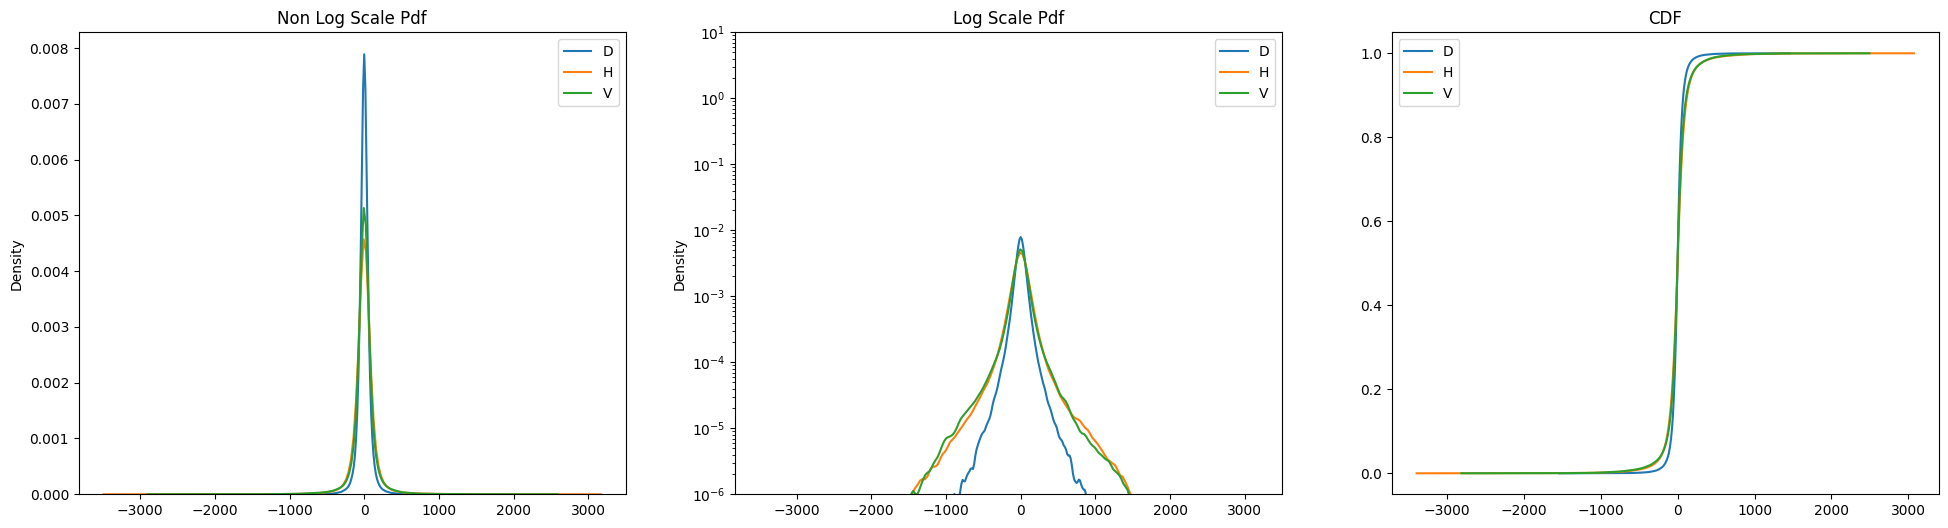

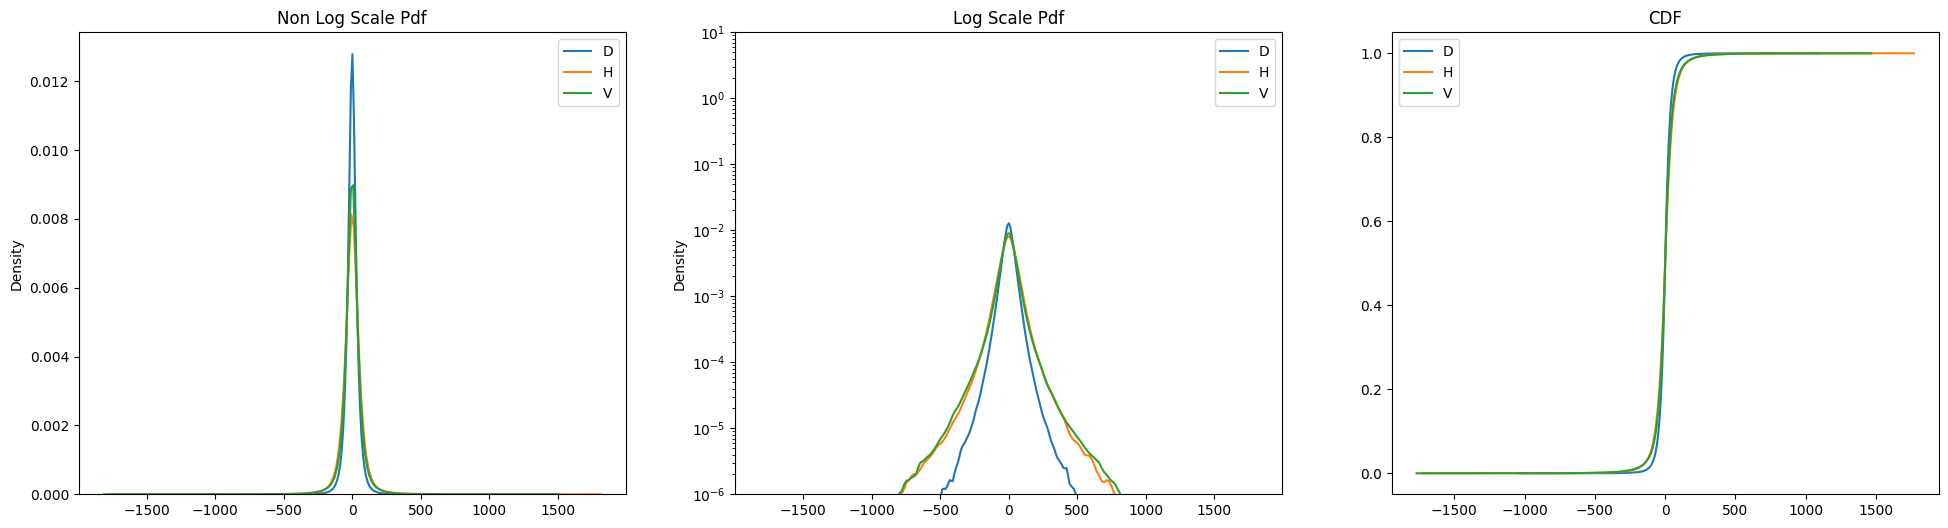

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


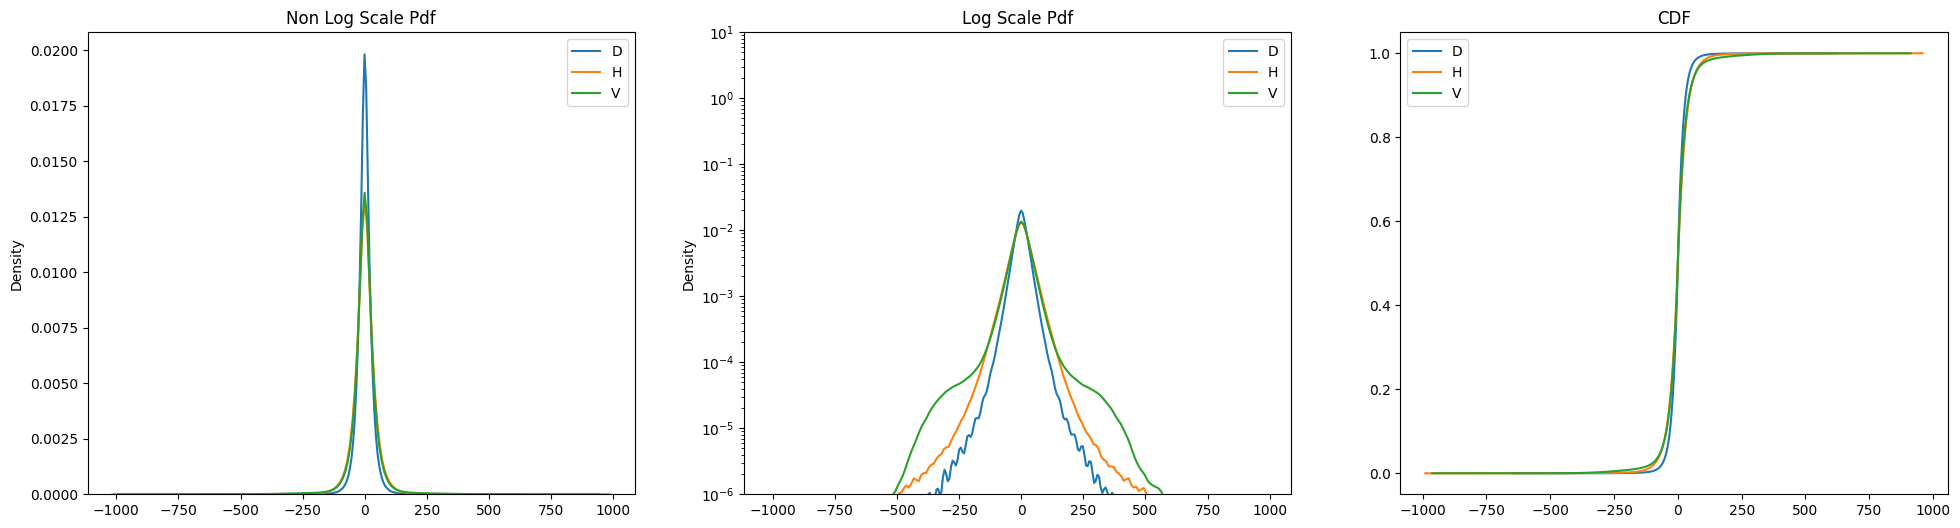

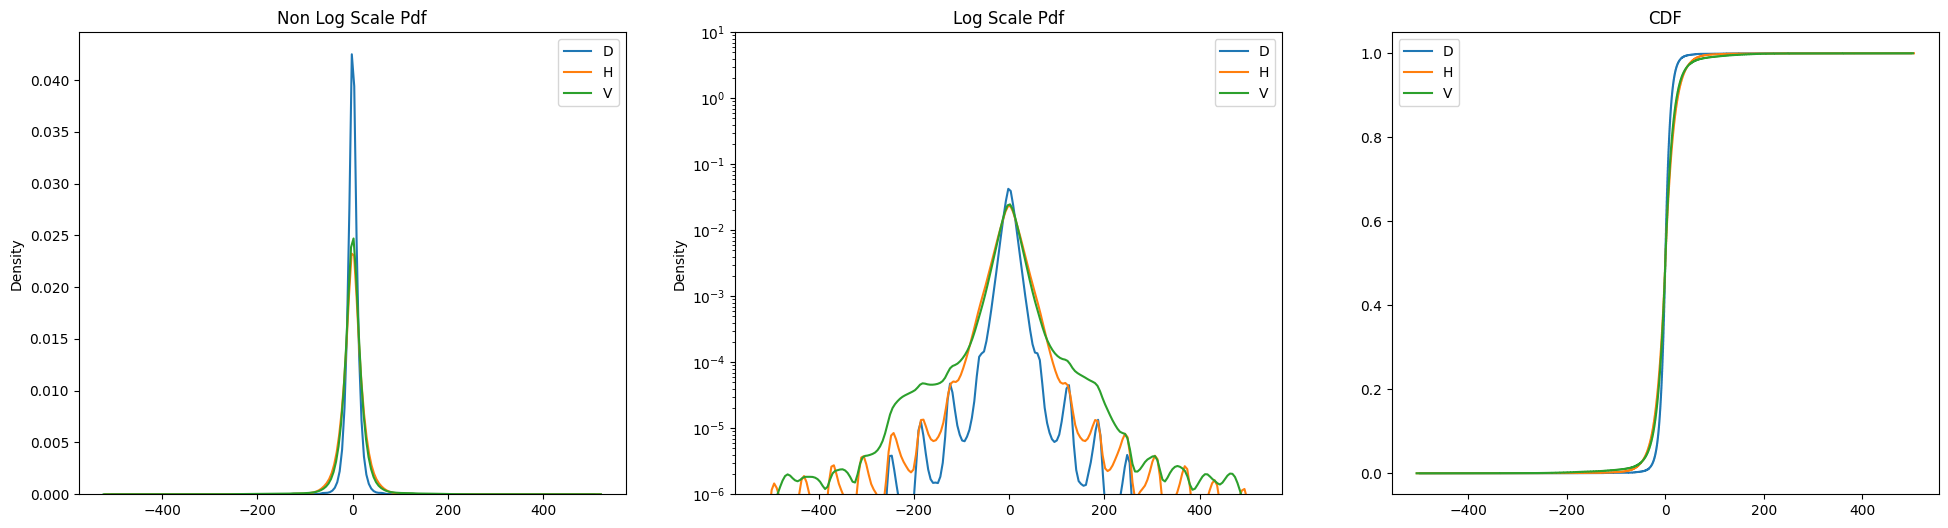

In [31]:
for i in range(2, 10):
    layer_df = infra_wv[infra_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


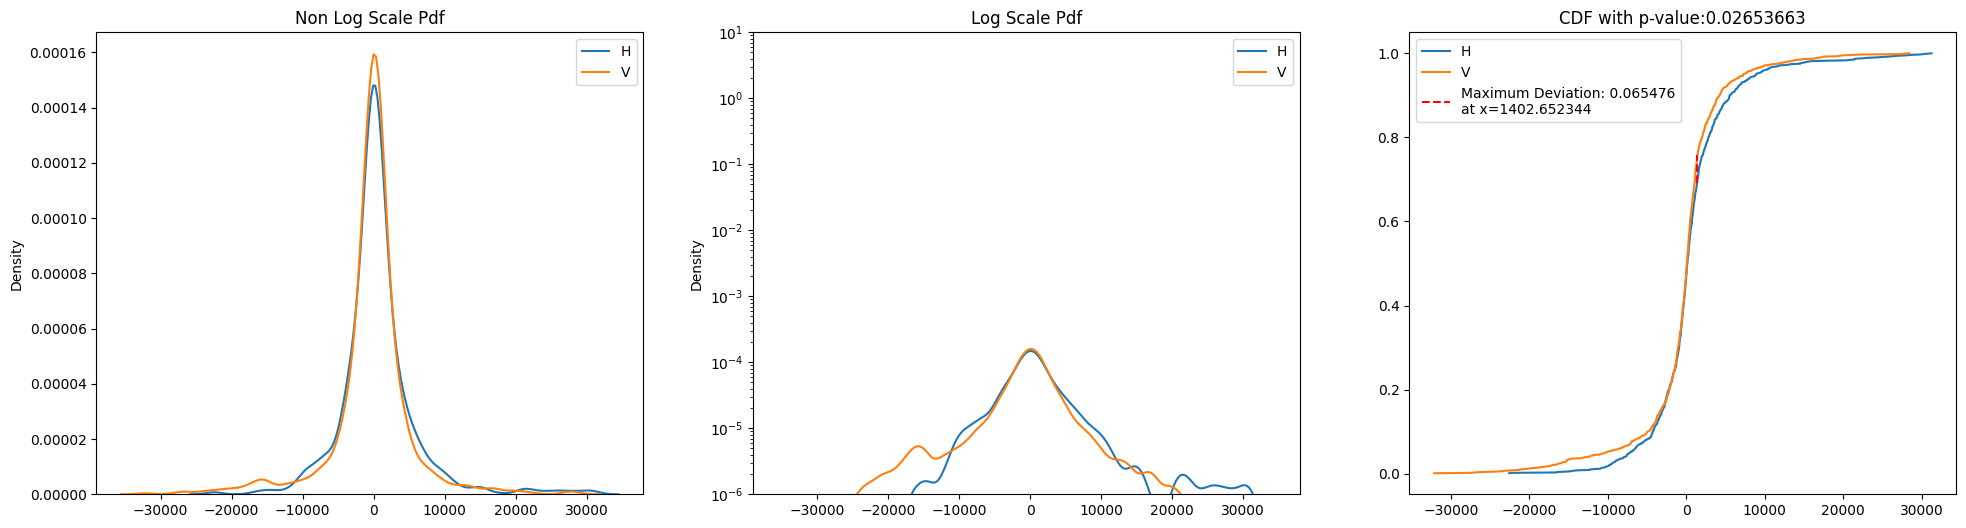

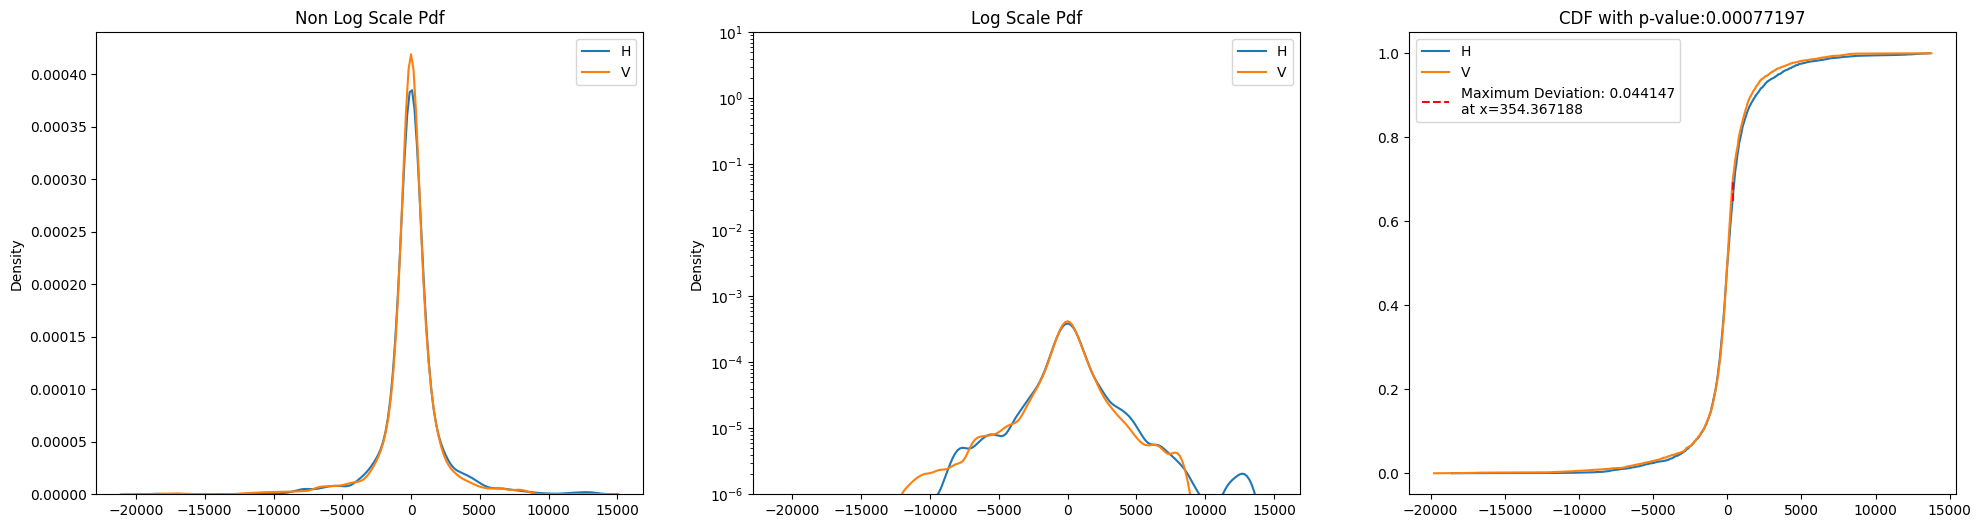

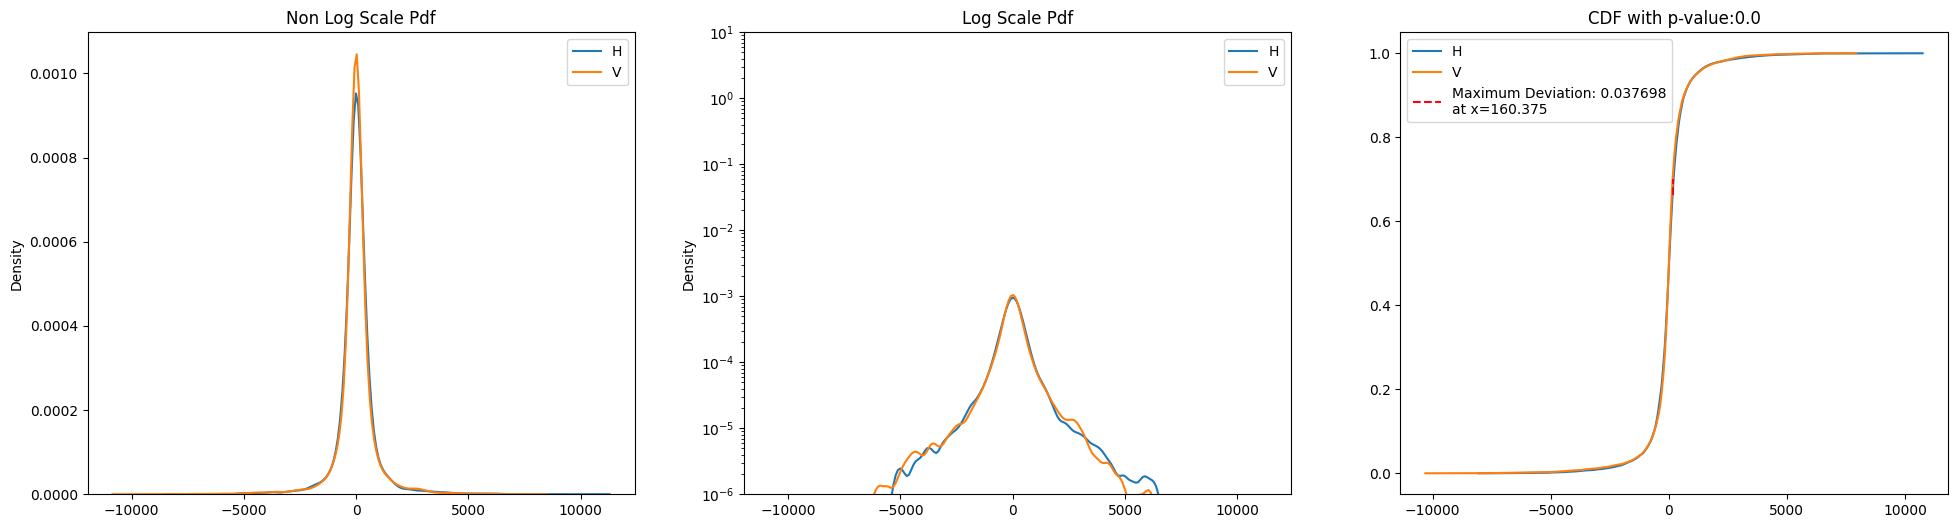

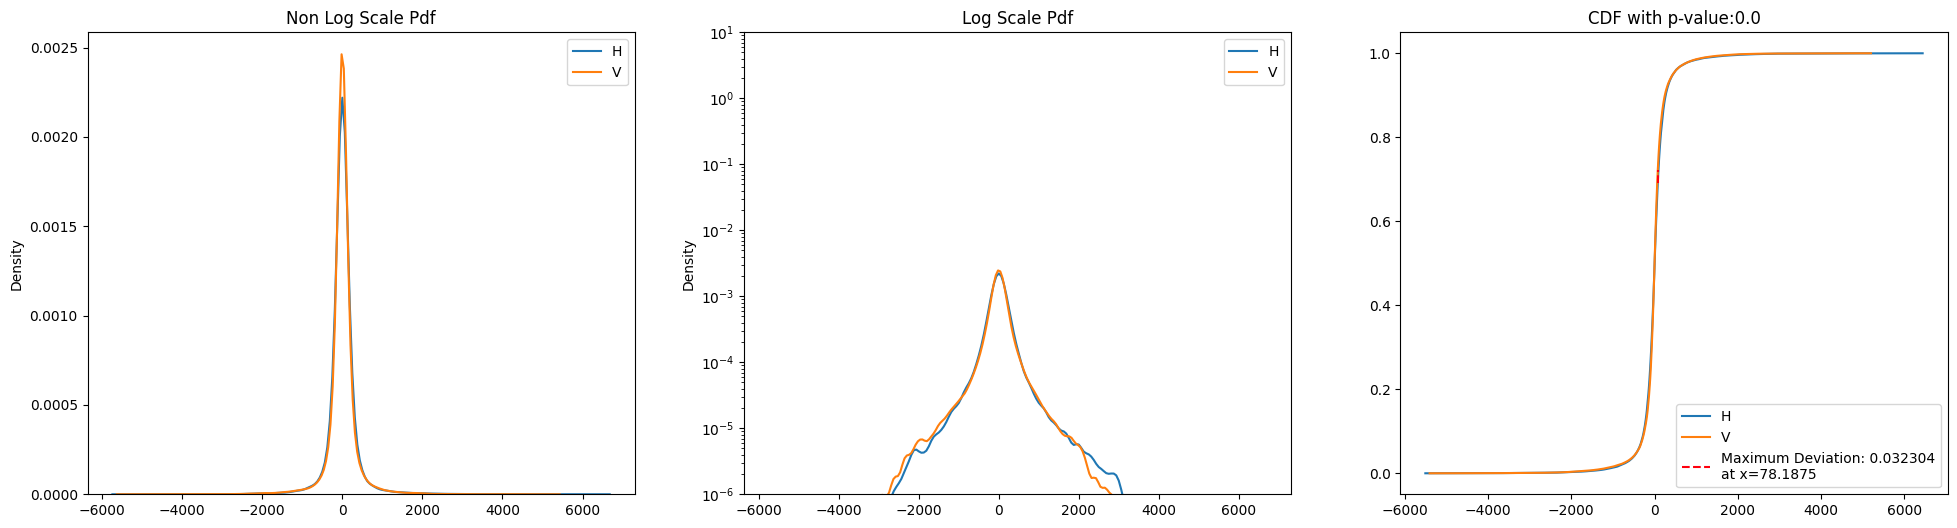

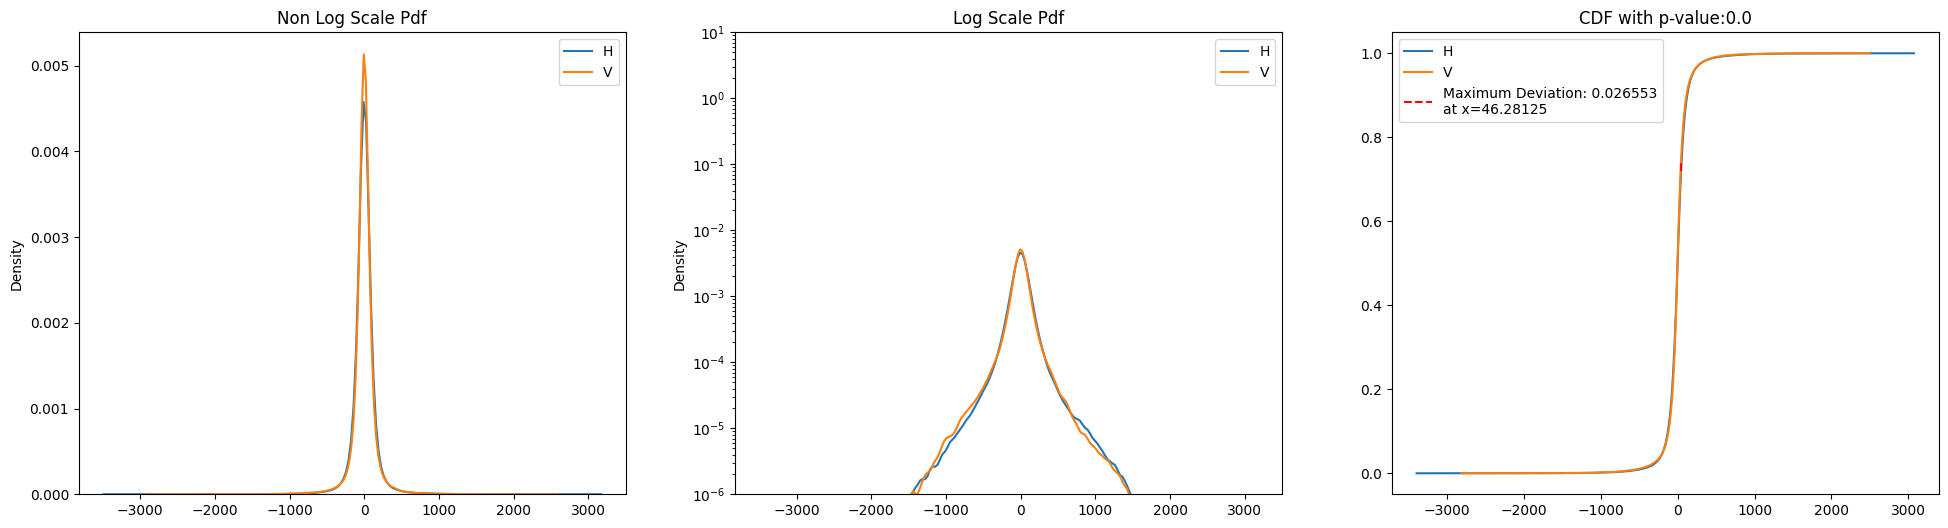

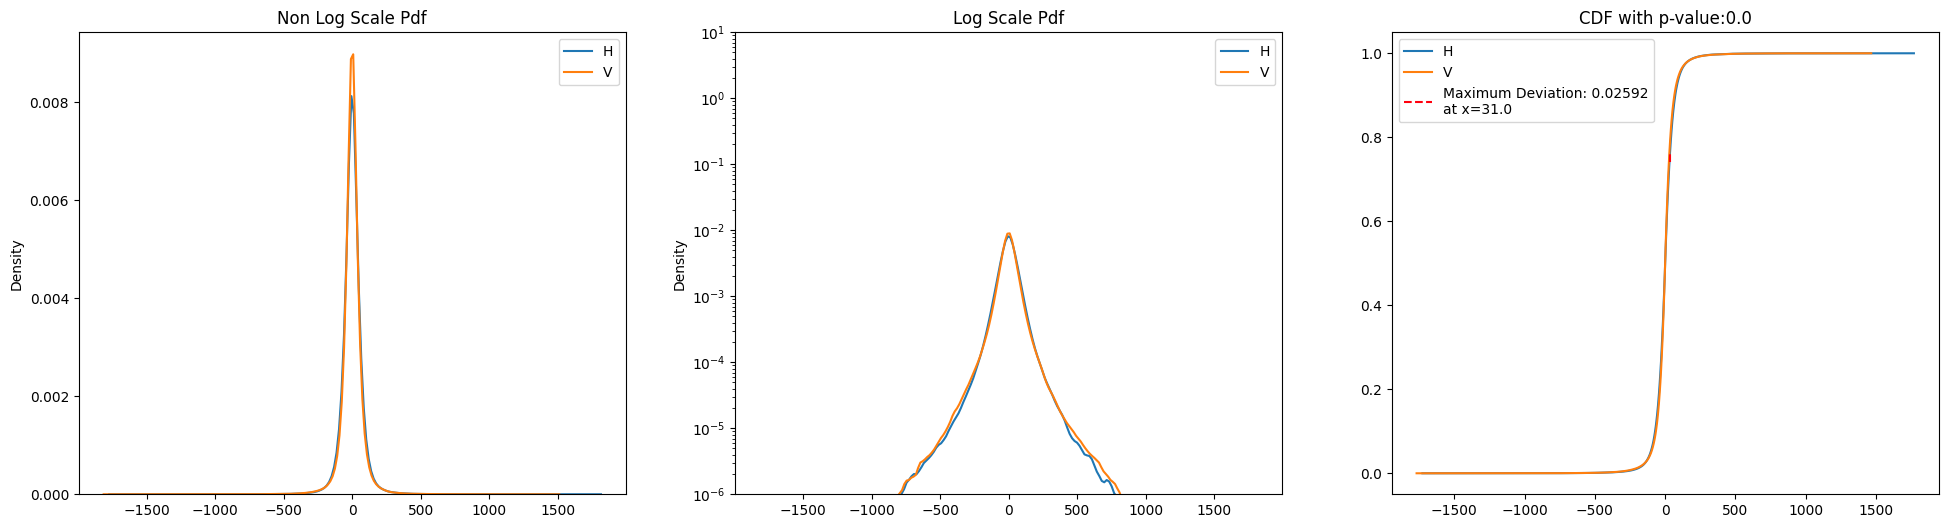

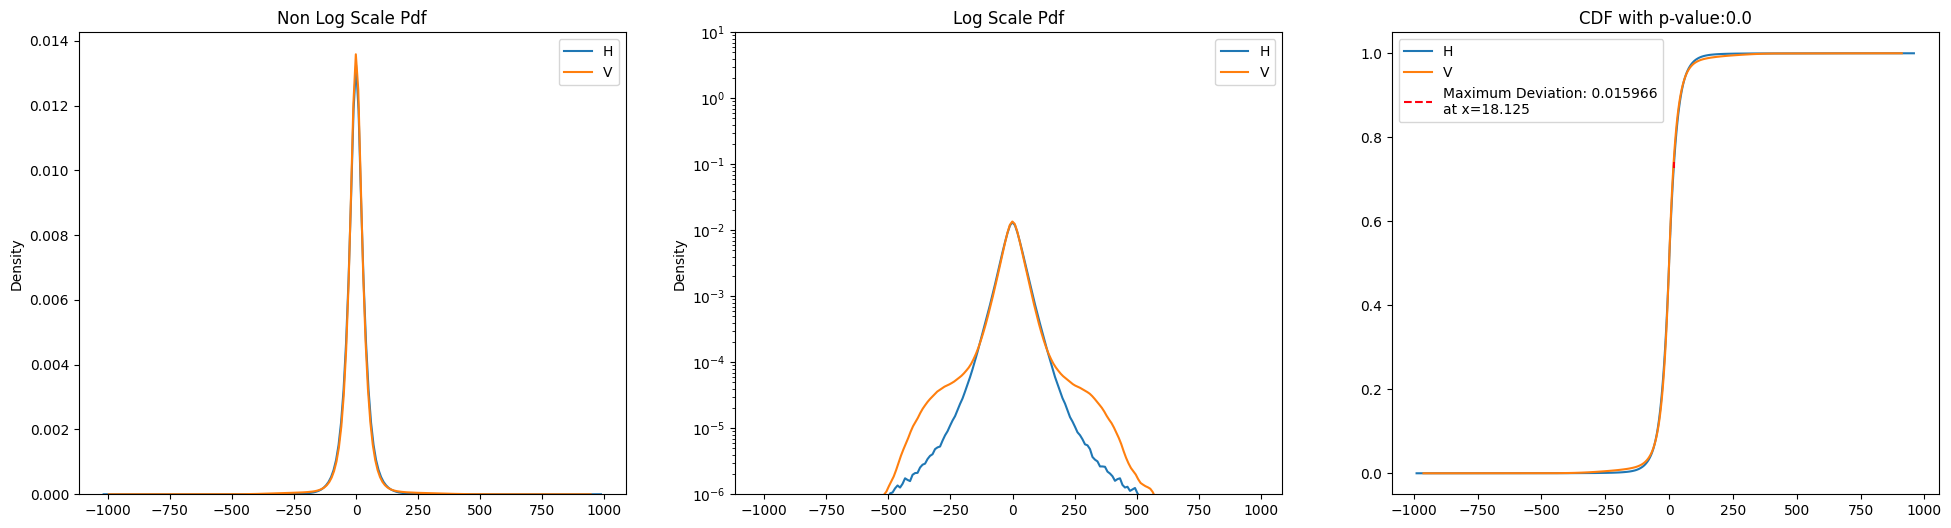

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


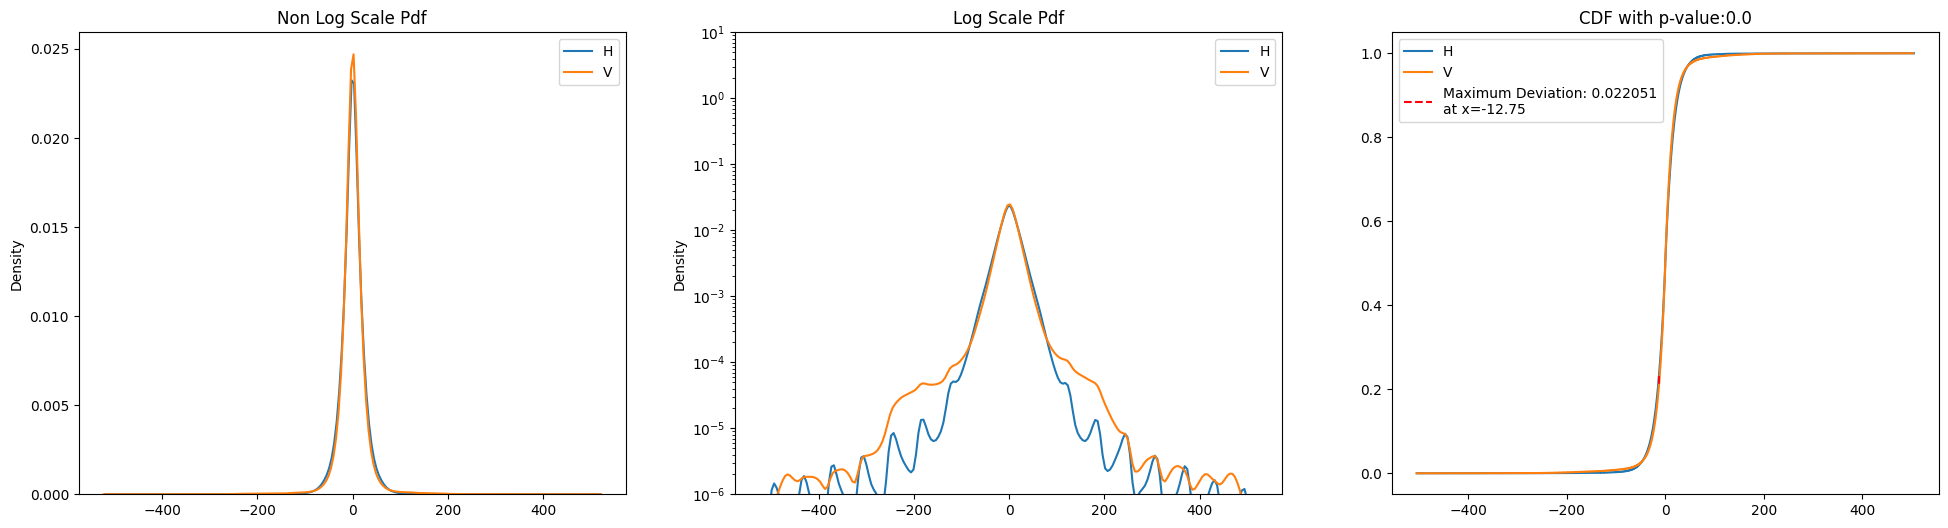

In [32]:
for i in range(2, 10):
    layer_df = infra_wv[infra_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")